## Avance 1

In [1]:
import pandas as pd
import numpy as np

In [ ]:
# importacion de dataset
path = "C:\Data analytics\HENRY\MD4\Proyecto Integrador/data_latinoamerica.csv" # Ruta
dataset = pd.read_csv(path, sep=',')

In [3]:
dataset.head()

location_key        date country_code country_name  new_confirmed  \
0           AR  2020-01-01           AR    Argentina            3.0   
1           AR  2020-01-02           AR    Argentina           14.0   
2           AR  2020-01-03           AR    Argentina            3.0   
3           AR  2020-01-04           AR    Argentina            7.0   
4           AR  2020-01-05           AR    Argentina            5.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0           0.0                   3.0                  0.0   
1           0.0                  17.0                  0.0   
2           0.0                  20.0                  0.0   
3           0.0                  27.0                  0.0   
4           0.0                  32.0                  0.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                    NaN  44938712.0  ...   
1                                    NaN  44938712.0  ...   
2                                    NaN  44938712.0  ...   
3                                    NaN  44938712.0  ...   
4                                    NaN  44938712.0  ...   

   population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0               15057273.0         2690269.0           55032.0   
1               15057273.0         2690269.0           55032.0   
2               15057273.0         2690269.0           55032.0   
3               15057273.0         2690269.0           55032.0   
4               15057273.0         2690269.0           55032.0   

   life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0            76.52                    147.086                       79.483   
1            76.52                    147.086                       79.483   
2            76.52                    147.086                       79.483   
3            76.52                    147.086                       79.483   
4            76.52                    147.086                       79.483   

   pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
0                      26.6                        15.8            NaN   
1                      26.6                        15.8            NaN   
2                      26.6                        15.8            NaN   
3                      26.6                        15.8            NaN   
4                      26.6                        15.8            NaN   

   cumulative_recovered  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  

[5 rows x 50 columns]

In [4]:
dataset.shape

(12216057, 50)

In [4]:
paisesSeleccionados = ["Argentina", "Chile", "Colombia", "Mexico", "Peru", "Brazil"]
dataLatinoamerica = dataset[dataset["country_name"].isin(paisesSeleccionados)] # Mascara para analizar los paises en los cuales se enfoca el analisis

In [5]:
dataLatinoamerica.shape

(11970289, 50)

In [6]:
# Verifico la cantidad de datos faltantes por columna, si son mayores a 4 millines no me sirve
dataLatinoamerica.isnull().sum()[dataLatinoamerica.isnull().sum() > 4000000]

new_confirmed                             5620283
new_deceased                              5661788
cumulative_confirmed                      5619937
cumulative_deceased                       5661426
cumulative_vaccine_doses_administered    11706131
population_rural                         11964343
population_urban                         11964343
population_density                       11964343
human_development_index                   6472221
gdp_usd                                  11963352
gdp_per_capita_usd                       11962361
smoking_prevalence                       11964343
diabetes_prevalence                      11964343
infant_mortality_rate                    11964343
nurses_per_1000                          11964343
physicians_per_1000                      11964343
population_largest_city                  11964343
area_rural_sq_km                         11964343
area_urban_sq_km                         11964343
life_expectancy                          11964343


In [7]:
# como sigo teniendo datos faltantes le aplico otra mascaraa la columna location key que no tiene faltantes
dataPaisesLatinoamerica = dataLatinoamerica[dataLatinoamerica["location_key"].isin(["AR", "CL", "CO", "MX", "PE", "BR"])]

In [8]:
dataPaisesLatinoamerica.shape

(5946, 50)

In [ ]:
# filtre los datos por el año 2021 ya que es la fecha en la que se comenzaron a registra mejor los datos
dataPaisesLatinoamericaFecha = dataPaisesLatinoamerica[dataPaisesLatinoamerica["date"] > "2021-01-01"]

In [10]:
dataPaisesLatinoamericaFecha.shape

(3744, 50)

In [11]:
dataPaisesLatinoamericaFecha.info() # sigue teniendo nulos

<class 'pandas.core.frame.DataFrame'>
Index: 3744 entries, 367 to 10253876
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   location_key                           3744 non-null   object 
 1   date                                   3744 non-null   object 
 2   country_code                           3744 non-null   object 
 3   country_name                           3744 non-null   object 
 4   new_confirmed                          3723 non-null   float64
 5   new_deceased                           3723 non-null   float64
 6   cumulative_confirmed                   3723 non-null   float64
 7   cumulative_deceased                    3723 non-null   float64
 8   cumulative_vaccine_doses_administered  3160 non-null   float64
 9   population                             3744 non-null   float64
 10  population_male                        3744 non-null   float64
 11  pop

In [ ]:
# Busco las columnas con nulos y cuantos son
valoresNulosFecha = dataPaisesLatinoamericaFecha.isnull().sum()[dataPaisesLatinoamericaFecha.isnull().sum() > 0]
valoresNulosFecha

new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     584
average_temperature_celsius                42
minimum_temperature_celsius                41
maximum_temperature_celsius                41
rainfall_mm                                90
relative_humidity                          42
new_recovered                            2116
cumulative_recovered                     2736
dtype: int64

In [ ]:
# con este for donde hay un valor nulo o vacio completo con el promedio de cada pais y los acumulativos los complete con cero ya que son acumulados(el cero no me afecta el total y no tengo nulos)
for pais in paisesSeleccionados:
    dataPaisesLatinoamericaFecha["new_confirmed"] = dataPaisesLatinoamericaFecha["new_confirmed"].fillna(dataPaisesLatinoamericaFecha[dataPaisesLatinoamericaFecha["country_name"] == pais]["new_confirmed"].mean())
    dataPaisesLatinoamericaFecha["new_deceased"] = dataPaisesLatinoamericaFecha["new_deceased"].fillna(dataPaisesLatinoamericaFecha[dataPaisesLatinoamericaFecha["country_name"] == pais]["new_deceased"].mean())
    dataPaisesLatinoamericaFecha["cumulative_confirmed"] = dataPaisesLatinoamericaFecha["cumulative_confirmed"].fillna(dataPaisesLatinoamericaFecha[dataPaisesLatinoamericaFecha["country_name"] == pais]["cumulative_confirmed"].mean())
    dataPaisesLatinoamericaFecha["cumulative_deceased"] = dataPaisesLatinoamericaFecha["cumulative_deceased"].fillna(dataPaisesLatinoamericaFecha[dataPaisesLatinoamericaFecha["country_name"] == pais]["cumulative_deceased"].mean())
    dataPaisesLatinoamericaFecha["rainfall_mm"] = dataPaisesLatinoamericaFecha["rainfall_mm"].fillna(dataPaisesLatinoamericaFecha[dataPaisesLatinoamericaFecha["country_name"] == pais]["rainfall_mm"].mean())
    dataPaisesLatinoamericaFecha["relative_humidity"] = dataPaisesLatinoamericaFecha["relative_humidity"].fillna(dataPaisesLatinoamericaFecha[dataPaisesLatinoamericaFecha["country_name"] == pais]["relative_humidity"].mean())
    dataPaisesLatinoamericaFecha["average_temperature_celsius"] = dataPaisesLatinoamericaFecha["average_temperature_celsius"].fillna(dataPaisesLatinoamericaFecha[dataPaisesLatinoamericaFecha["country_name"] == pais]["average_temperature_celsius"].mean())
    dataPaisesLatinoamericaFecha["minimum_temperature_celsius"] = dataPaisesLatinoamericaFecha["minimum_temperature_celsius"].fillna(dataPaisesLatinoamericaFecha[dataPaisesLatinoamericaFecha["country_name"] == pais]["minimum_temperature_celsius"].mean())
    dataPaisesLatinoamericaFecha["maximum_temperature_celsius"] = dataPaisesLatinoamericaFecha["maximum_temperature_celsius"].fillna(dataPaisesLatinoamericaFecha[dataPaisesLatinoamericaFecha["country_name"] == pais]["maximum_temperature_celsius"].mean())

dataPaisesLatinoamericaFecha["new_recovered"] = dataPaisesLatinoamericaFecha["new_recovered"].fillna(0) #acumulativo
dataPaisesLatinoamericaFecha["cumulative_recovered"] = dataPaisesLatinoamericaFecha["cumulative_recovered"].fillna(0) # acumulativo 
dataPaisesLatinoamericaFecha["cumulative_vaccine_doses_administered"] = dataPaisesLatinoamericaFecha["cumulative_vaccine_doses_administered"].fillna(0) # acumulativo

In [ ]:
#vuelvo a verificar que no tenga valores nulos
dataPaisesLatinoamericaFecha.isnull().sum()

location_key                             0
date                                     0
country_code                             0
country_name                             0
new_confirmed                            0
new_deceased                             0
cumulative_confirmed                     0
cumulative_deceased                      0
cumulative_vaccine_doses_administered    0
population                               0
population_male                          0
population_female                        0
population_rural                         0
population_urban                         0
population_density                       0
human_development_index                  0
population_age_00_09                     0
population_age_10_19                     0
population_age_20_29                     0
population_age_30_39                     0
population_age_40_49                     0
population_age_50_59                     0
population_age_60_69                     0
population_

In [ ]:
# imprimi el data set para confirmar como quedo
print(dataPaisesLatinoamericaFecha.isnull().sum()[dataPaisesLatinoamericaFecha.isnull().sum() > 0])
dataPaisesLatinoamericaFecha.shape

Series([], dtype: int64)


(3744, 50)

In [ ]:
# Guarde el dataset limpio y reducido
dataPaisesLatinoamericaFecha.to_csv("DatosFinalesFiltrados.csv", index = False)

## Avance 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [ ]:
# comence leyendo el dataset
dataPaisesLatinoamerica = pd.read_csv("DatosFinalesFiltrados.csv", sep = ",")
dataPaisesLatinoamerica.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3744 entries, 0 to 3743
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   location_key                           3744 non-null   object 
 1   date                                   3744 non-null   object 
 2   country_code                           3744 non-null   object 
 3   country_name                           3744 non-null   object 
 4   new_confirmed                          3744 non-null   float64
 5   new_deceased                           3744 non-null   float64
 6   cumulative_confirmed                   3744 non-null   float64
 7   cumulative_deceased                    3744 non-null   float64
 8   cumulative_vaccine_doses_administered  3744 non-null   float64
 9   population                             3744 non-null   float64
 10  population_male                        3744 non-null   float64
 11  popu

In [ ]:
#creo una variable con los paises que voy a analizar
paisesSeleccionados = ["Argentina", "Chile", "Colombia", "Mexico", "Peru", "Brazil"]

In [ ]:
# con Describe obtengo las estadisticas de cada columna (su contenido)
for columna in dataPaisesLatinoamerica.columns:
    print(columna)
    print(dataPaisesLatinoamerica[columna].describe())
    print("***********************************")

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
***********************************
date
count           3744
unique           624
top       2022-09-01
freq               6
Name: date, dtype: object
***********************************
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
***********************************
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
***********************************
new_confirmed
count      3744.000000
mean      13930.531008
std       24205.550042
min        -573.000000
25%        1536.750000
50%        5227.000000
75%       14812.750000
max      298408.000000
Name: new_confirmed, dtype: float64
***********************************
new_deceased
count     3744.000000
mean       276.363237
std        507.133193
min          0.000000
25%         26.000000
50%    

In [ ]:
# Puse la columna dete como indice por que la tengo que utilizar para graficar
dataPaisesLatinoamerica["date"] = pd.to_datetime(dataPaisesLatinoamerica["date"])
dataPaisesLatinoamerica.set_index("date", inplace = True)

In [6]:
dataPaisesLatinoamerica.head()

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina         7767.0   
2021-01-03           AR           AR    Argentina         4934.0   
2021-01-04           AR           AR    Argentina        13953.0   
2021-01-05           AR           AR    Argentina        14085.0   
2021-01-06           AR           AR    Argentina        14496.0   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02         166.0             1670634.0              46688.0   
2021-01-03         157.0             1675568.0              46845.0   
2021-01-04         157.0             1689521.0              47002.0   
2021-01-05         160.0             1703606.0              47162.0   
2021-01-06         131.0             1718102.0              47293.0   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                                20334.0  44938712.0   
2021-01-03                                20529.0  44938712.0   
2021-01-04                                25164.0  44938712.0   
2021-01-05                                29852.0  44938712.0   
2021-01-06                                34162.0  44938712.0   

            population_male  ...  population_largest_city  area_rural_sq_km  \
date                         ...                                              
2021-01-02       19523766.0  ...               15057273.0         2690269.0   
2021-01-03       19523766.0  ...               15057273.0         2690269.0   
2021-01-04       19523766.0  ...               15057273.0         2690269.0   
2021-01-05       19523766.0  ...               15057273.0         2690269.0   
2021-01-06       19523766.0  ...               15057273.0         2690269.0   

            area_urban_sq_km  life_expectancy  adult_male_mortality_rate  \
date                                                                       
2021-01-02           55032.0            76.52                    147.086   
2021-01-03           55032.0            76.52                    147.086   
2021-01-04           55032.0            76.52                    147.086   
2021-01-05           55032.0            76.52                    147.086   
2021-01-06           55032.0            76.52                    147.086   

            adult_female_mortality_rate  pollution_mortality_rate  \
date                                                                
2021-01-02                       79.483                      26.6   
2021-01-03                       79.483                      26.6   
2021-01-04                       79.483                      26.6   
2021-01-05                       79.483                      26.6   
2021-01-06                       79.483                      26.6   

            comorbidity_mortality_rate  new_recovered  cumulative_recovered  
date                                                                         
2021-01-02                        15.8            0.0                   0.0  
2021-01-03                        15.8            0.0                   0.0  
2021-01-04                        15.8            0.0                   0.0  
2021-01-05                        15.8            0.0                   0.0  
2021-01-06                        15.8            0.0                   0.0  

[5 rows x 49 columns]

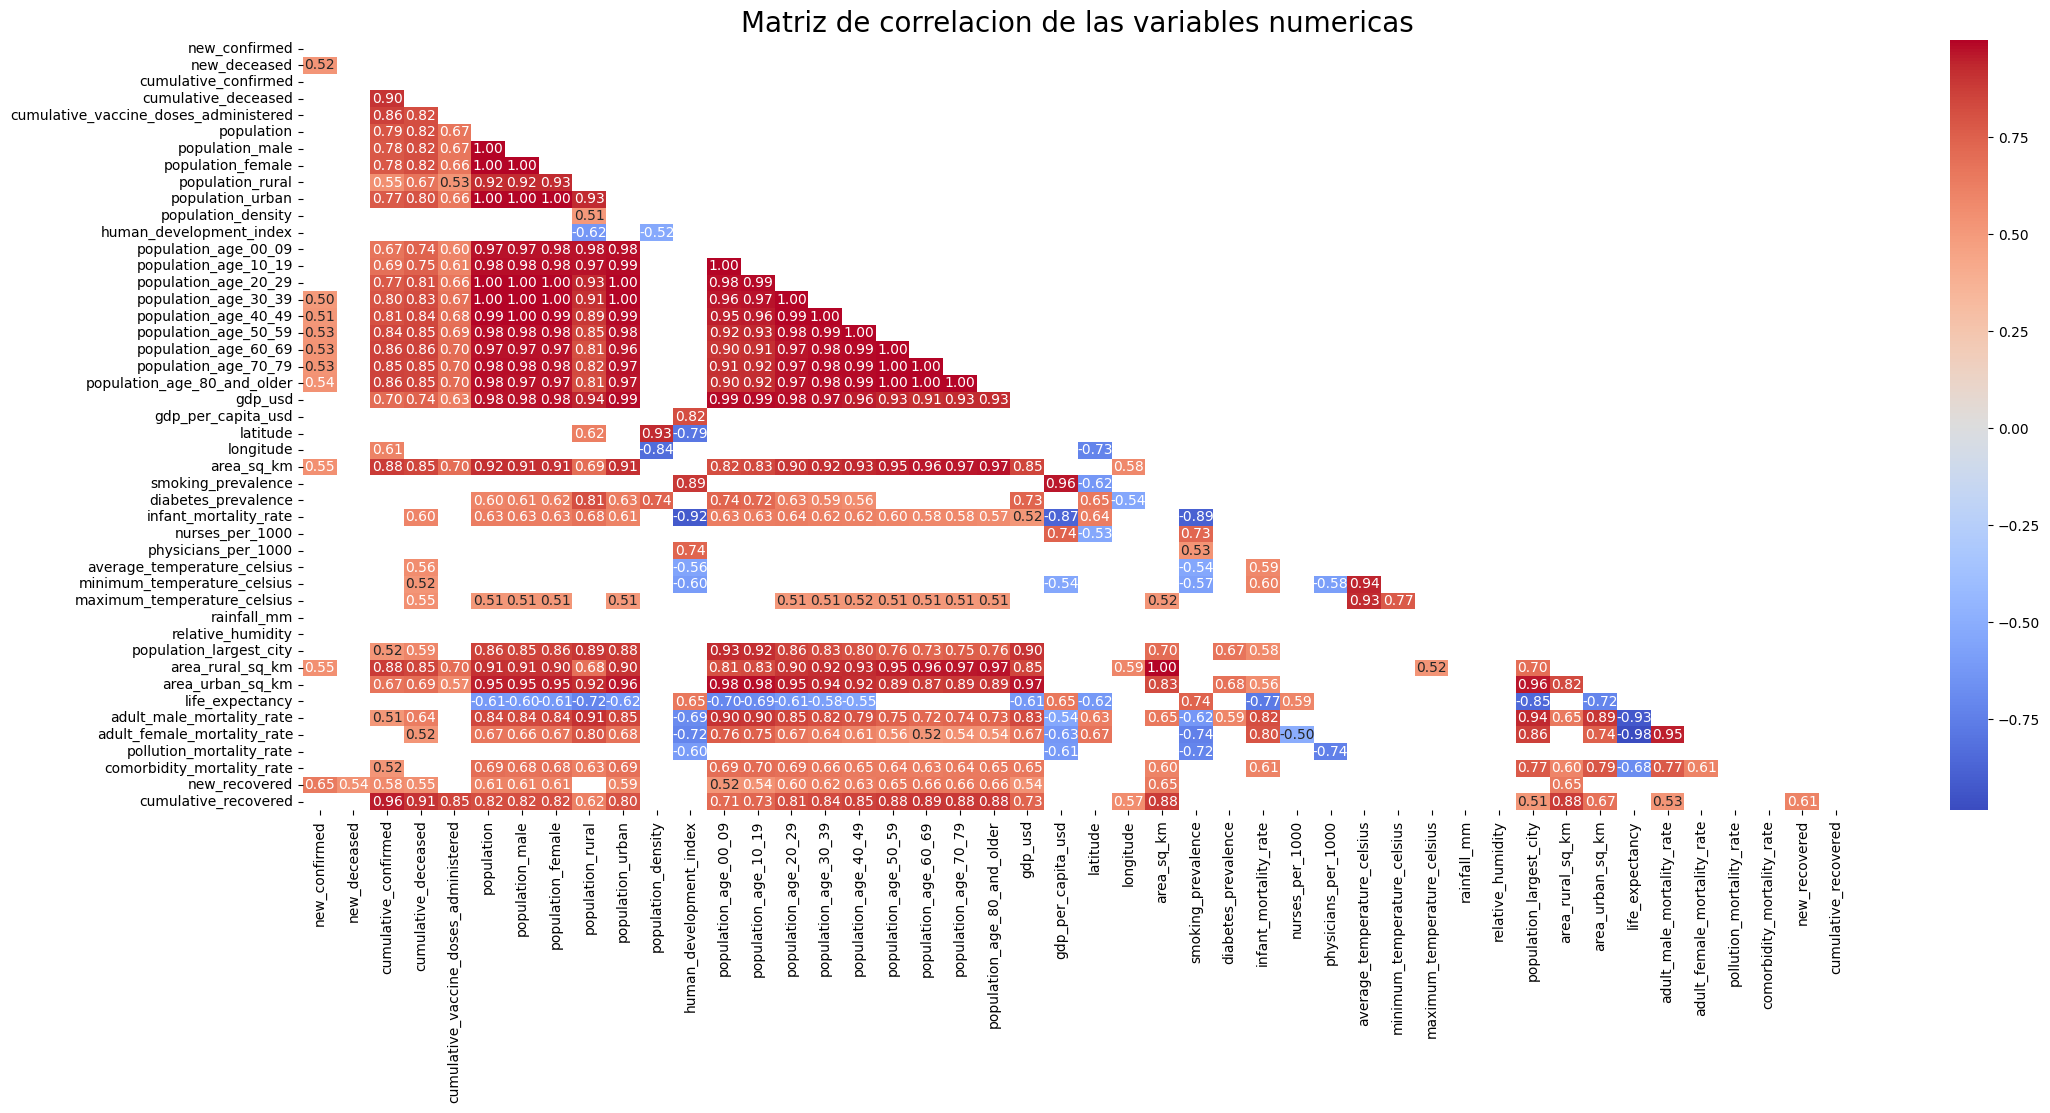

In [7]:
numerosColumnas = dataPaisesLatinoamerica.select_dtypes(include = ["float64", "int64"]).columns
matrizCorrelacion = dataPaisesLatinoamerica[numerosColumnas].corr()

mascara = np.triu(np.ones_like(matrizCorrelacion, dtype = bool))

matrizCorrelacion = matrizCorrelacion[abs(matrizCorrelacion) > abs(0.5)]

plt.figure(figsize = (25, 10))
heatmap = sns.heatmap(matrizCorrelacion, mask = mascara, annot = True, cmap ="coolwarm", fmt = ".2f")
plt.title("Matriz de correlacion de las variables numericas", fontsize = 20)
plt.show()

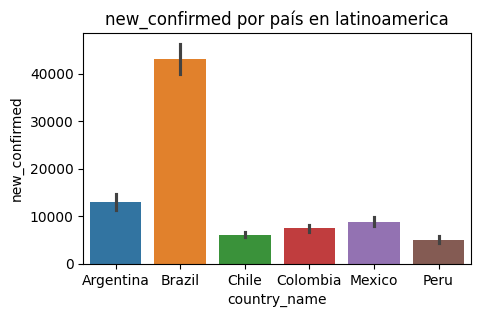

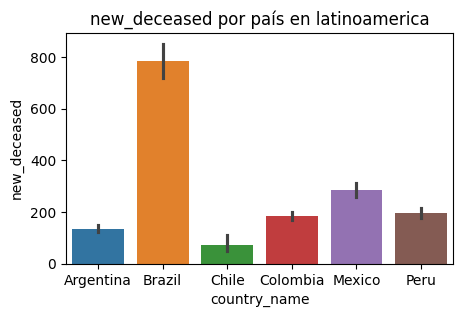

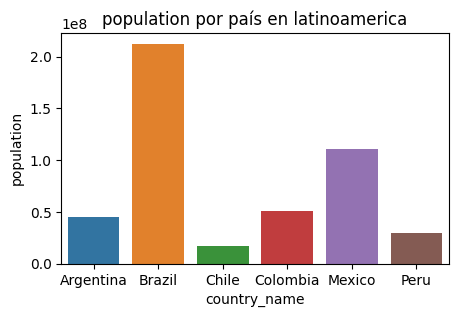

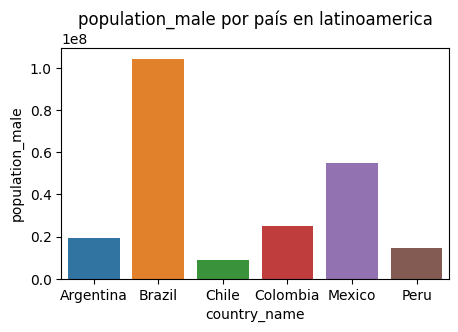

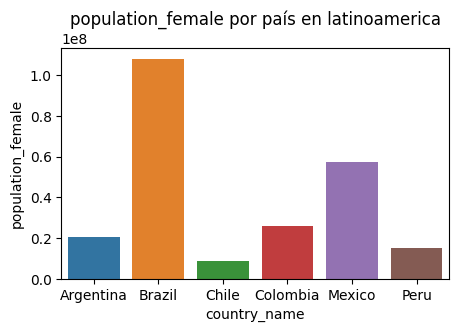

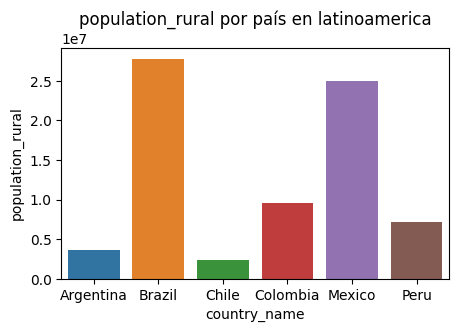

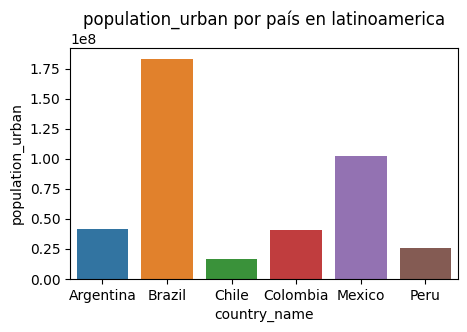

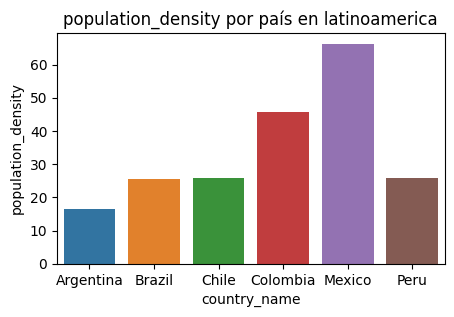

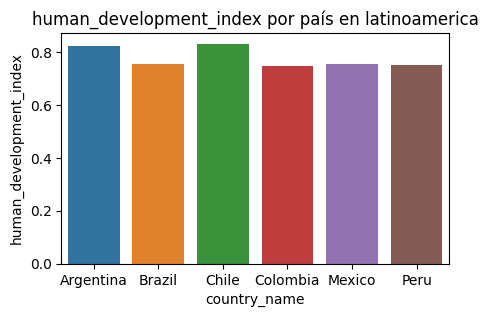

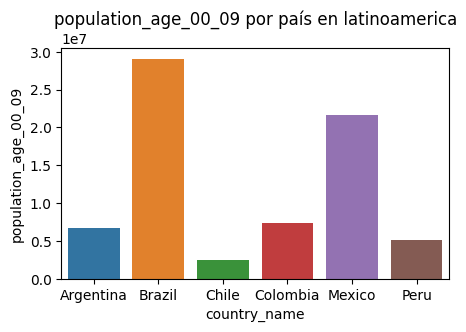

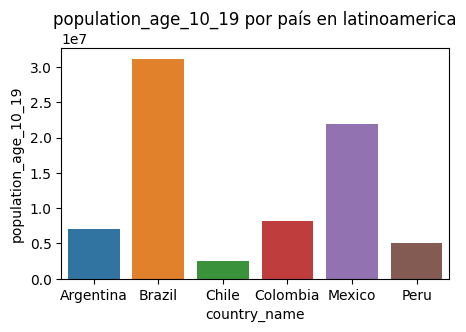

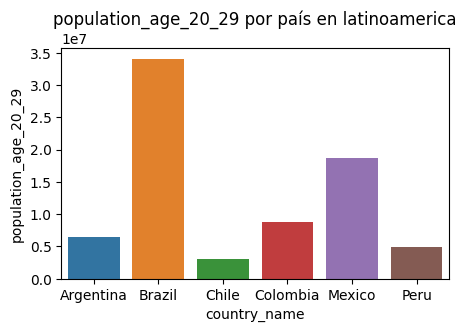

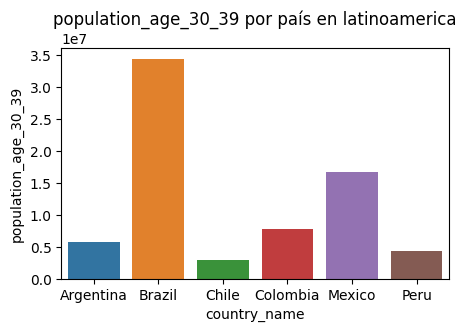

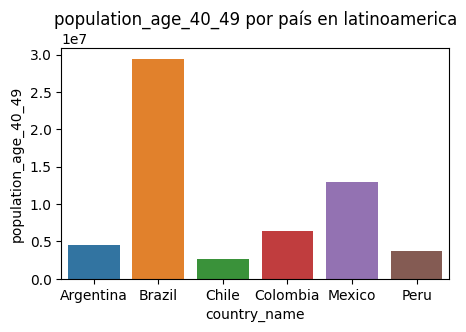

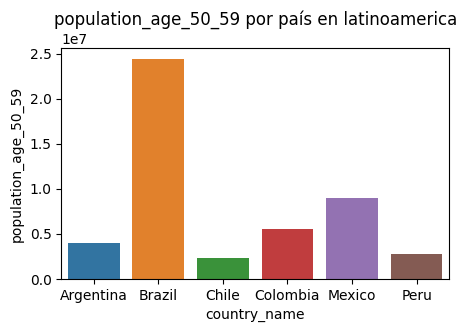

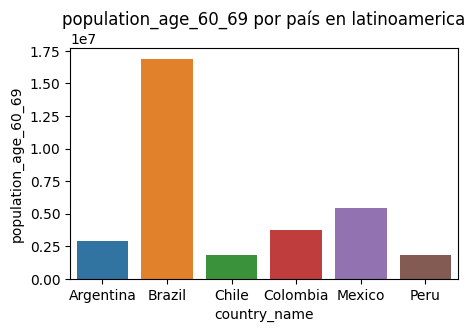

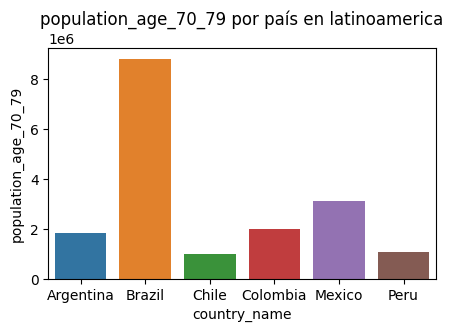

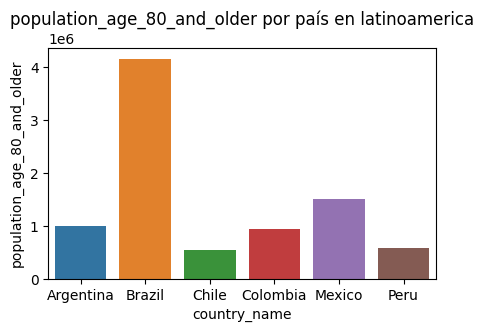

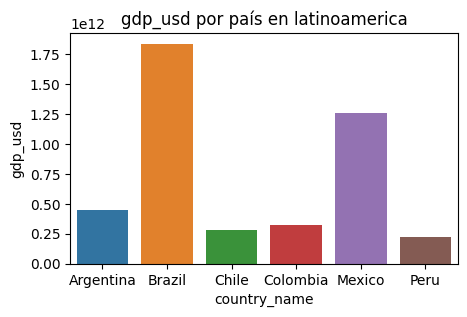

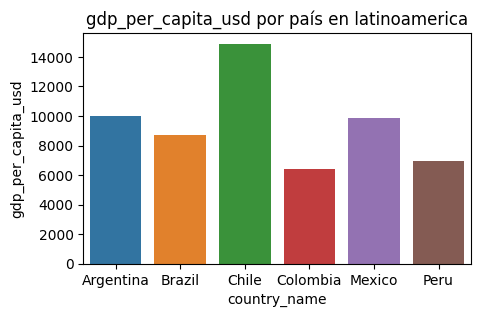

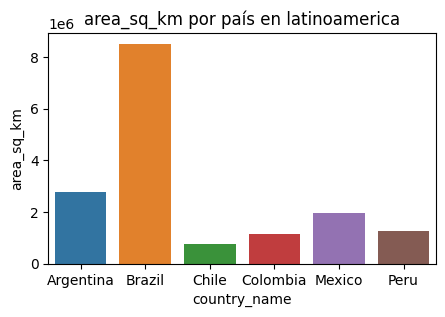

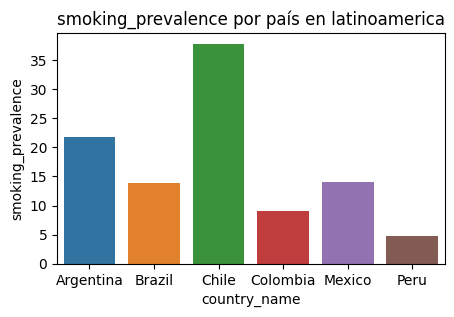

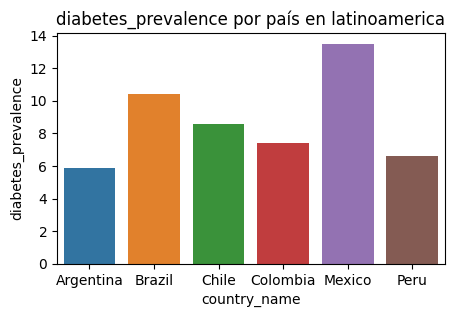

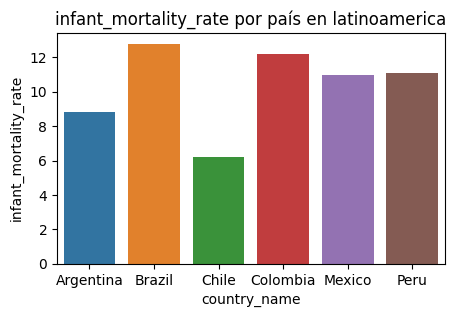

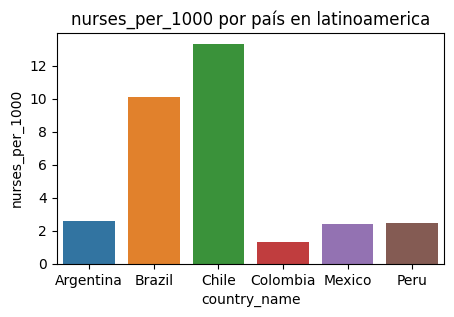

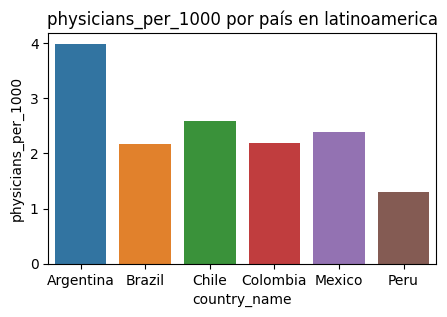

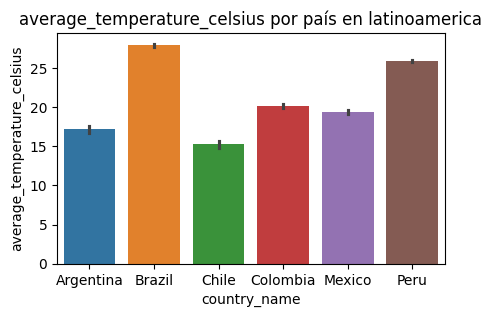

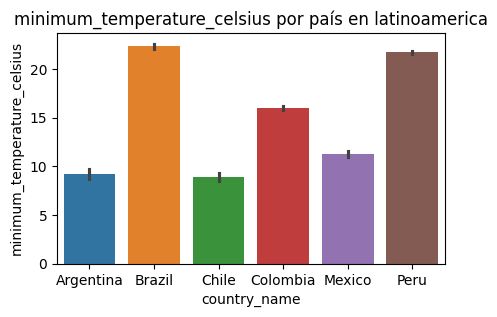

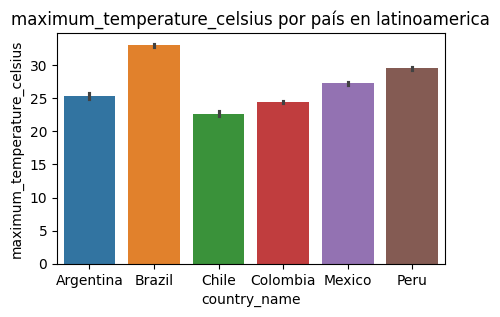

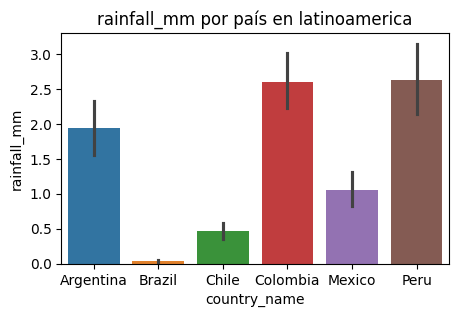

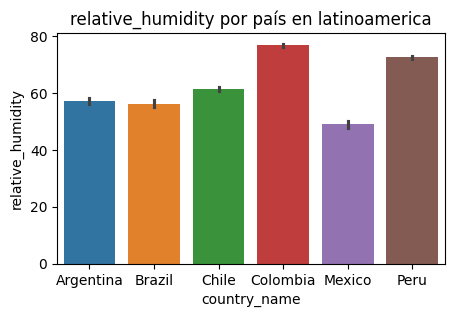

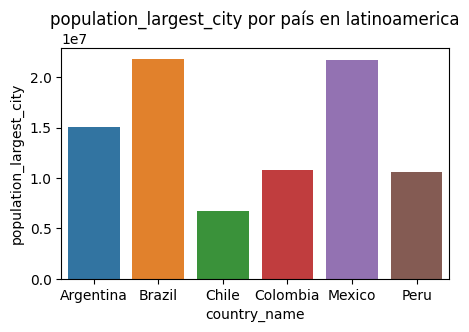

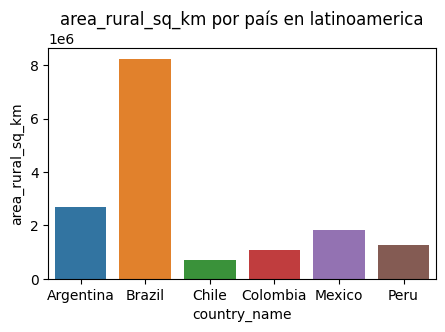

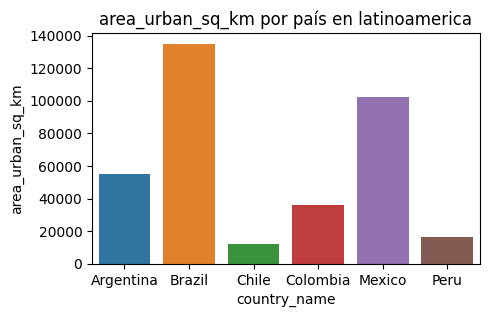

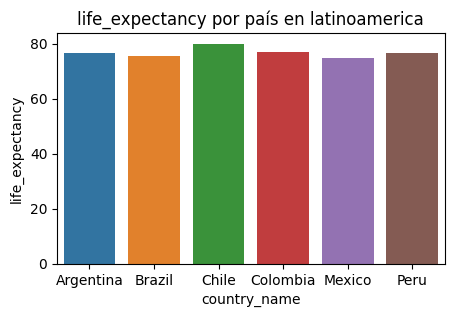

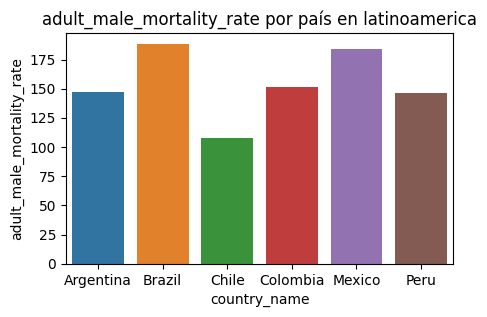

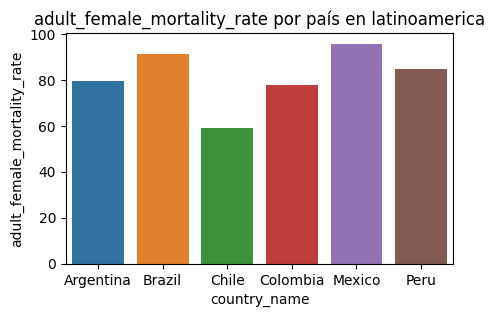

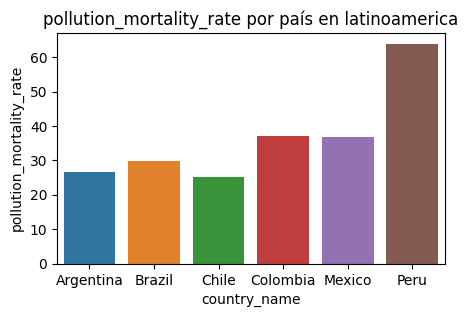

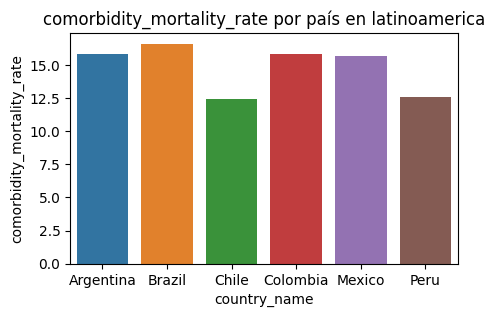

In [ ]:
# realice un for que me grafique cada columna para todos los paises, exceptuando todas las que no tenga sentido analizar
for i in dataPaisesLatinoamerica.columns:
    if i  not in ["location_key", "date", "country_code", "country_name", "latitude", "longitude", "cumulative_confirmed", "cumulative_deceased",
        "cumulative_recovered", "cumulative_vaccine_doses_administered", "new_recovered"]:
        fig, ax = plt.subplots(figsize = (5, 3))
        sns.barplot(x = "country_name", y = i, data = dataPaisesLatinoamerica, ax = ax, hue="country_name")
        plt.title(f"{i} por país en latinoamerica")
        plt.show()

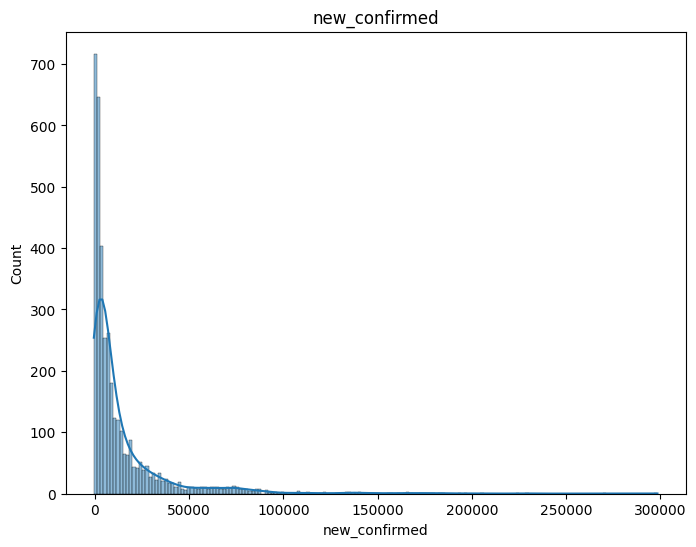

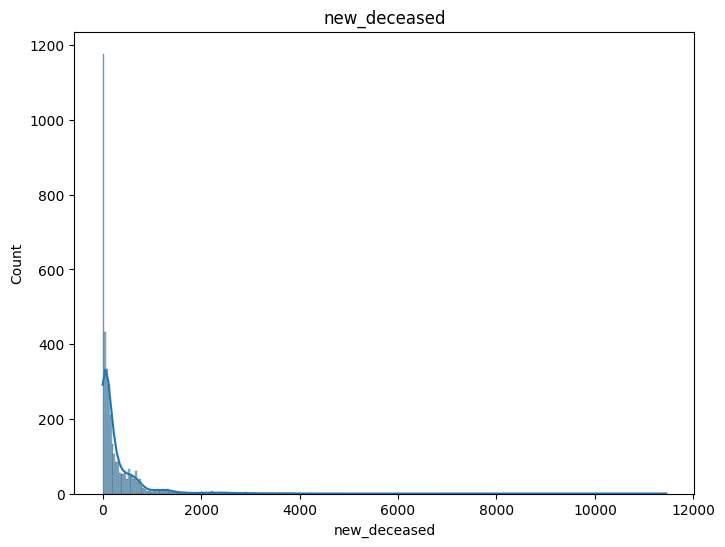

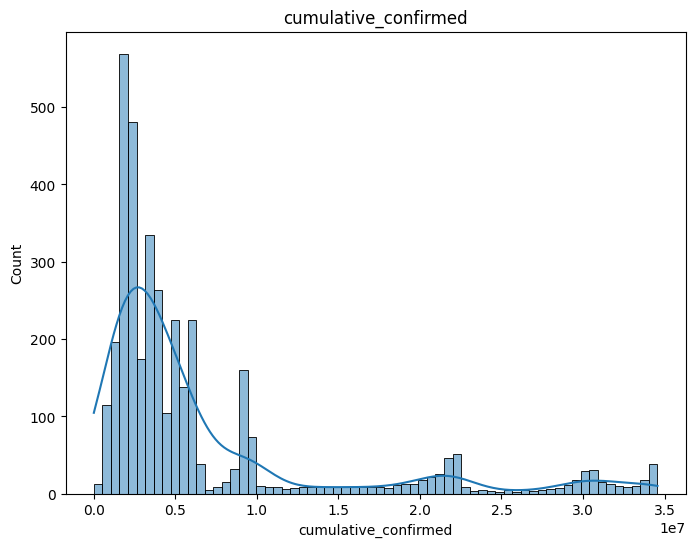

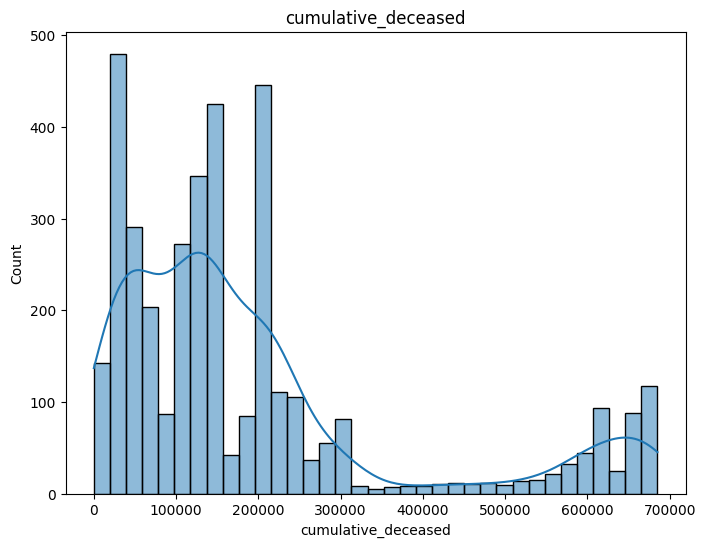

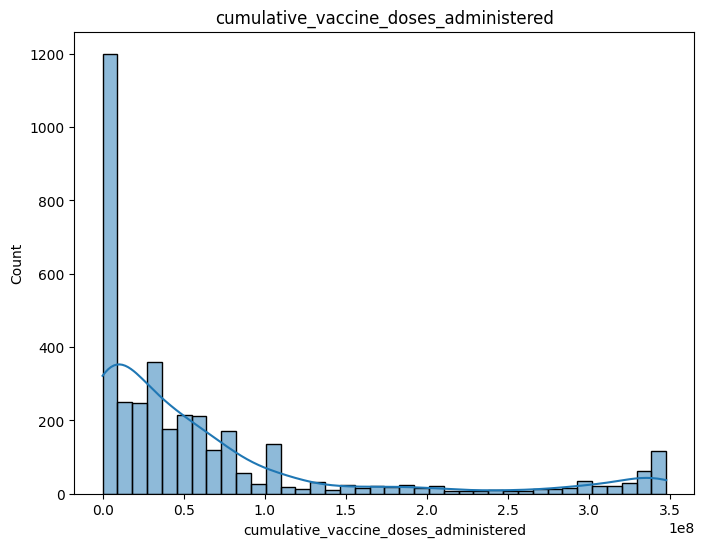

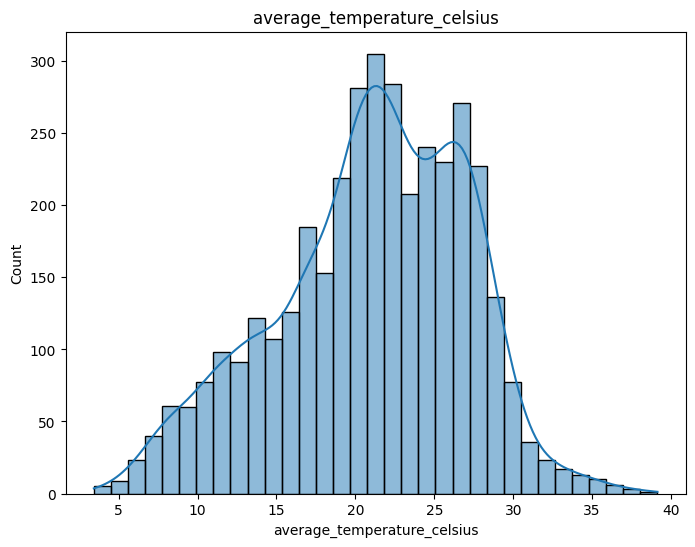

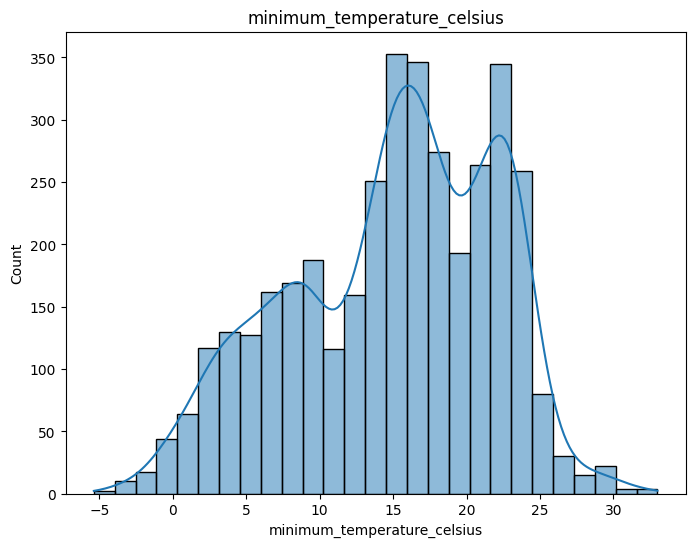

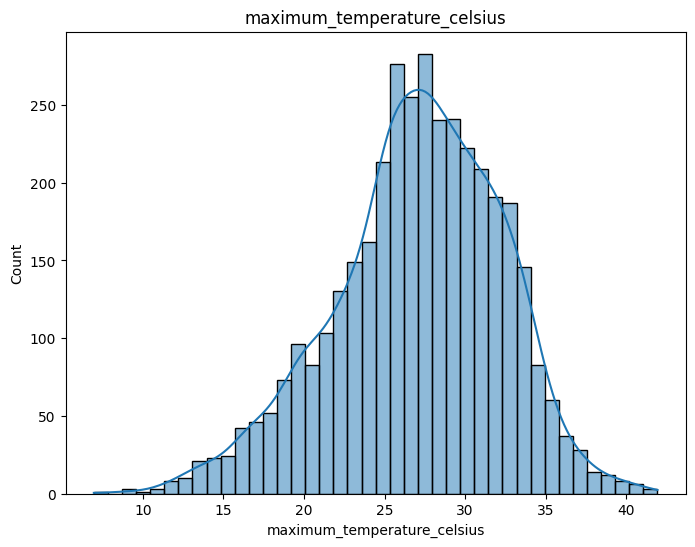

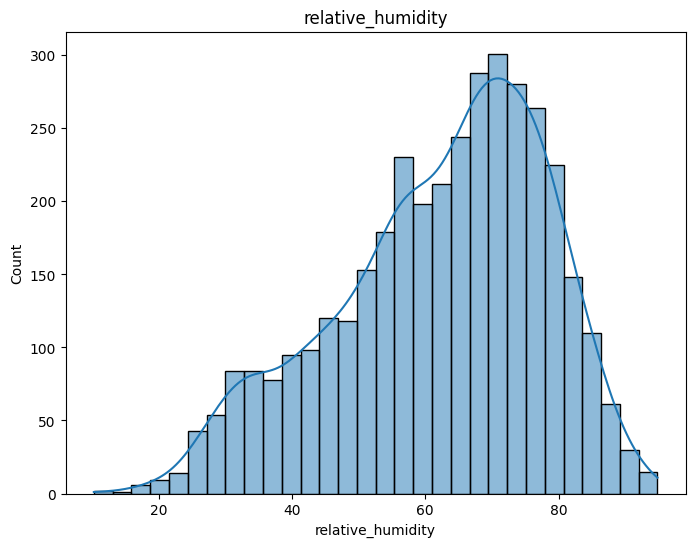

In [ ]:

# histograma, otra manera de graficar, creo una lista con las columnas que me interesan recorrer
listasColumnas = ["new_confirmed", "new_deceased", "cumulative_confirmed", "cumulative_deceased",#preguntar como me doy cuenta de elegir estos datos
                "cumulative_vaccine_doses_administered", "average_temperature_celsius", "minimum_temperature_celsius",
                "maximum_temperature_celsius", "relative_humidity"]

for i in dataPaisesLatinoamerica[listasColumnas]:
    fig, ax = plt.subplots(figsize = (8, 6))
    sns.histplot(dataPaisesLatinoamerica[i], kde = True)
    plt.title(i)
    plt.show()

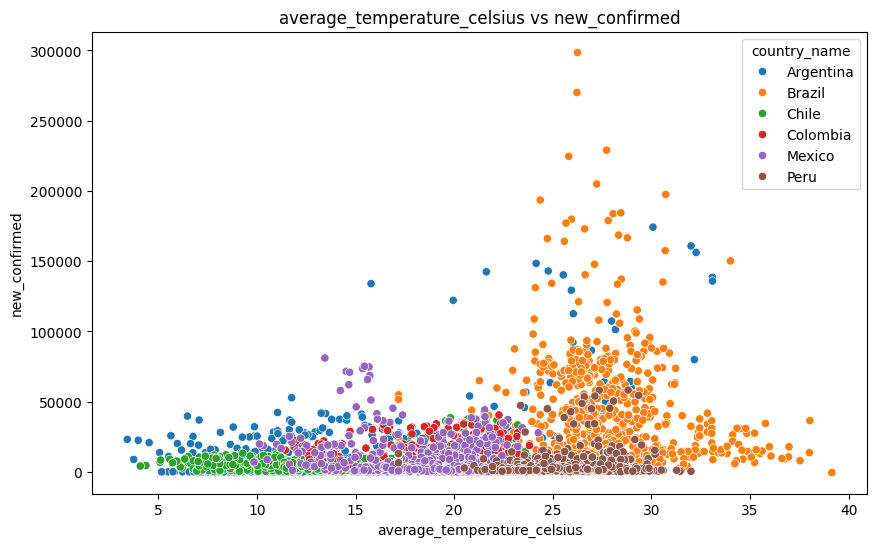

In [ ]:
# Diagrama de dispersion
fig, ax = plt.subplots(figsize = (10,6))
sns.scatterplot(x = "average_temperature_celsius", y = "new_confirmed", data = dataPaisesLatinoamerica, hue="country_name")
plt.title("average_temperature_celsius vs new_confirmed")
plt.show()

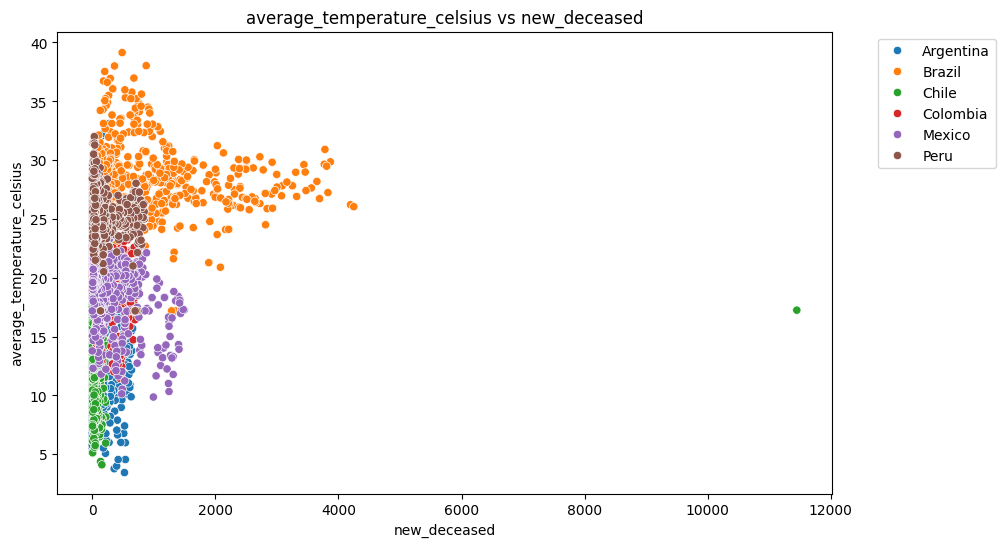

In [ ]:
# Muestra la influencia de temperatura en los fallecidos
fig, ax = plt.subplots(figsize = (10,6))
sns.scatterplot(x = "new_deceased", y = "average_temperature_celsius", data = dataPaisesLatinoamerica, hue="country_name")
plt.title("average_temperature_celsius vs new_deceased")
plt.legend(bbox_to_anchor = (1.05, 1), loc = "upper left")
plt.show()

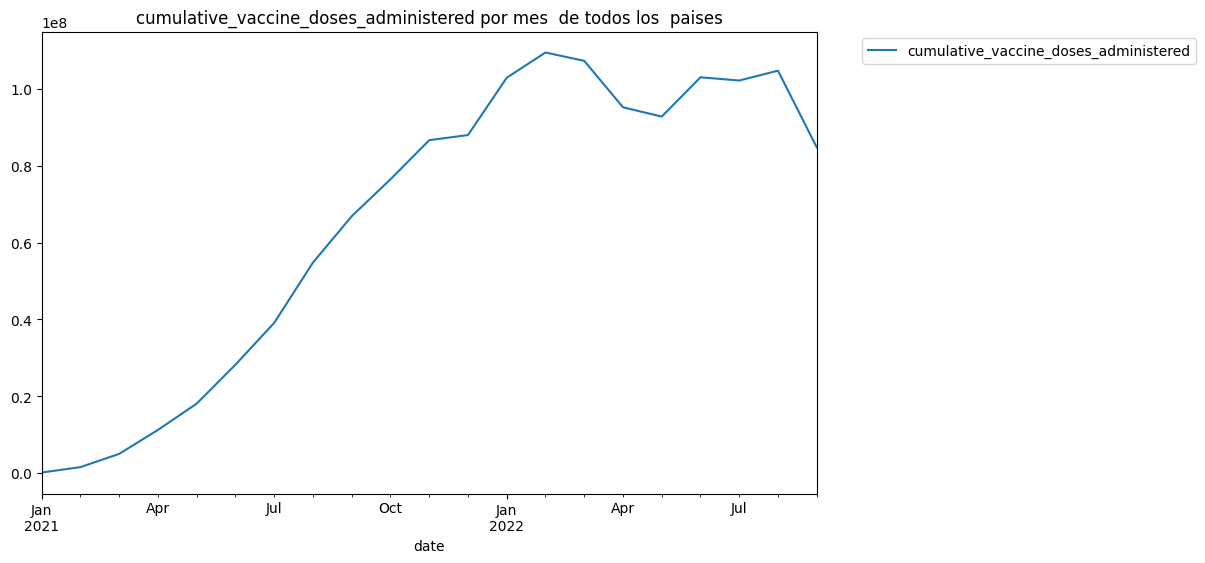

In [ ]:
# Acumulado de dosis administradas por mes de todos los paises analizados 
fig, ax = plt.subplots(figsize =(10, 6))
dataPaisesLatinoamerica.resample("ME").mean(numeric_only = True)["cumulative_vaccine_doses_administered"].plot()
plt.legend(bbox_to_anchor = (1.05, 1), loc = "upper left")
plt.title("cumulative_vaccine_doses_administered por mes  de todos los  paises")
plt.show()

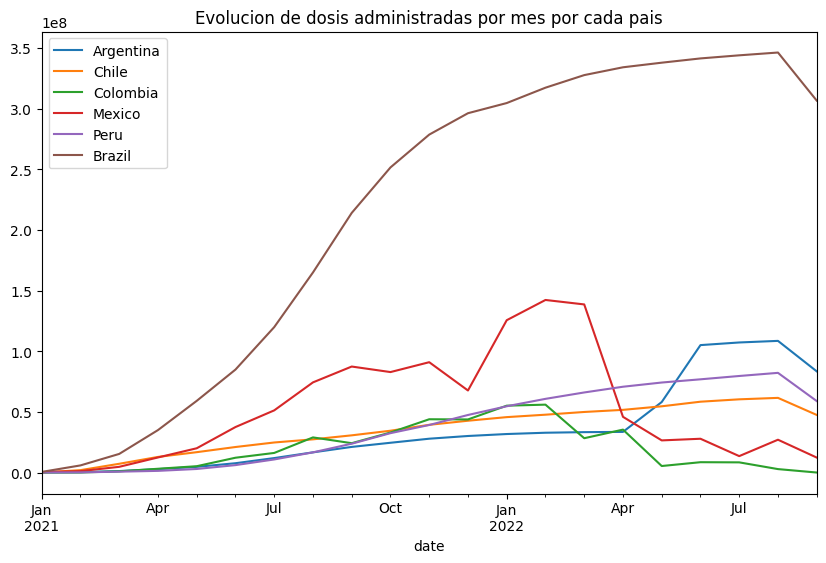

In [ ]:
#Evolucion de dosis administradas por mes por cada pais
fig, ax = plt.subplots(figsize =(10, 6))
for pais  in paisesSeleccionados:
    dataPaisesLatinoamerica[dataPaisesLatinoamerica["country_name"] == pais].resample("ME").mean(numeric_only = True)["cumulative_vaccine_doses_administered"].plot()
plt.legend(bbox_to_anchor = (1.05, 1), loc = "upper left")
plt.legend(paisesSeleccionados)
plt.title("Evolucion de dosis administradas por mes por cada pais")
plt.show()

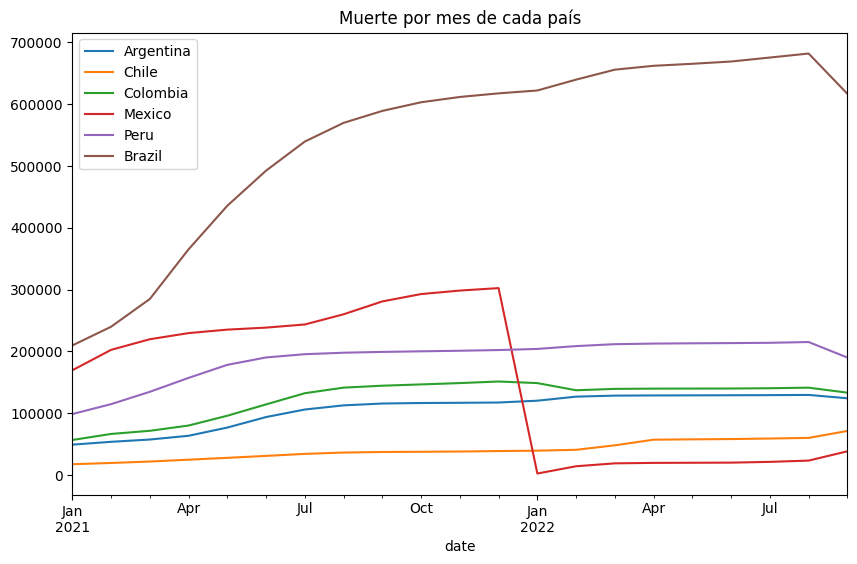

In [ ]:
#Muerte por mes de cada país
fig, ax = plt.subplots(figsize =(10, 6))
for pais  in paisesSeleccionados:
    dataPaisesLatinoamerica[dataPaisesLatinoamerica["country_name"] == pais].resample("ME").mean(numeric_only = True)["cumulative_deceased"].plot()
plt.legend(bbox_to_anchor = (1.05, 1), loc = "upper left")
plt.legend(paisesSeleccionados)
plt.title("Muerte por mes de cada país")
plt.show()

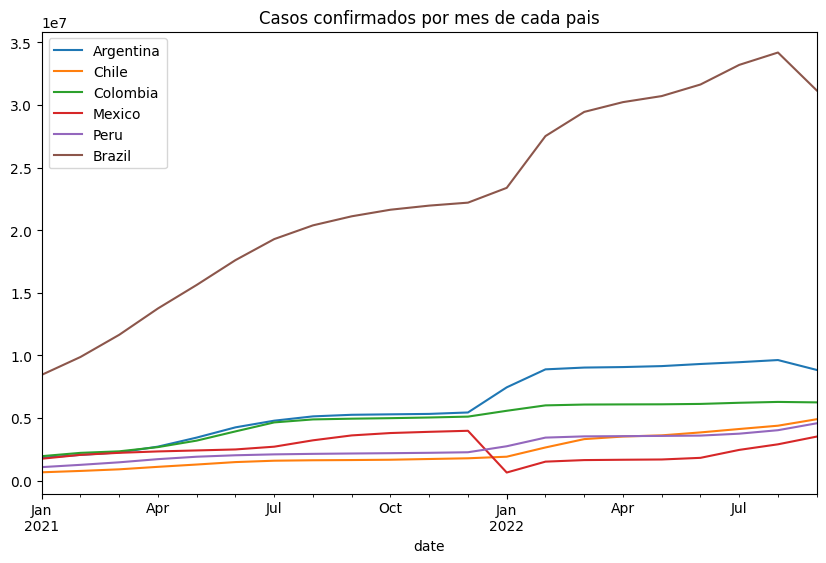

In [ ]:
#Casos confirmados por mes de cada pais
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paisesSeleccionados:
    dataPaisesLatinoamerica[dataPaisesLatinoamerica['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_confirmed'].plot()
plt.title('Casos confirmados por mes de cada pais')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paisesSeleccionados)
plt.show()

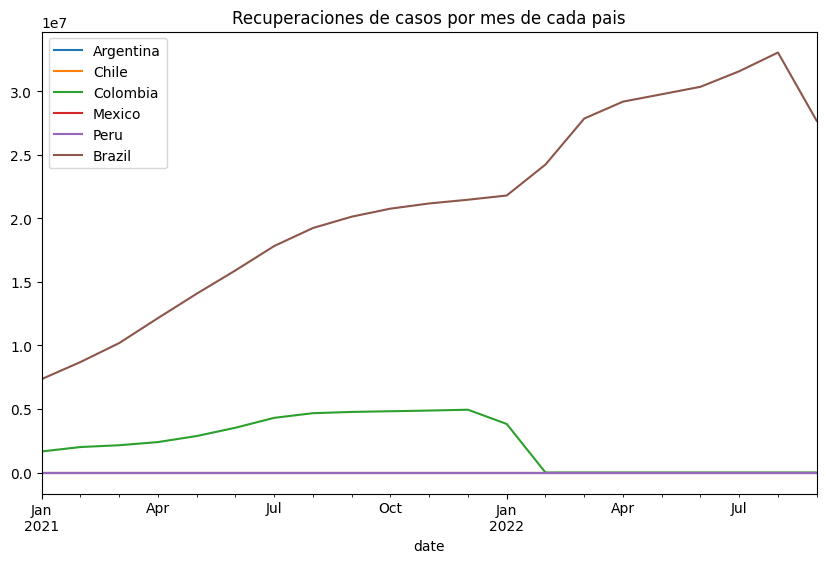

In [ ]:
#Recuperaciones de casos por mes de cada pais
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paisesSeleccionados:
    dataPaisesLatinoamerica[dataPaisesLatinoamerica['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_recovered'].plot()
plt.title('Recuperaciones de casos por mes de cada pais')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paisesSeleccionados)
plt.show()

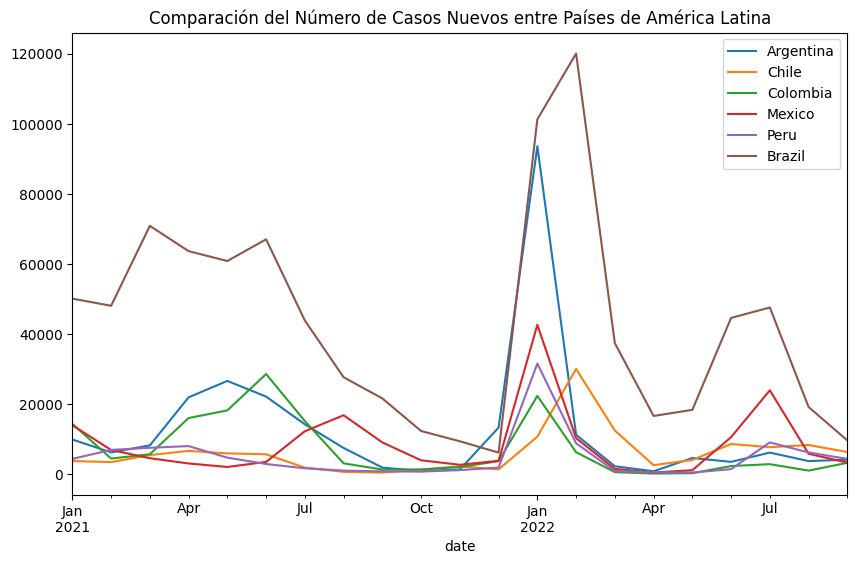

In [ ]:
# nuevos casos por pais
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paisesSeleccionados:
    dataPaisesLatinoamerica[dataPaisesLatinoamerica['country_name']==pais].resample('ME').mean(numeric_only=True)['new_confirmed'].plot()
plt.title('Comparación del Número de Casos Nuevos entre Países de América Latina')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paisesSeleccionados)
plt.show()

Text(0.5, 1.0, 'Distribución de dosis acumuladas por país')

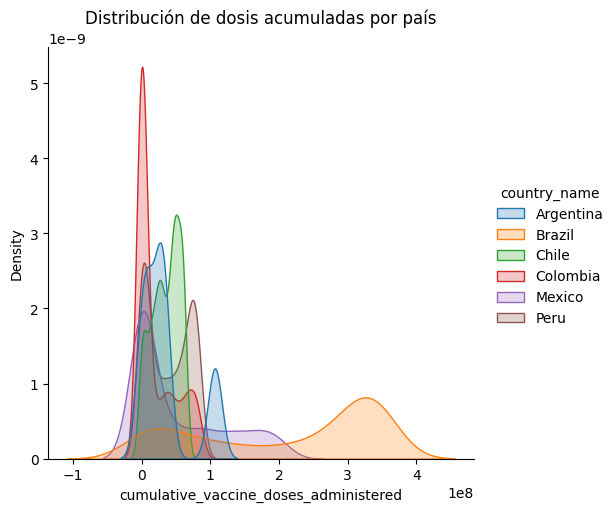

In [ ]:
#Distribución de dosis acumuladas por país
#dataPaisesLatinoamerica = dataPaisesLatinoamerica.reset_index()
sns.displot(dataPaisesLatinoamerica, x="cumulative_vaccine_doses_administered", hue="country_name", kind="kde", fill=True)
plt.title('Distribución de dosis acumuladas por país')

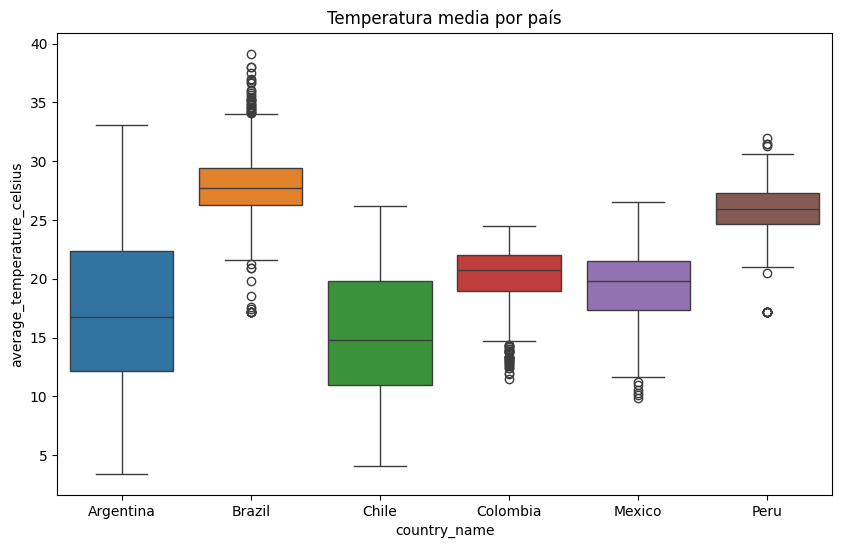

In [19]:
#distribucion de temperaturas por país
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='country_name', y='average_temperature_celsius', data=dataPaisesLatinoamerica, hue='country_name')
plt.title('Temperatura media por país')
plt.show()

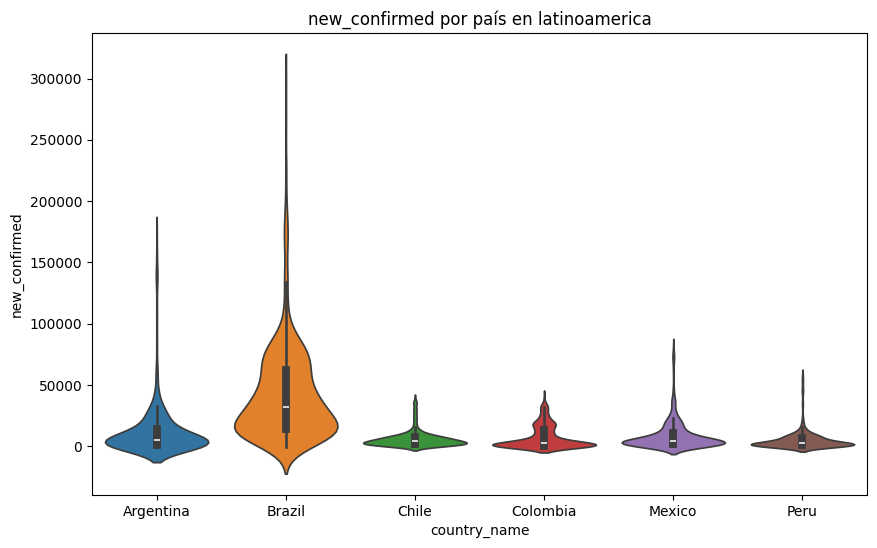

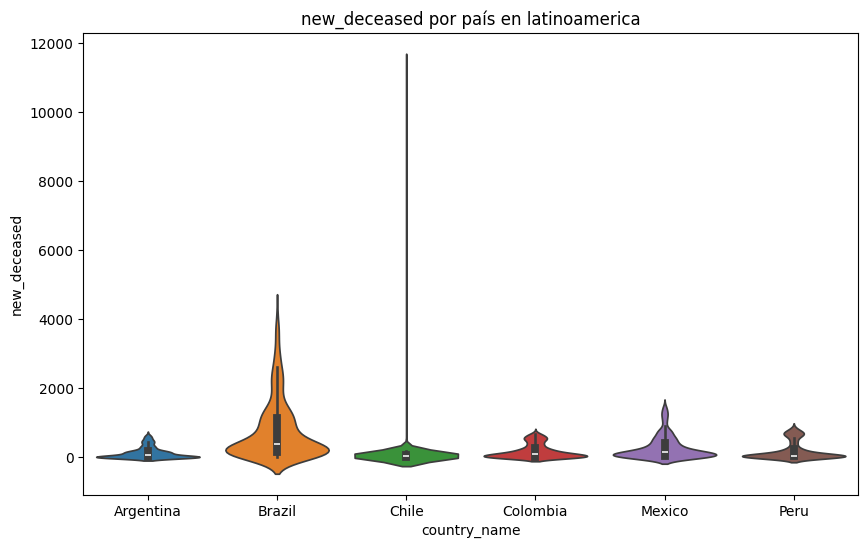

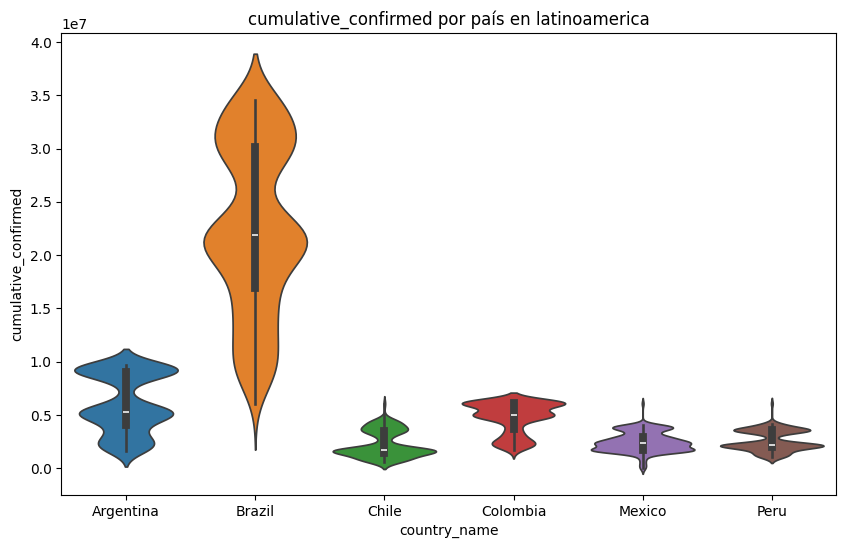

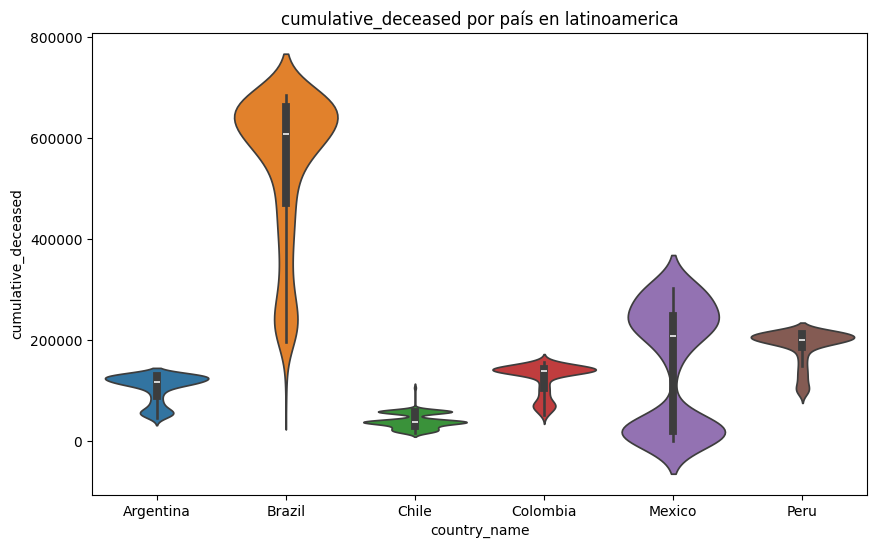

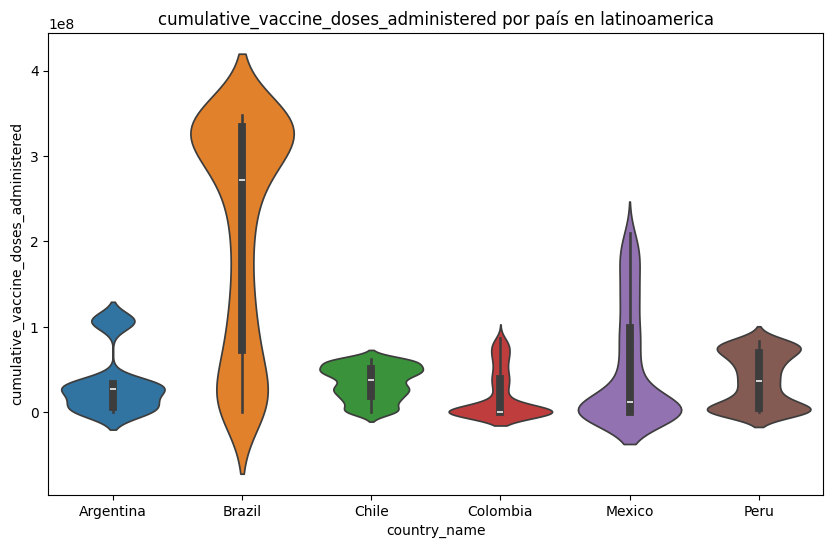

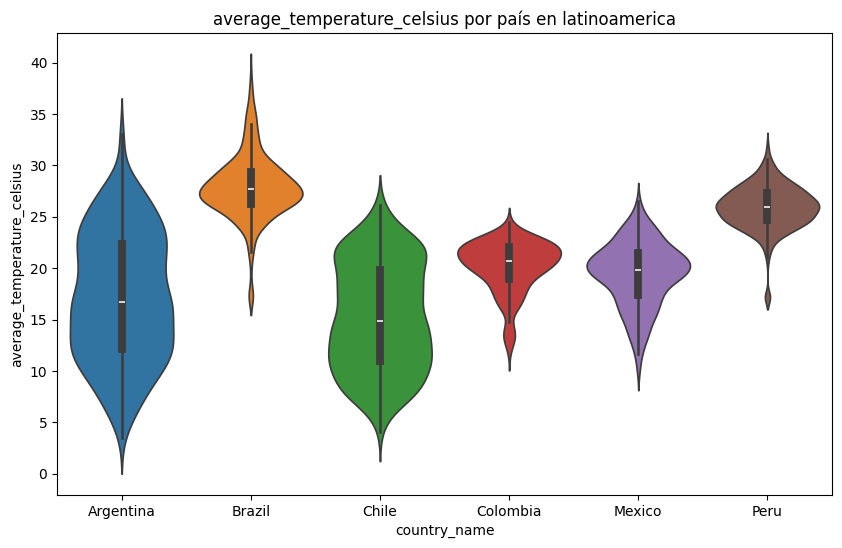

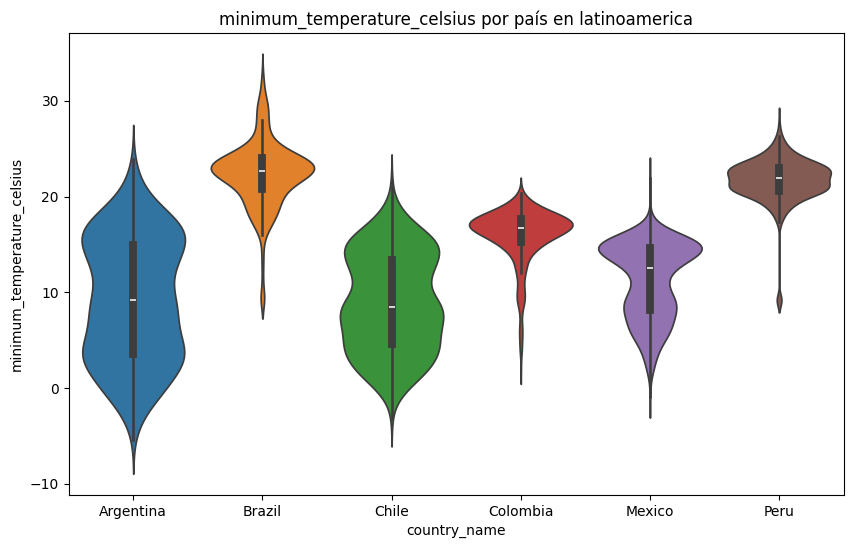

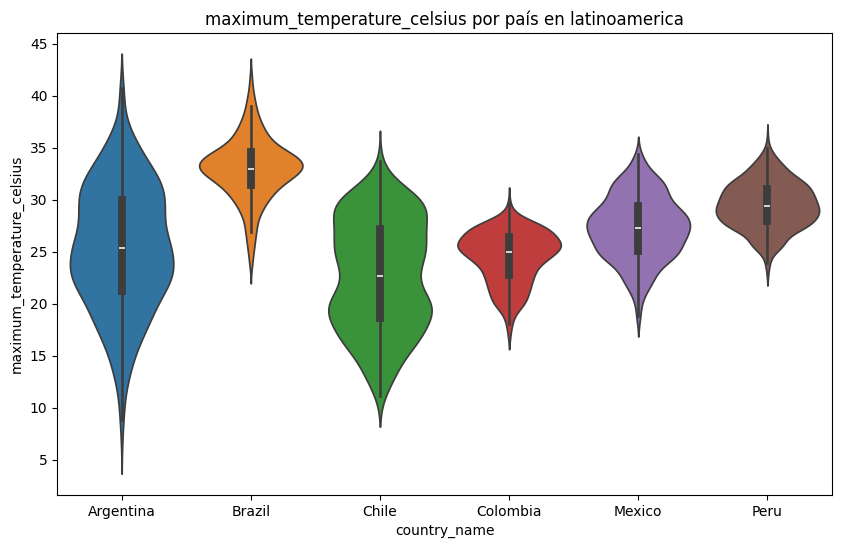

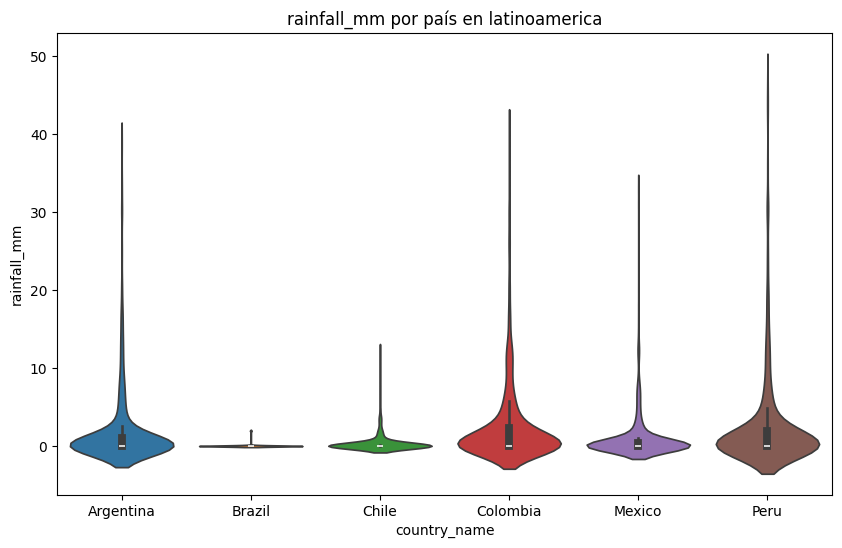

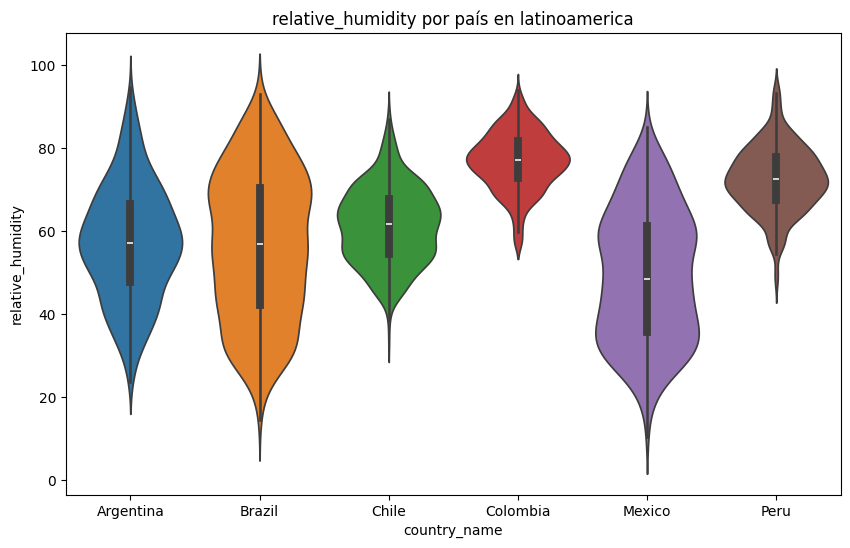

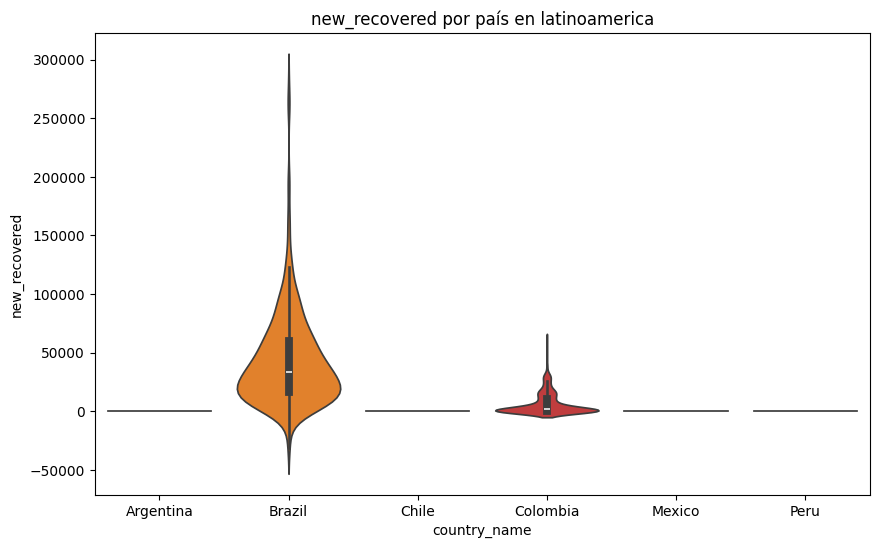

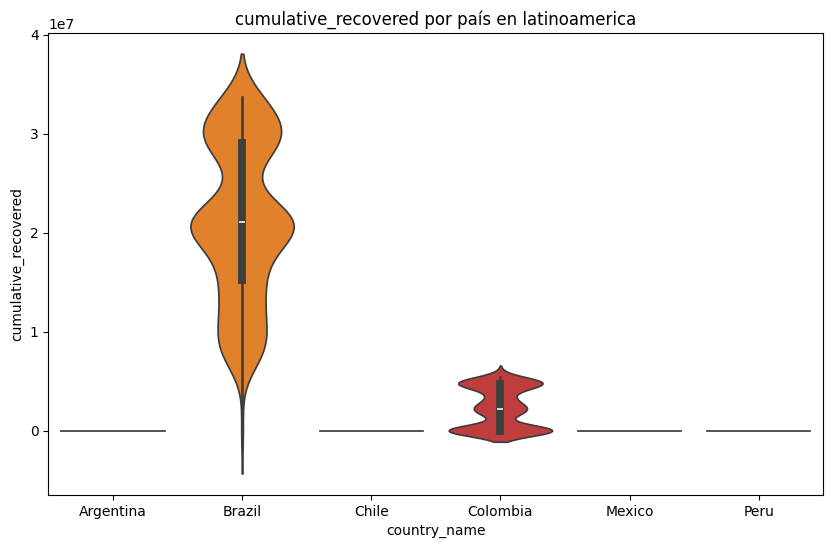

In [ ]:
columnasMayores6 = []
for i in dataPaisesLatinoamerica.columns:
    if i not in ['location_key','date','country_code','latitude','longitude']:
        if dataPaisesLatinoamerica[i].nunique()>6: #me interesan las columnas que tengas mas de 6 datos distintos
            columnasMayores6.append(i) # con append agrego a la lista columnasMayores6 si se cumple la condicion de que haya 3 valores distintos
#agregar a columnasMayores6 la columna country_name para poder hacer analisis por país. Ya que sino no tengo referencia
columnasMayores6.append('country_name')

# Se crea un dataframe con las columnas mayores a 6
dataPaisesLatinoamericaMayores = dataPaisesLatinoamerica[columnasMayores6]

# violinplot en todos los paises para variables numericas
for i in dataPaisesLatinoamericaMayores.columns:
    if i not in ['location_key','date','country_code','latitude','longitude','country_name']:
        fig, ax = plt.subplots(figsize=(10, 6))
        sns.violinplot(x='country_name', y=i, data=dataPaisesLatinoamericaMayores,hue='country_name')
        plt.title(f'{i} por país en latinoamerica')
        plt.show()

In [ ]:
dataPaisesLatinoamerica

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina    7767.000000   
2021-01-03           AR           AR    Argentina    4934.000000   
2021-01-04           AR           AR    Argentina   13953.000000   
2021-01-05           AR           AR    Argentina   14085.000000   
2021-01-06           AR           AR    Argentina   14496.000000   
...                 ...          ...          ...            ...   
2022-09-13           PE           PE         Peru    1150.000000   
2022-09-14           PE           PE         Peru   12911.385484   
2022-09-15           PE           PE         Peru   12911.385484   
2022-09-16           PE           PE         Peru   12911.385484   
2022-09-17           PE           PE         Peru   12911.385484   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02    166.000000          1.670634e+06         46688.000000   
2021-01-03    157.000000          1.675568e+06         46845.000000   
2021-01-04    157.000000          1.689521e+06         47002.000000   
2021-01-05    160.000000          1.703606e+06         47162.000000   
2021-01-06    131.000000          1.718102e+06         47293.000000   
...                  ...                   ...                  ...   
2022-09-13     22.000000          4.127612e+06        216173.000000   
2022-09-14    134.379032          6.079579e+06        105716.119355   
2022-09-15    134.379032          6.079579e+06        105716.119355   
2022-09-16    134.379032          6.079579e+06        105716.119355   
2022-09-17    134.379032          6.079579e+06        105716.119355   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                                20334.0  44938712.0   
2021-01-03                                20529.0  44938712.0   
2021-01-04                                25164.0  44938712.0   
2021-01-05                                29852.0  44938712.0   
2021-01-06                                34162.0  44938712.0   
...                                           ...         ...   
2022-09-13                                    0.0  29381884.0   
2022-09-14                                    0.0  29381884.0   
2022-09-15                                    0.0  29381884.0   
2022-09-16                                    0.0  29381884.0   
2022-09-17                                    0.0  29381884.0   

            population_male  ...  population_largest_city  area_rural_sq_km  \
date                         ...                                              
2021-01-02       19523766.0  ...               15057273.0         2690269.0   
2021-01-03       19523766.0  ...               15057273.0         2690269.0   
2021-01-04       19523766.0  ...               15057273.0         2690269.0   
2021-01-05       19523766.0  ...               15057273.0         2690269.0   
2021-01-06       19523766.0  ...               15057273.0         2690269.0   
...                     ...  ...                      ...               ...   
2022-09-13       14450757.0  ...               10554712.0         1256339.0   
2022-09-14       14450757.0  ...               10554712.0         1256339.0   
2022-09-15       14450757.0  ...               10554712.0         1256339.0   
2022-09-16       14450757.0  ...               10554712.0         1256339.0   
2022-09-17       14450757.0  ...               10554712.0         1256339.0   

            area_urban_sq_km  life_expectancy  adult_male_mortality_rate  \
date                                                                       
2021-01-02           55032.0           76.520                    147.086   
2021-01-03           55032.0           76.520                    147.086   
2021-01-04           550

In [22]:
#fijo cantidad de decimales en 2
pd.set_option('display.float_format', '{:.2f}'.format)

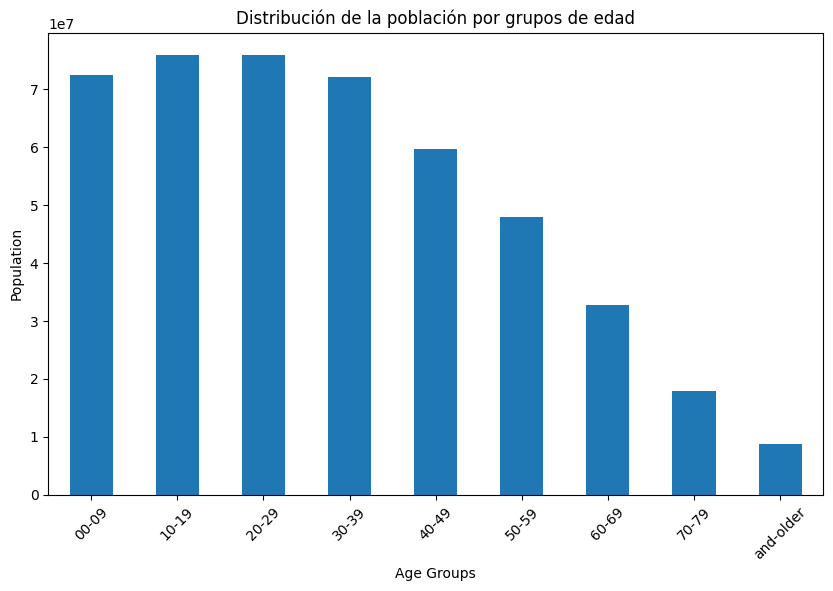

In [23]:
# Primero agrupe edades por país y luego grafique la distribucion de la poblacion por grupos de edad

columnasSeleccionadas = ['country_name','population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
ultimosCasos = dataPaisesLatinoamerica[columnasSeleccionadas].groupby('country_name').last().sort_values(by='population_age_00_09')
rangoPorEdad = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
distribucionPorEdades = ultimosCasos[rangoPorEdad].sum()
distribucionPorEdades

plt.figure(figsize=(10, 6))
distribucionPorEdades.plot(kind='bar', stacked=True)
plt.xlabel('Age Groups')
plt.ylabel('Population')
plt.title('Distribución de la población por grupos de edad')
plt.xticks(range(len(rangoPorEdad)), [col.split('_')[-2] + '-' + col.split('_')[-1] for col in rangoPorEdad], rotation=45)

plt.show()

In [24]:
paisesSeleccionados = ['Argentina','Chile','Colombia','Mexico','Peru','Brazil']

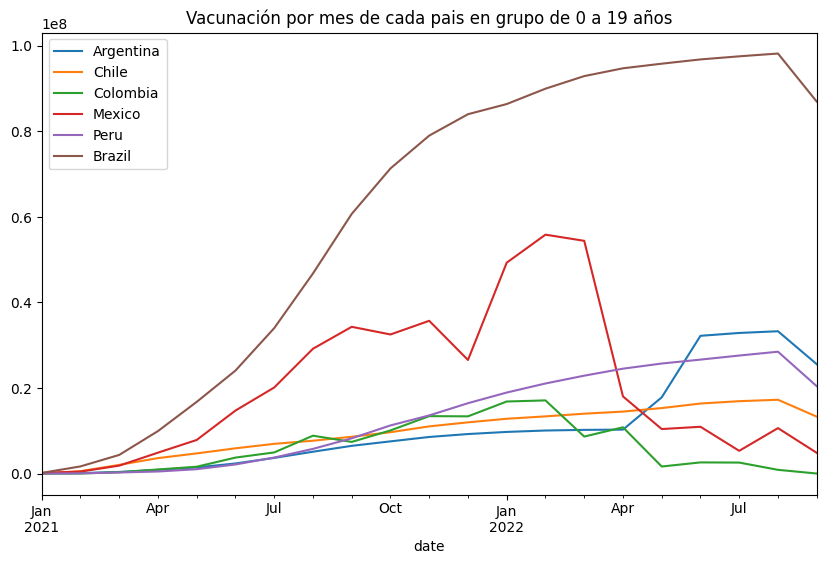

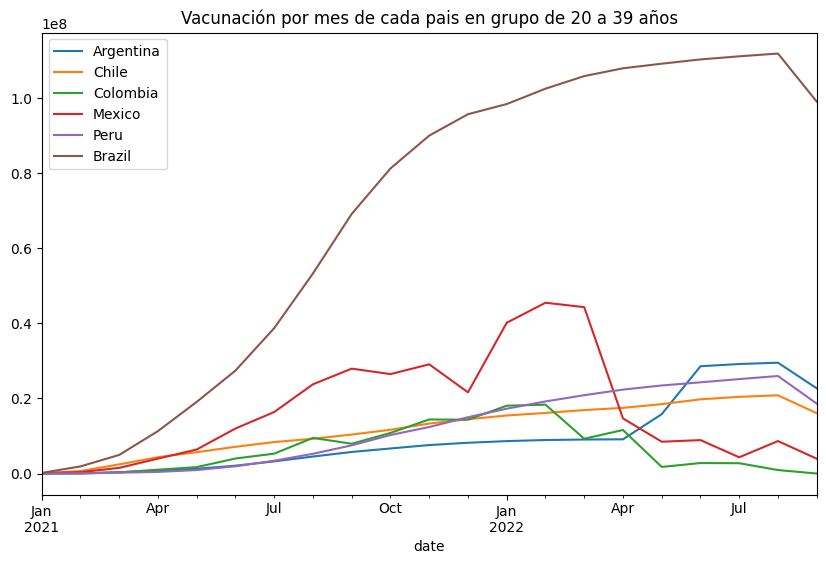

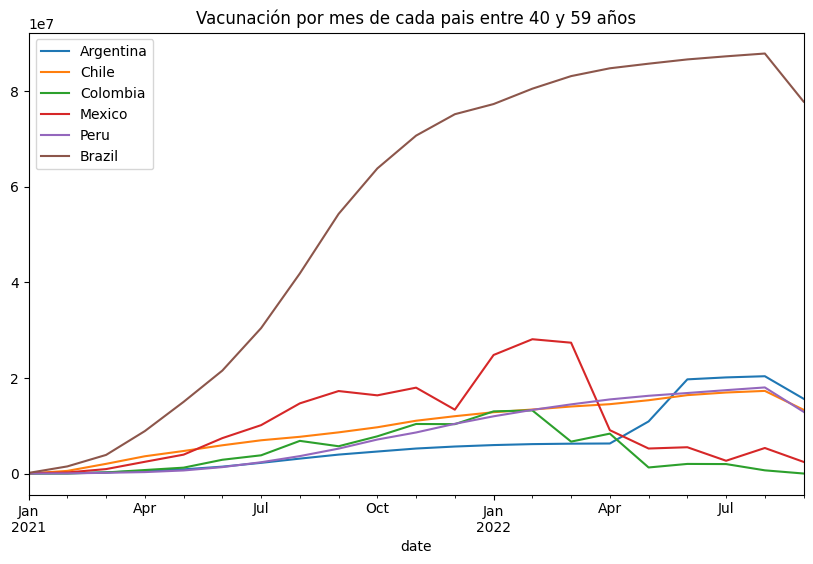

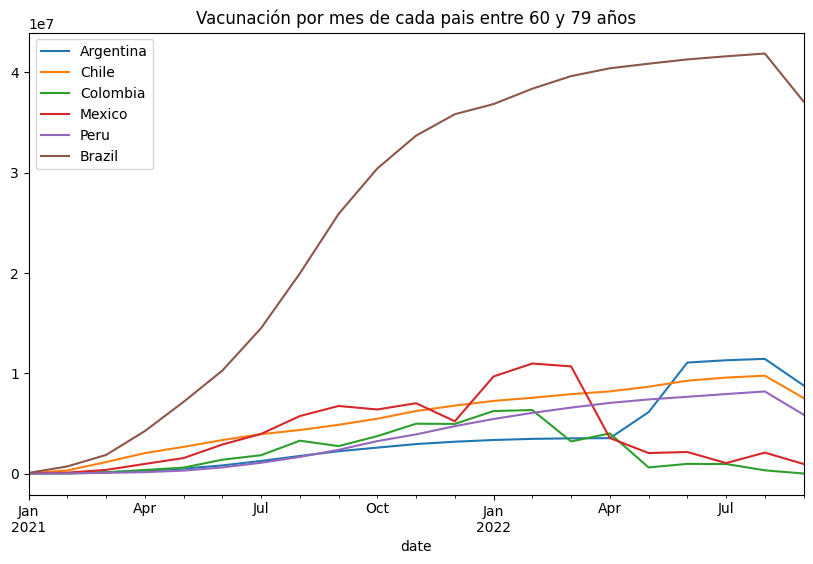

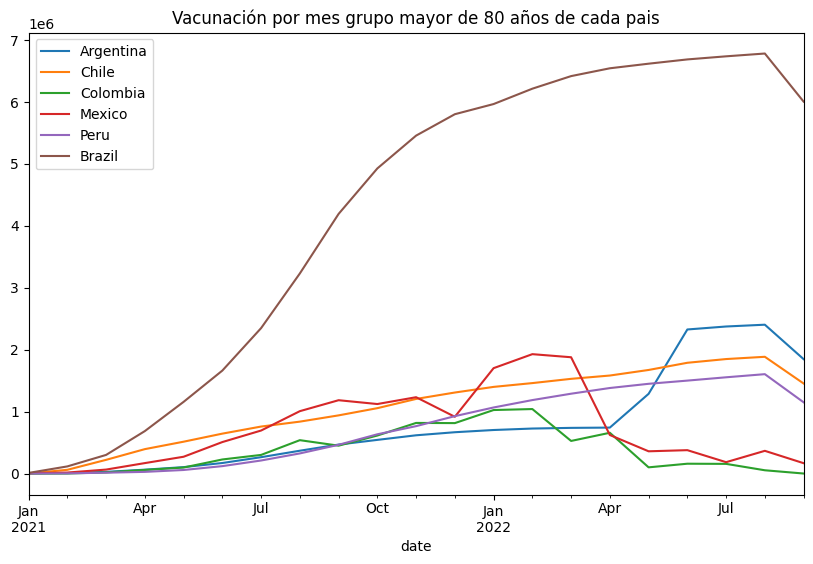

In [ ]:
# Agrupo por rango de 20 años de edades 
# Grupo etareo mas vacunado
dataPaisesLatinoamerica['population_age_00_19'] = dataPaisesLatinoamerica['population_age_00_09'] + dataPaisesLatinoamerica['population_age_10_19']
dataPaisesLatinoamerica['population_age_20_39'] = dataPaisesLatinoamerica['population_age_20_29'] + dataPaisesLatinoamerica['population_age_30_39']
dataPaisesLatinoamerica['population_age_40_59'] = dataPaisesLatinoamerica['population_age_40_49'] + dataPaisesLatinoamerica['population_age_50_59']
dataPaisesLatinoamerica['population_age_60_79'] = dataPaisesLatinoamerica['population_age_60_69'] + dataPaisesLatinoamerica['population_age_70_79']
dataPaisesLatinoamerica['population_age_80_and_older'] = dataPaisesLatinoamerica['population_age_80_and_older']

dataPaisesLatinoamerica['population_age_00_19_vacunados'] = dataPaisesLatinoamerica['cumulative_vaccine_doses_administered'] * dataPaisesLatinoamerica['population_age_00_19'] / dataPaisesLatinoamerica['population']
dataPaisesLatinoamerica['population_age_20_39_vacunados'] = dataPaisesLatinoamerica['cumulative_vaccine_doses_administered'] * dataPaisesLatinoamerica['population_age_20_39'] / dataPaisesLatinoamerica['population']
dataPaisesLatinoamerica['population_age_40_59_vacunados'] = dataPaisesLatinoamerica['cumulative_vaccine_doses_administered'] * dataPaisesLatinoamerica['population_age_40_59'] / dataPaisesLatinoamerica['population']
dataPaisesLatinoamerica['population_age_60_79_vacunados'] = dataPaisesLatinoamerica['cumulative_vaccine_doses_administered'] * dataPaisesLatinoamerica['population_age_60_79'] / dataPaisesLatinoamerica['population']
dataPaisesLatinoamerica['population_age_80_and_older_vacunados'] = dataPaisesLatinoamerica['cumulative_vaccine_doses_administered'] * dataPaisesLatinoamerica['population_age_80_and_older'] / dataPaisesLatinoamerica['population']

dataPaisesLatinoamerica['population_age_00_19_vacunados'] = dataPaisesLatinoamerica['population_age_00_19_vacunados'].fillna(0)
dataPaisesLatinoamerica['population_age_20_39_vacunados'] = dataPaisesLatinoamerica['population_age_20_39_vacunados'].fillna(0)
dataPaisesLatinoamerica['population_age_40_59_vacunados'] = dataPaisesLatinoamerica['population_age_40_59_vacunados'].fillna(0)
dataPaisesLatinoamerica['population_age_60_79_vacunados'] = dataPaisesLatinoamerica['population_age_60_79_vacunados'].fillna(0)
dataPaisesLatinoamerica['population_age_80_and_older_vacunados'] = dataPaisesLatinoamerica['population_age_80_and_older_vacunados'].fillna(0)

dataPaisesLatinoamerica['population_age_00_19_vacunados'] = dataPaisesLatinoamerica['population_age_00_19_vacunados'].astype(int)
dataPaisesLatinoamerica['population_age_20_39_vacunados'] = dataPaisesLatinoamerica['population_age_20_39_vacunados'].astype(int)
dataPaisesLatinoamerica['population_age_40_59_vacunados'] = dataPaisesLatinoamerica['population_age_40_59_vacunados'].astype(int)
dataPaisesLatinoamerica['population_age_60_79_vacunados'] = dataPaisesLatinoamerica['population_age_60_79_vacunados'].astype(int)
dataPaisesLatinoamerica['population_age_80_and_older_vacunados'] = dataPaisesLatinoamerica['population_age_80_and_older_vacunados'].astype(int)

dataPaisesLatinoamerica['population_age_00_19_vacunados'].sum()
dataPaisesLatinoamerica['population_age_20_39_vacunados'].sum()
dataPaisesLatinoamerica['population_age_40_59_vacunados'].sum()
dataPaisesLatinoamerica['population_age_60_79_vacunados'].sum()
dataPaisesLatinoamerica['population_age_80_and_older_vacunados'].sum()

# Grafica de valores medios de todos los paises cumulative_vaccine_doses_administered
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paisesSeleccionados:
    dataPaisesLatinoamerica[dataPaisesLatinoamerica['country_name'] == pais].resample('ME').mean(numeric_only=True)['population_age_00_19_vacunados'].plot()
plt.title('Vacunación por mes de cada pais en grupo de 0 a 19 años')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paisesSeleccionados)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
for pais in paisesSeleccionados:
    dataPaisesLatinoamerica[dataPaisesLatinoamerica['country_name'] == pais].resample('ME').mean(numeric_only=True)['population_age_20_39_vacunados'].plot()
plt.title('Vacunación por mes de cada pais en grupo de 20 a 39 años')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paisesSeleccionados)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
for pais in paisesSeleccionados:
    dataPaisesLatinoamerica[dataPaisesLatinoamerica['country_name'] == pais].resample('ME').mean(numeric_only=True)['population_age_40_59_vacunados'].plot()
plt.title('Vacunación por mes de cada pais entre 40 y 59 años')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paisesSeleccionados)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
for pais in paisesSeleccionados:
    dataPaisesLatinoamerica[dataPaisesLatinoamerica['country_name'] == pais].resample('ME').mean(numeric_only=True)['population_age_60_79_vacunados'].plot()
plt.title('Vacunación por mes de cada pais entre 60 y 79 años')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paisesSeleccionados)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
for pais in paisesSeleccionados:
    dataPaisesLatinoamerica[dataPaisesLatinoamerica['country_name'] == pais].resample('ME').mean(numeric_only=True)['population_age_80_and_older_vacunados'].plot()
plt.title('Vacunación por mes grupo mayor de 80 años de cada pais')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paisesSeleccionados)
plt.show()

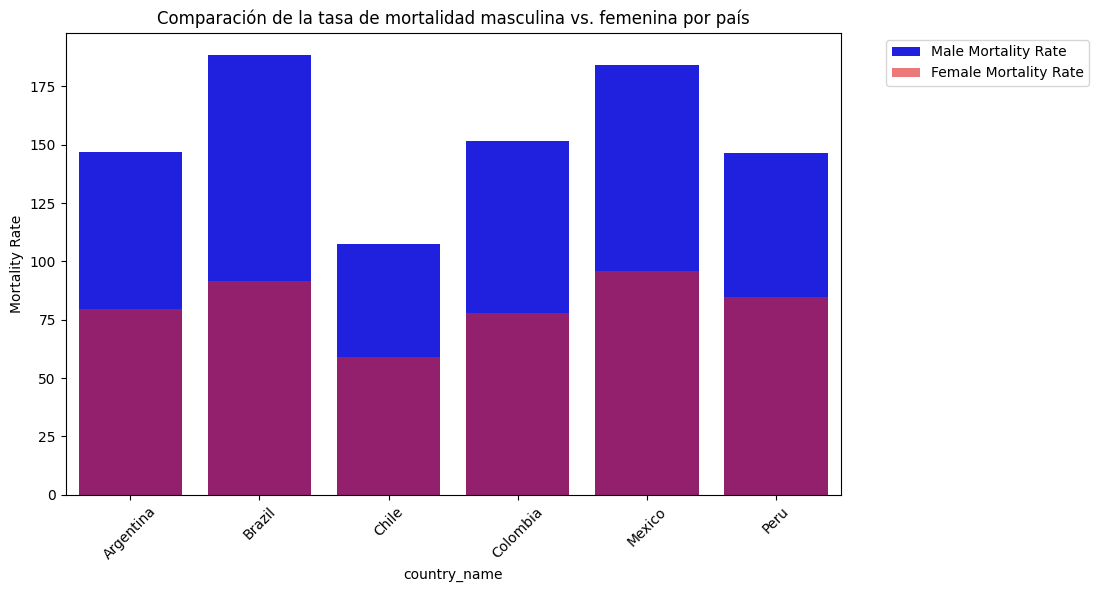

In [26]:
# Grafica de mortalidad por genero. Tasa de Mortalidad entendida en Cantidad de muertes cada 1.000.000 de habitantes

plt.figure(figsize=(10, 6))
sns.barplot(data=dataPaisesLatinoamerica, x='country_name', y='adult_male_mortality_rate', color='blue', label='Male Mortality Rate')
sns.barplot(data=dataPaisesLatinoamerica, x='country_name', y='adult_female_mortality_rate', color='red', alpha=0.6, label='Female Mortality Rate')
plt.xticks(rotation=45)
plt.ylabel('Mortality Rate')
plt.title('Comparación de la tasa de mortalidad masculina vs. femenina por país')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

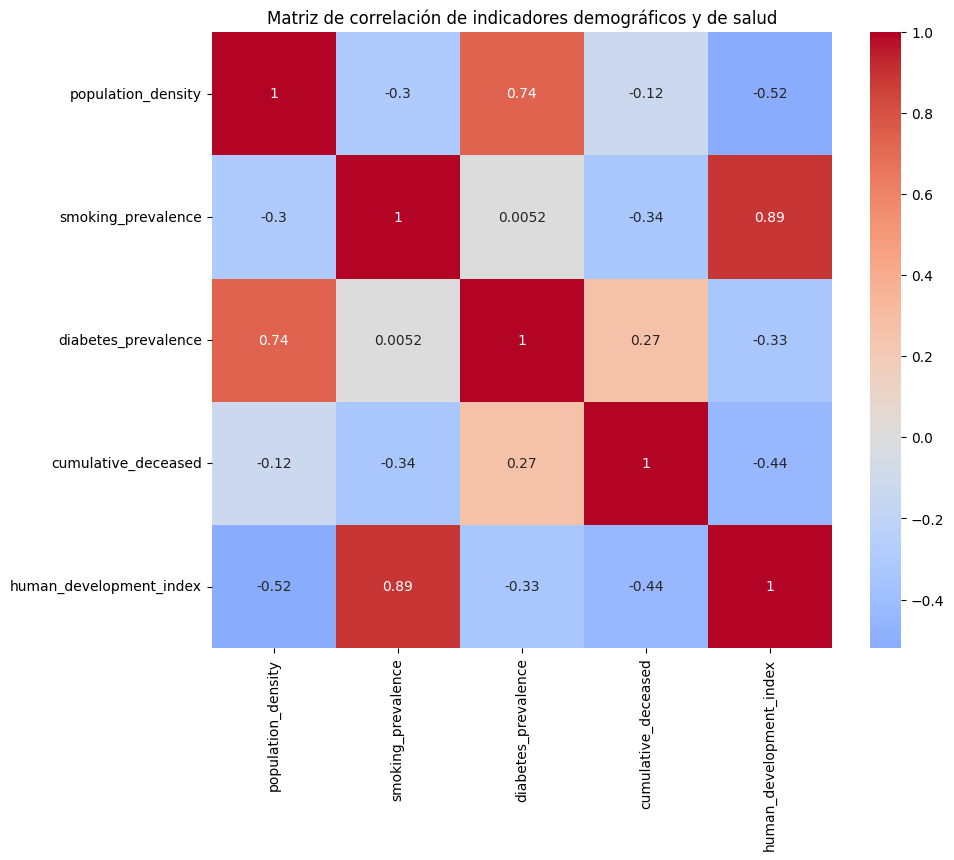

In [27]:
# Selecciono las variables númericas que quiero correlacionar
columnas = ['population_density', 'smoking_prevalence', 'diabetes_prevalence', 'cumulative_deceased', 'human_development_index']
matrizDeCorrelacion = dataPaisesLatinoamerica[columnas].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matrizDeCorrelacion, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de correlación de indicadores demográficos y de salud')
plt.show()

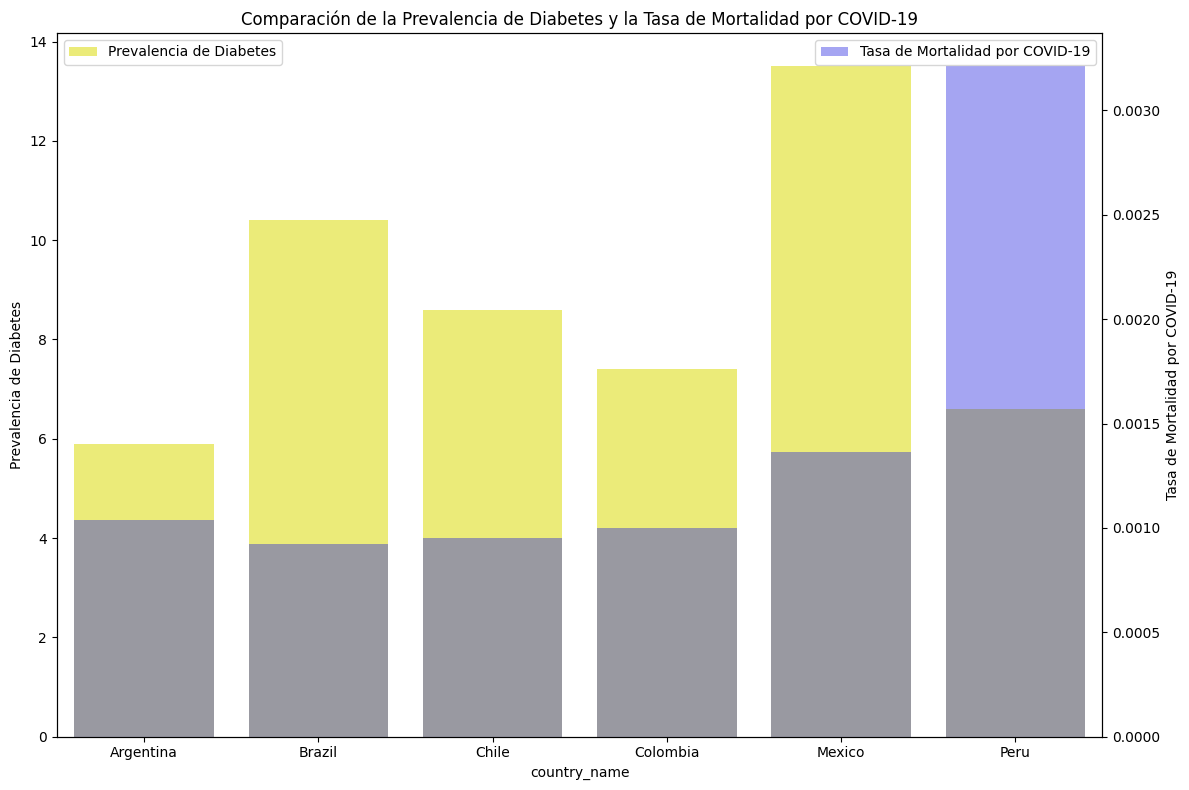

In [ ]:
# Grafico de barras apiladas
dataPaisesLatinoamericaUnicos = dataPaisesLatinoamerica.drop_duplicates(subset='country_name')
fig, ax = plt.subplots(1, 1, figsize = (12, 8))

sns.barplot(data = dataPaisesLatinoamericaUnicos,
            x =  dataPaisesLatinoamericaUnicos['country_name'],
            y =  dataPaisesLatinoamericaUnicos['diabetes_prevalence'],
            color = 'yellow',
            label = 'Prevalencia de Diabetes',
            ax = ax,
            alpha = 0.6
)

ax2 = ax.twinx()

sns.barplot(data = dataPaisesLatinoamericaUnicos,
            x =  dataPaisesLatinoamericaUnicos['country_name'],
            y =  dataPaisesLatinoamericaUnicos['cumulative_deceased'] / dataPaisesLatinoamericaUnicos['population'],
            color = 'Blue',
            label = 'Tasa de Mortalidad por COVID-19',
            ax = ax2,
            alpha = 0.4)

plt.xticks(rotation = 90)
ax.set_ylabel('Prevalencia de Diabetes')
ax.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')
ax2.set_ylabel('Tasa de Mortalidad por COVID-19')
plt.title('Comparación de la Prevalencia de Diabetes y la Tasa de Mortalidad por COVID-19')
plt.tight_layout()
plt.show()

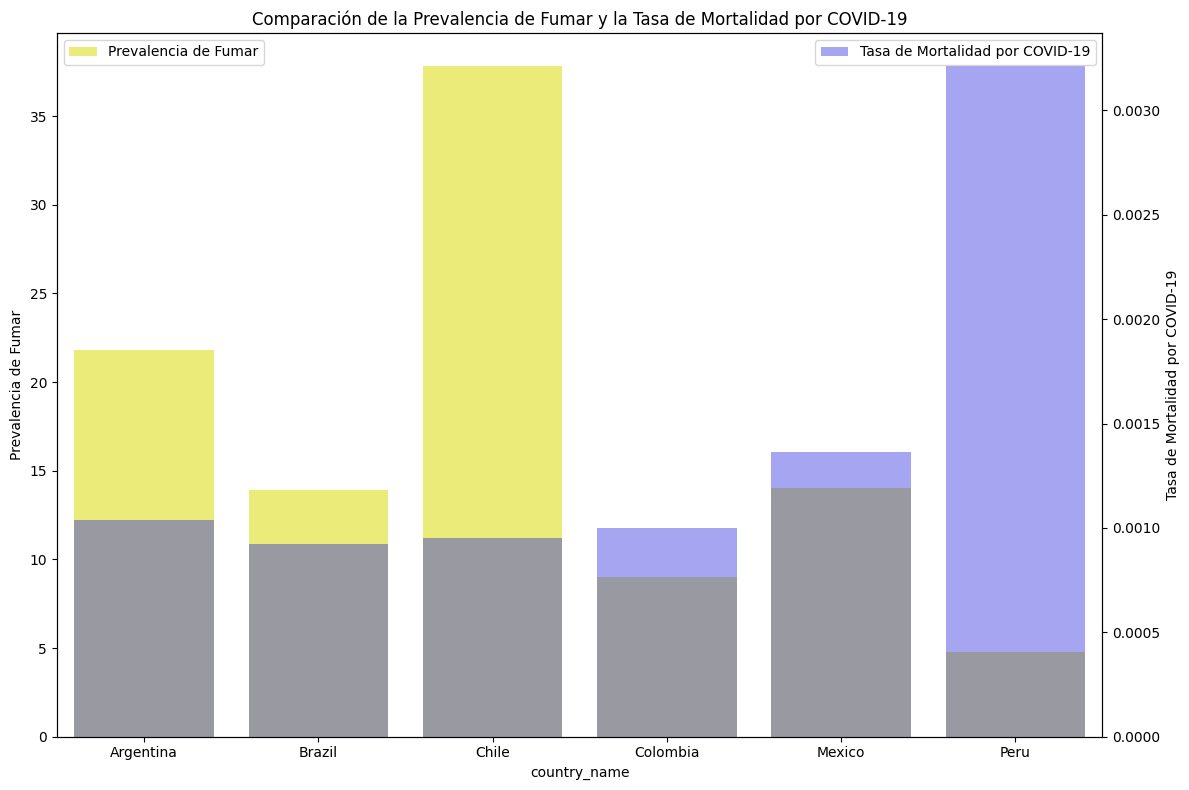

In [29]:
dataPaisesLatinoamericaUnicos = dataPaisesLatinoamerica.drop_duplicates(subset='country_name')
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

sns.barplot(data = dataPaisesLatinoamericaUnicos,
            x =  dataPaisesLatinoamericaUnicos['country_name'],
            y =  dataPaisesLatinoamericaUnicos['smoking_prevalence'],
            color = 'yellow',
            label = 'Prevalencia de Fumar',
            ax = ax,
            alpha = 0.6)

ax2 = ax.twinx()

sns.barplot(data = dataPaisesLatinoamericaUnicos,
            x =  dataPaisesLatinoamericaUnicos['country_name'],
            y =  dataPaisesLatinoamericaUnicos['cumulative_deceased'] / dataPaisesLatinoamericaUnicos['population'],
            color = 'Blue',
            label = 'Tasa de Mortalidad por COVID-19',
            ax = ax2,
            alpha = 0.4)

plt.xticks(rotation = 90)
ax.set_ylabel('Prevalencia de Fumar')
ax2.set_ylabel('Tasa de Mortalidad por COVID-19')
ax.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')
plt.title('Comparación de la Prevalencia de Fumar y la Tasa de Mortalidad por COVID-19')
plt.tight_layout()
plt.show()

## Avance 3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
dataPaisesLatinoamerica = pd.read_csv("DatosFiltradosFinal.csv", sep = ",")
dataPaisesLatinoamerica.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3744 entries, 0 to 3743
Data columns (total 66 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   location_key                           3744 non-null   object 
 1   country_code                           3744 non-null   object 
 2   country_name                           3744 non-null   object 
 3   new_confirmed                          3744 non-null   float64
 4   new_deceased                           3744 non-null   float64
 5   cumulative_confirmed                   3744 non-null   float64
 6   cumulative_deceased                    3744 non-null   float64
 7   cumulative_vaccine_doses_administered  3744 non-null   float64
 8   population                             3744 non-null   float64
 9   population_male                        3744 non-null   float64
 10  population_female                      3744 non-null   float64
 11  popu

In [ ]:
dataPaisesLatinoamerica

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina        7767.00   
2021-01-03           AR           AR    Argentina        4934.00   
2021-01-04           AR           AR    Argentina       13953.00   
2021-01-05           AR           AR    Argentina       14085.00   
2021-01-06           AR           AR    Argentina       14496.00   
...                 ...          ...          ...            ...   
2022-09-13           PE           PE         Peru        1150.00   
2022-09-14           PE           PE         Peru       12911.39   
2022-09-15           PE           PE         Peru       12911.39   
2022-09-16           PE           PE         Peru       12911.39   
2022-09-17           PE           PE         Peru       12911.39   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02        166.00            1670634.00             46688.00   
2021-01-03        157.00            1675568.00             46845.00   
2021-01-04        157.00            1689521.00             47002.00   
2021-01-05        160.00            1703606.00             47162.00   
2021-01-06        131.00            1718102.00             47293.00   
...                  ...                   ...                  ...   
2022-09-13         22.00            4127612.00            216173.00   
2022-09-14        134.38            6079578.72            105716.12   
2022-09-15        134.38            6079578.72            105716.12   
2022-09-16        134.38            6079578.72            105716.12   
2022-09-17        134.38            6079578.72            105716.12   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                               20334.00 44938712.00   
2021-01-03                               20529.00 44938712.00   
2021-01-04                               25164.00 44938712.00   
2021-01-05                               29852.00 44938712.00   
2021-01-06                               34162.00 44938712.00   
...                                           ...         ...   
2022-09-13                                   0.00 29381884.00   
2022-09-14                                   0.00 29381884.00   
2022-09-15                                   0.00 29381884.00   
2022-09-16                                   0.00 29381884.00   
2022-09-17                                   0.00 29381884.00   

            population_male  ...  cumulative_recovered  population_age_00_19  \
date                         ...                                               
2021-01-02      19523766.00  ...                  0.00           13764384.00   
2021-01-03      19523766.00  ...                  0.00           13764384.00   
2021-01-04      19523766.00  ...                  0.00           13764384.00   
2021-01-05      19523766.00  ...                  0.00           13764384.00   
2021-01-06      19523766.00  ...                  0.00           13764384.00   
...                     ...  ...                   ...                   ...   
2022-09-13      14450757.00  ...                  0.00           10176529.00   
2022-09-14      14450757.00  ...                  0.00           10176529.00   
2022-09-15      14450757.00  ...                  0.00           10176529.00   
2022-09-16      14450757.00  ...                  0.00           10176529.00   
2022-09-17      14450757.00  ...                  0.00           10176529.00   

            population_age_20_39  population_age_40_59  population_age_60_79  \
date                                                                           
2021-01-02           12207806.00            8419068.00            4731808.00   
2021-01-03           12207806.00            8419068.00            4731808.0

In [31]:
paisesSeleccionados = ["Argentina", "Chile", "Colombia", "Mexico", "Peru", "Brazil"]

In [ ]:
# cree la columna semana para obtener el numero de la semana del año ya que la necesito para calcular los casos por semana
dataPaisesLatinoamerica["week"] = dataPaisesLatinoamerica.index.isocalendar().week
dataPaisesLatinoamerica

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina        7767.00   
2021-01-03           AR           AR    Argentina        4934.00   
2021-01-04           AR           AR    Argentina       13953.00   
2021-01-05           AR           AR    Argentina       14085.00   
2021-01-06           AR           AR    Argentina       14496.00   
...                 ...          ...          ...            ...   
2022-09-13           PE           PE         Peru        1150.00   
2022-09-14           PE           PE         Peru       12911.39   
2022-09-15           PE           PE         Peru       12911.39   
2022-09-16           PE           PE         Peru       12911.39   
2022-09-17           PE           PE         Peru       12911.39   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02        166.00            1670634.00             46688.00   
2021-01-03        157.00            1675568.00             46845.00   
2021-01-04        157.00            1689521.00             47002.00   
2021-01-05        160.00            1703606.00             47162.00   
2021-01-06        131.00            1718102.00             47293.00   
...                  ...                   ...                  ...   
2022-09-13         22.00            4127612.00            216173.00   
2022-09-14        134.38            6079578.72            105716.12   
2022-09-15        134.38            6079578.72            105716.12   
2022-09-16        134.38            6079578.72            105716.12   
2022-09-17        134.38            6079578.72            105716.12   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                               20334.00 44938712.00   
2021-01-03                               20529.00 44938712.00   
2021-01-04                               25164.00 44938712.00   
2021-01-05                               29852.00 44938712.00   
2021-01-06                               34162.00 44938712.00   
...                                           ...         ...   
2022-09-13                                   0.00 29381884.00   
2022-09-14                                   0.00 29381884.00   
2022-09-15                                   0.00 29381884.00   
2022-09-16                                   0.00 29381884.00   
2022-09-17                                   0.00 29381884.00   

            population_male  ...  population_age_00_19  population_age_20_39  \
date                         ...                                               
2021-01-02      19523766.00  ...           13764384.00           12207806.00   
2021-01-03      19523766.00  ...           13764384.00           12207806.00   
2021-01-04      19523766.00  ...           13764384.00           12207806.00   
2021-01-05      19523766.00  ...           13764384.00           12207806.00   
2021-01-06      19523766.00  ...           13764384.00           12207806.00   
...                     ...  ...                   ...                   ...   
2022-09-13      14450757.00  ...           10176529.00            9274833.00   
2022-09-14      14450757.00  ...           10176529.00            9274833.00   
2022-09-15      14450757.00  ...           10176529.00            9274833.00   
2022-09-16      14450757.00  ...           10176529.00            9274833.00   
2022-09-17      14450757.00  ...           10176529.00            9274833.00   

            population_age_40_59  population_age_60_79  \
date                                                     
2021-01-02            8419068.00            4731808.00   
2021-01-03            8419068.00            4731808.00   
2021-01-04            8419068.00            4731808.00   
2021-01-05            841

In [ ]:
# Realice una mascara para quedarme solo con el año 2021
dataPaisesLatinoamerica2021 = dataPaisesLatinoamerica.loc[
    (dataPaisesLatinoamerica.index >= "2021-01-01") &
    (dataPaisesLatinoamerica.index <= "2021-12-31")
]
dataPaisesLatinoamerica2021


location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina        7767.00   
2021-01-03           AR           AR    Argentina        4934.00   
2021-01-04           AR           AR    Argentina       13953.00   
2021-01-05           AR           AR    Argentina       14085.00   
2021-01-06           AR           AR    Argentina       14496.00   
...                 ...          ...          ...            ...   
2021-12-27           PE           PE         Peru        3261.00   
2021-12-28           PE           PE         Peru        4270.00   
2021-12-29           PE           PE         Peru        4340.00   
2021-12-30           PE           PE         Peru        5220.00   
2021-12-31           PE           PE         Peru        4290.00   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02        166.00            1670634.00             46688.00   
2021-01-03        157.00            1675568.00             46845.00   
2021-01-04        157.00            1689521.00             47002.00   
2021-01-05        160.00            1703606.00             47162.00   
2021-01-06        131.00            1718102.00             47293.00   
...                  ...                   ...                  ...   
2021-12-27         29.00            2285854.00            202515.00   
2021-12-28         37.00            2290124.00            202552.00   
2021-12-29         40.00            2294464.00            202592.00   
2021-12-30         45.00            2299684.00            202637.00   
2021-12-31         37.00            2303974.00            202674.00   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                               20334.00 44938712.00   
2021-01-03                               20529.00 44938712.00   
2021-01-04                               25164.00 44938712.00   
2021-01-05                               29852.00 44938712.00   
2021-01-06                               34162.00 44938712.00   
...                                           ...         ...   
2021-12-27                            50186253.00 29381884.00   
2021-12-28                            50515554.00 29381884.00   
2021-12-29                            50800766.00 29381884.00   
2021-12-30                            51020490.00 29381884.00   
2021-12-31                            51092425.00 29381884.00   

            population_male  ...  population_age_00_19  population_age_20_39  \
date                         ...                                               
2021-01-02      19523766.00  ...           13764384.00           12207806.00   
2021-01-03      19523766.00  ...           13764384.00           12207806.00   
2021-01-04      19523766.00  ...           13764384.00           12207806.00   
2021-01-05      19523766.00  ...           13764384.00           12207806.00   
2021-01-06      19523766.00  ...           13764384.00           12207806.00   
...                     ...  ...                   ...                   ...   
2021-12-27      14450757.00  ...           10176529.00            9274833.00   
2021-12-28      14450757.00  ...           10176529.00            9274833.00   
2021-12-29      14450757.00  ...           10176529.00            9274833.00   
2021-12-30      14450757.00  ...           10176529.00            9274833.00   
2021-12-31      14450757.00  ...           10176529.00            9274833.00   

            population_age_40_59  population_age_60_79  \
date                                                     
2021-01-02            8419068.00            4731808.00   
2021-01-03            8419068.00            4731808.00   
2021-01-04            8419068.00            4731808.00   
2021-01-05            841

In [ ]:
# Sume los casos semanales de nuevos confirmados y fallecidos y reseteo el indice para que sea numerico nuevamente
casosSemanales = dataPaisesLatinoamerica2021.groupby(["country_name", "week"])[["new_confirmed", "new_deceased"]].sum().reset_index()
casosSemanales

country_name  week  new_confirmed  new_deceased
0      Argentina     1       85321.00       1093.00
1      Argentina     2       76129.00       1191.00
2      Argentina     3       66250.00       1321.00
3      Argentina     4       58524.00       1199.00
4      Argentina     5       50576.00       1112.00
..           ...   ...            ...           ...
313         Peru    49       10004.00        272.00
314         Peru    50       10637.00        265.00
315         Peru    51       11306.00        257.00
316         Peru    52       21381.00        188.00
317         Peru    53        3355.00        374.00

[318 rows x 4 columns]

In [35]:
casosSemanales["country_name"].unique()

array(['Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Peru'],
      dtype=object)

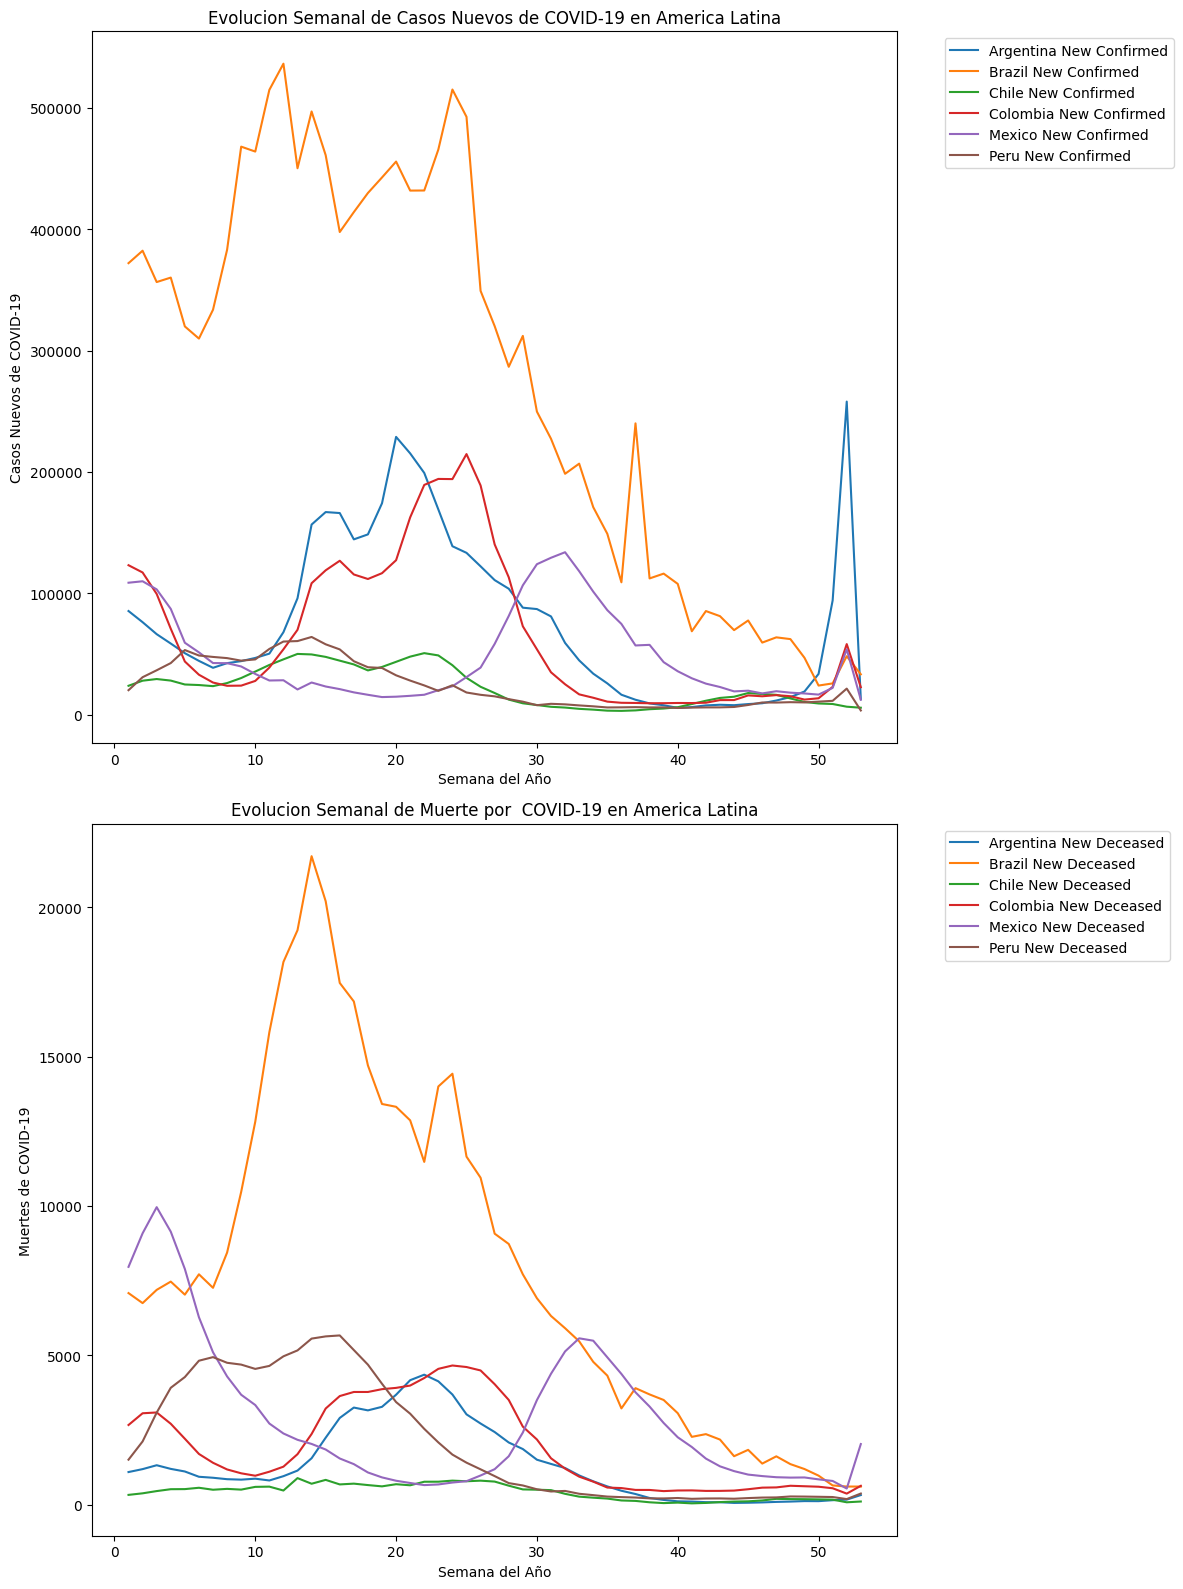

In [36]:
casosSemanales = dataPaisesLatinoamerica2021.groupby(["country_name", "week"])[["new_confirmed", "new_deceased"]].sum().reset_index()

fig, ax = plt.subplots(ncols = 1, nrows = 2, figsize = (12, 16))

for pais in casosSemanales["country_name"].unique():
    casosSemanalesPorPais = casosSemanales[casosSemanales["country_name"] == pais]
    ax[0].plot(casosSemanalesPorPais["week"], casosSemanalesPorPais["new_confirmed"], label = f"{pais} New Confirmed")
    ax[1].plot(casosSemanalesPorPais["week"], casosSemanalesPorPais["new_deceased"], label = f"{pais} New Deceased")

ax[0].set_xlabel("Semana del Año")
ax[0].set_ylabel("Casos Nuevos de COVID-19")
ax[0].set_title("Evolucion Semanal de Casos Nuevos de COVID-19 en America Latina")
ax[0].legend(bbox_to_anchor = (1.05, 1), loc = "upper left")

ax[1].set_xlabel("Semana del Año")
ax[1].set_ylabel("Muertes de COVID-19")
ax[1].set_title("Evolucion Semanal de Muerte por  COVID-19 en America Latina")
ax[1].legend(bbox_to_anchor = (1.05, 1), loc = "upper left")

plt.tight_layout()
plt.show()

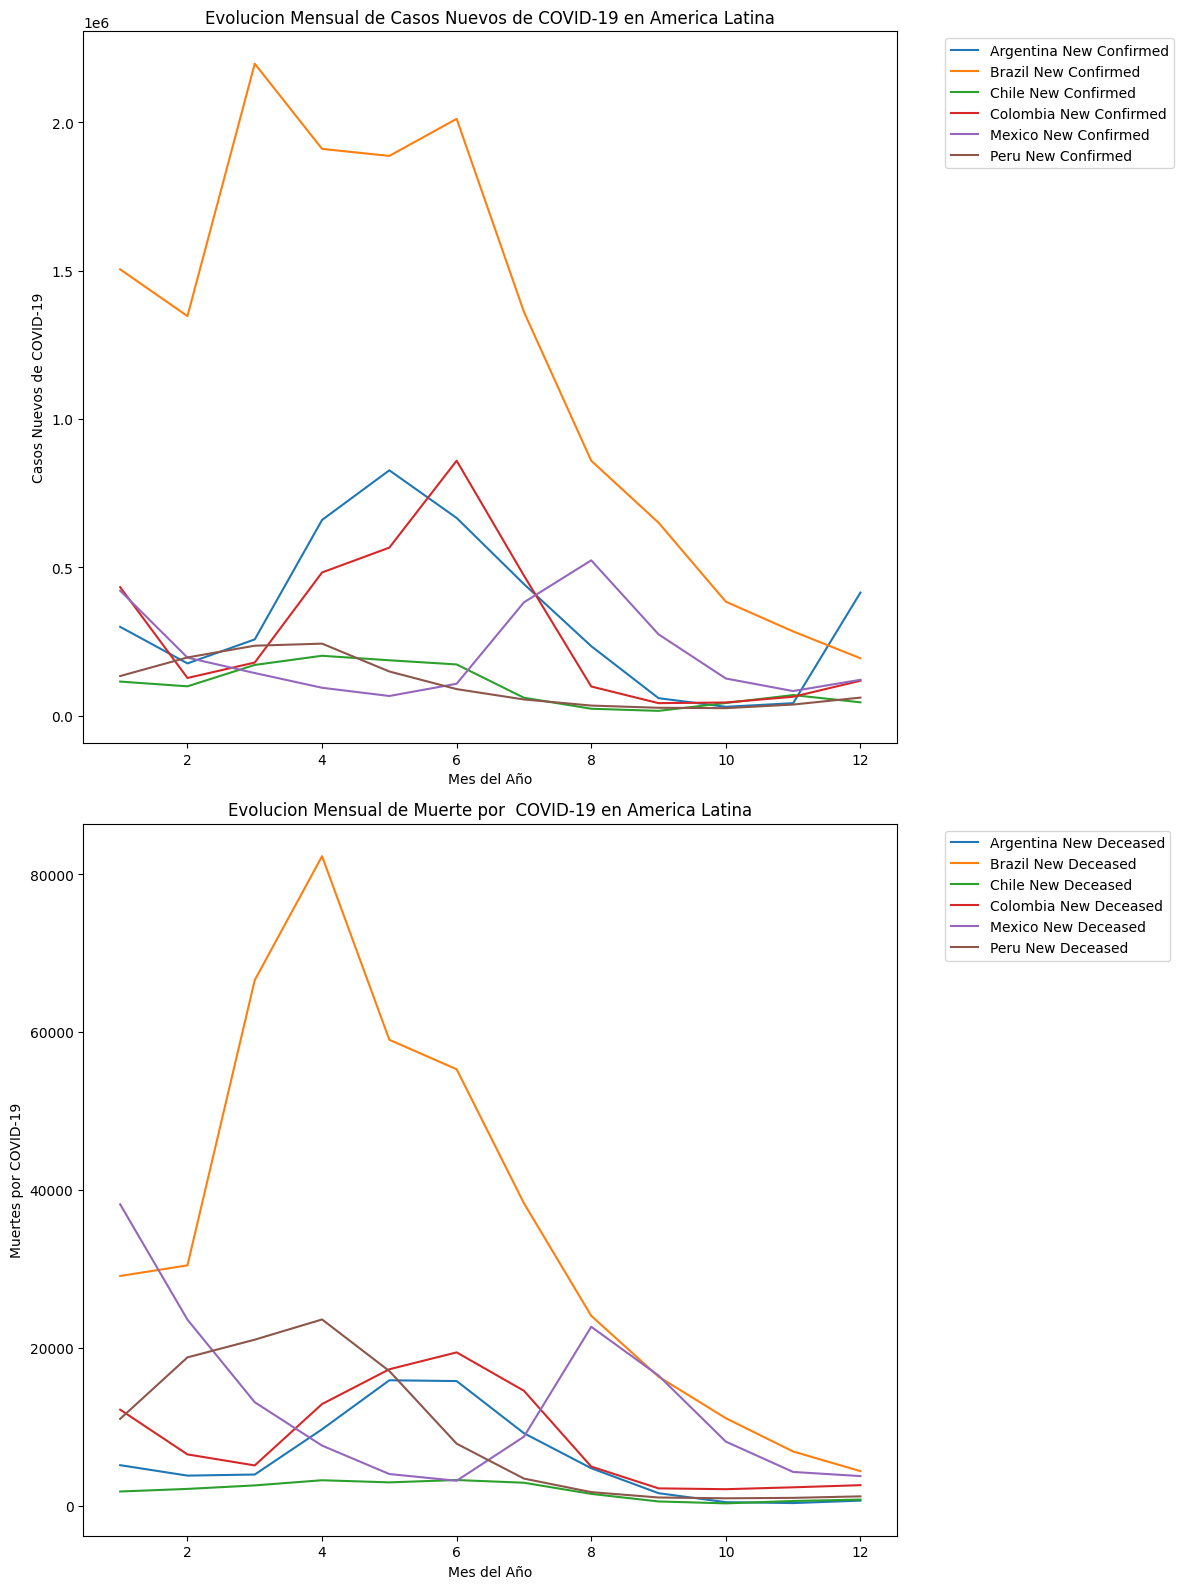

In [37]:
dataPaisesLatinoamerica2021["month"] = dataPaisesLatinoamerica2021.index.month
casosMensuales = dataPaisesLatinoamerica2021.groupby(["country_name", "month",])[["new_confirmed", "new_deceased"]].sum().reset_index()

fig, ax = plt.subplots(ncols = 1, nrows = 2, figsize = (12, 16))

for pais in casosMensuales["country_name"].unique():
    casosMensualesPorPais = casosMensuales[casosMensuales["country_name"] == pais]
    ax[0].plot(casosMensualesPorPais["month"], casosMensualesPorPais["new_confirmed"], label = f"{pais} New Confirmed")
    ax[1].plot(casosMensualesPorPais["month"], casosMensualesPorPais["new_deceased"], label = f"{pais} New Deceased")

ax[0].set_xlabel("Mes del Año")
ax[0].set_ylabel("Casos Nuevos de COVID-19")
ax[0].set_title("Evolucion Mensual de Casos Nuevos de COVID-19 en America Latina")
ax[0].legend(bbox_to_anchor = (1.05, 1), loc = "upper left")

ax[1].set_xlabel("Mes del Año")
ax[1].set_ylabel("Muertes por COVID-19")
ax[1].set_title("Evolucion Mensual de Muerte por  COVID-19 en America Latina")
ax[1].legend(bbox_to_anchor = (1.05, 1), loc = "upper left")

plt.tight_layout()
plt.show()

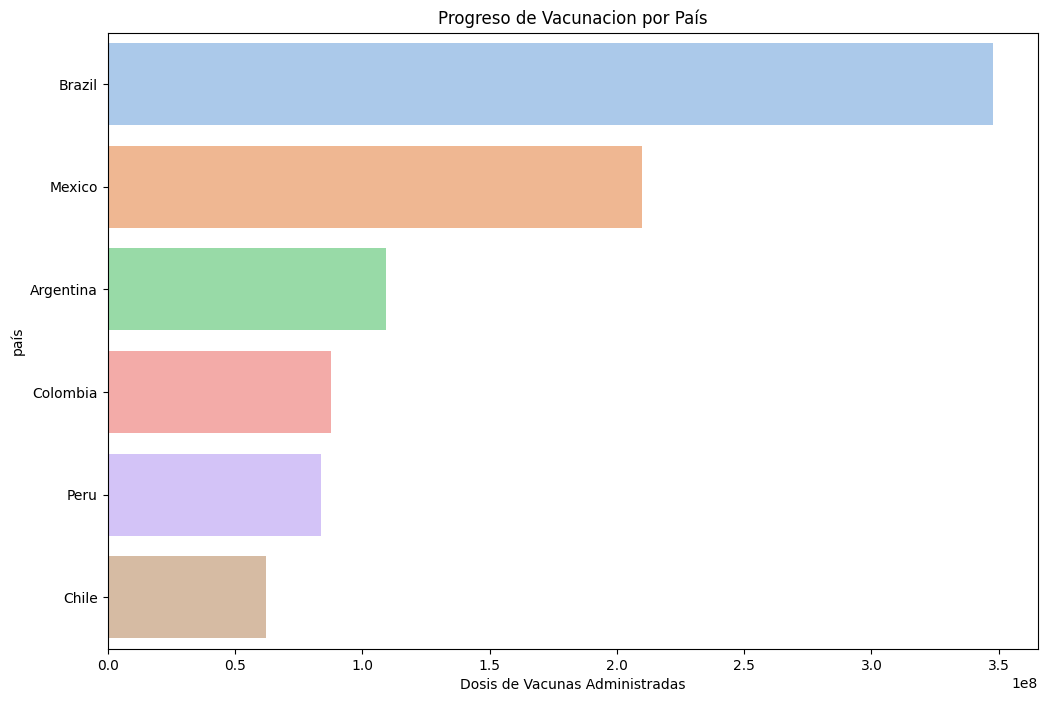

In [38]:
#País con mas docis acumuladas
vacunasAdministradas = dataPaisesLatinoamerica.groupby("country_name")["cumulative_vaccine_doses_administered"].max().sort_values(ascending = False)

plt.figure(figsize = (12, 8))
sns.barplot(x = vacunasAdministradas.values, y = vacunasAdministradas.index, hue = vacunasAdministradas.index, palette = "pastel")
plt.xlabel("Dosis de Vacunas Administradas")
plt.ylabel("país")
plt.title("Progreso de Vacunacion por País")

plt.show()

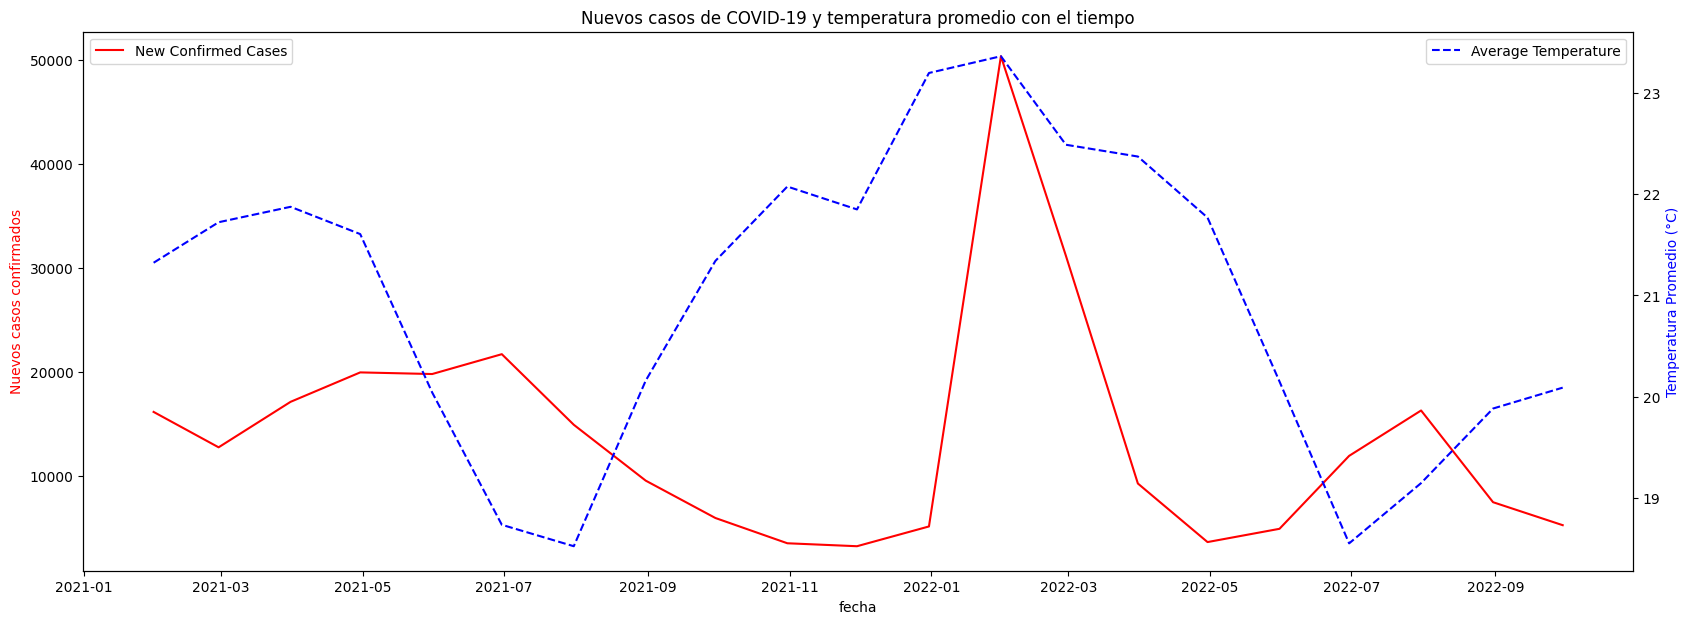

In [39]:
#Nuevos casos y temperatura promedio
#Grafique la relacion entre la temperatura promedio y los nuevos casos confirmados de COVID-19 (1:42min)

plt.figure(figsize = (20, 7))
ax1 = plt.gca()
ax2 = ax1.twinx() #Se crea un segundo eje ax2 que comparte el mismo eje que ax1 
ax1.plot(dataPaisesLatinoamerica.resample("ME").mean(numeric_only = True).index, dataPaisesLatinoamerica.resample("ME").mean(numeric_only = True)["new_confirmed"], color = "red", label = "New Confirmed Cases")
ax2.plot(dataPaisesLatinoamerica.resample("ME").mean(numeric_only = True).index, dataPaisesLatinoamerica.resample("ME").mean(numeric_only = True)["average_temperature_celsius"], color = "blue", label = "Average Temperature", linestyle = "--")

ax1.set_xlabel("fecha")
ax1.set_ylabel("Nuevos casos confirmados", color = "red")
ax2.set_ylabel("Temperatura Promedio (°C)", color = "blue")
plt.title("Nuevos casos de COVID-19 y temperatura promedio con el tiempo")
ax1.legend(loc = "upper left")
ax2.legend(loc = "upper right")

plt.show()


In [31]:
pd.set_option("display.float", "{:.2f}".format)

In [40]:
dataPaisesLatinoamerica[["population", "population_urban", "cumulative_confirmed"]]

population  population_urban  cumulative_confirmed
date                                                          
2021-01-02 44938712.00       41339571.00            1670634.00
2021-01-03 44938712.00       41339571.00            1675568.00
2021-01-04 44938712.00       41339571.00            1689521.00
2021-01-05 44938712.00       41339571.00            1703606.00
2021-01-06 44938712.00       41339571.00            1718102.00
...                ...               ...                   ...
2022-09-13 29381884.00       25390339.00            4127612.00
2022-09-14 29381884.00       25390339.00            6079578.72
2022-09-15 29381884.00       25390339.00            6079578.72
2022-09-16 29381884.00       25390339.00            6079578.72
2022-09-17 29381884.00       25390339.00            6079578.72

[3744 rows x 3 columns]

In [41]:
#impacto de la urbanizacion en la propagacion  del COVID-19
dataPaisesLatinoamerica["urban_population_percentage"] =  dataPaisesLatinoamerica["population_urban"]/dataPaisesLatinoamerica["population"]
dataPaisesLatinoamerica["confirmed_population_percentage"] =  dataPaisesLatinoamerica["cumulative_confirmed"]/dataPaisesLatinoamerica["population"]
casosUrbanos = dataPaisesLatinoamerica.groupby("country_name").last().sort_values(by = "urban_population_percentage")
casosUrbanos


location_key country_code  new_confirmed  new_deceased  \
country_name                                                          
Colombia               CO           CO       12911.39        134.38   
Brazil                 BR           BR       12911.39        134.38   
Peru                   PE           PE       12911.39        134.38   
Argentina              AR           AR       12911.39        134.38   
Mexico                 MX           MX       12911.39        134.38   
Chile                  CL           CL       12911.39        134.38   

              cumulative_confirmed  cumulative_deceased  \
country_name                                              
Colombia                6079578.72            105716.12   
Brazil                  6079578.72            105716.12   
Peru                    6079578.72            105716.12   
Argentina               6079578.72            105716.12   
Mexico                  6079578.72            105716.12   
Chile                   6079578.72            105716.12   

              cumulative_vaccine_doses_administered   population  \
country_name                                                       
Colombia                                       0.00  50882884.00   
Brazil                                         0.00 212559409.00   
Peru                                           0.00  29381884.00   
Argentina                                      0.00  44938712.00   
Mexico                                         0.00 110991953.00   
Chile                                          0.00  17574003.00   

              population_male  population_female  ...  population_age_40_59  \
country_name                                      ...                         
Colombia          24984564.00        25898320.00  ...           11994767.00   
Brazil           104435783.00       108123626.00  ...           53883208.00   
Peru              14450757.00        14931127.00  ...            6432946.00   
Argentina         19523766.00        20593330.00  ...            8419068.00   
Mexico            54855231.00        57481307.00  ...           21897612.00   
Chile              8972014.00         8601989.00  ...            4930675.00   

              population_age_60_79  population_age_00_19_vacunados  \
country_name                                                         
Colombia                5751119.00                               0   
Brazil                 25698413.00                               0   
Peru                    2924473.00                               0   
Argentina               4731808.00                               0   
Mexico                  8553148.00                               0   
Chile                   2784913.00                               0   

              population_age_20_39_vacunados  population_age_40_59_vacunados  \
country_name                                                                   
Colombia                                   0                               0   
Brazil                                     0                               0   
Peru                                       0                               0   
Argentina                                  0                               0   
Mexico                                     0                               0   
Chile                                      0                               0   

              population_age_60_79_vacunados  \
country_name                                   
Colombia                                   0   
Brazil                                     0   
Peru                                       0   
Argentina                                  0   
Mexico                                     0   
Chile                                      0   

              population_age_80_and_older_vacunados  week  \
country_name                                                
Colombia                                          0    37   
Brazil                 

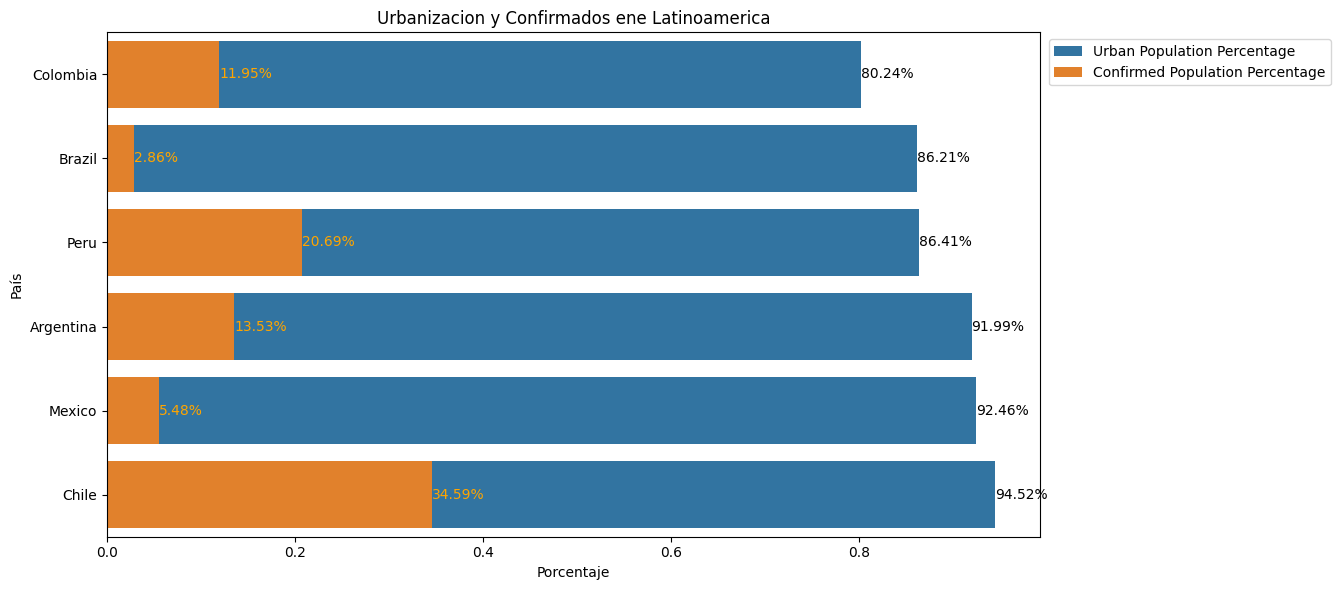

In [42]:
#impacto de la urbanizacion en la propagacion  del COVID-19
dataPaisesLatinoamerica["urban_population_percentage"] =  dataPaisesLatinoamerica["population_urban"]/dataPaisesLatinoamerica["population"]
dataPaisesLatinoamerica["confirmed_population_percentage"] =  dataPaisesLatinoamerica["cumulative_confirmed"]/dataPaisesLatinoamerica["population"]
casosUrbanos = dataPaisesLatinoamerica.groupby("country_name").last().sort_values(by = "urban_population_percentage")

plt.figure(figsize = (14, 6))
ax = sns.barplot(x = "urban_population_percentage", y = casosUrbanos.index, data =casosUrbanos , label = "Urban Population Percentage")

#Añadir etiquetas a cada barra  para Urban_Population _Percentage
for index , value in enumerate(casosUrbanos["urban_population_percentage"]):
    ax.text(value, index, f'{value*100:.2f}%', color = "black", ha = "left", va = "center" )

#Superponer la segunda barra para confirmed_population_percentage
ax2 = sns.barplot(x = "confirmed_population_percentage", y = casosUrbanos.index, data = casosUrbanos, label = "Confirmed Population Percentage")

#Añadir etiquetas a cada barra para confirmed_population_percentage
for index , value in enumerate(casosUrbanos["confirmed_population_percentage"]):
    ax2.text(value, index, f'{value*100:.2f}%', color = "orange", ha = "left", va = "center" )

plt.xlabel("Porcentaje")
plt.ylabel("País")
plt.title("Urbanizacion y Confirmados ene Latinoamerica")
plt.legend(bbox_to_anchor = (1.32, 1), loc = "upper right")
plt.tight_layout()
plt.show()



In [43]:
#Densidad de poblacion por grupos de edad
dataPaisesLatinoamerica["deceased_percentage"] = dataPaisesLatinoamerica["cumulative_deceased"]/dataPaisesLatinoamerica["population"]
dataPaisesLatinoamerica

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina        7767.00   
2021-01-03           AR           AR    Argentina        4934.00   
2021-01-04           AR           AR    Argentina       13953.00   
2021-01-05           AR           AR    Argentina       14085.00   
2021-01-06           AR           AR    Argentina       14496.00   
...                 ...          ...          ...            ...   
2022-09-13           PE           PE         Peru        1150.00   
2022-09-14           PE           PE         Peru       12911.39   
2022-09-15           PE           PE         Peru       12911.39   
2022-09-16           PE           PE         Peru       12911.39   
2022-09-17           PE           PE         Peru       12911.39   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02        166.00            1670634.00             46688.00   
2021-01-03        157.00            1675568.00             46845.00   
2021-01-04        157.00            1689521.00             47002.00   
2021-01-05        160.00            1703606.00             47162.00   
2021-01-06        131.00            1718102.00             47293.00   
...                  ...                   ...                  ...   
2022-09-13         22.00            4127612.00            216173.00   
2022-09-14        134.38            6079578.72            105716.12   
2022-09-15        134.38            6079578.72            105716.12   
2022-09-16        134.38            6079578.72            105716.12   
2022-09-17        134.38            6079578.72            105716.12   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                               20334.00 44938712.00   
2021-01-03                               20529.00 44938712.00   
2021-01-04                               25164.00 44938712.00   
2021-01-05                               29852.00 44938712.00   
2021-01-06                               34162.00 44938712.00   
...                                           ...         ...   
2022-09-13                                   0.00 29381884.00   
2022-09-14                                   0.00 29381884.00   
2022-09-15                                   0.00 29381884.00   
2022-09-16                                   0.00 29381884.00   
2022-09-17                                   0.00 29381884.00   

            population_male  ...  population_age_60_79  \
date                         ...                         
2021-01-02      19523766.00  ...            4731808.00   
2021-01-03      19523766.00  ...            4731808.00   
2021-01-04      19523766.00  ...            4731808.00   
2021-01-05      19523766.00  ...            4731808.00   
2021-01-06      19523766.00  ...            4731808.00   
...                     ...  ...                   ...   
2022-09-13      14450757.00  ...            2924473.00   
2022-09-14      14450757.00  ...            2924473.00   
2022-09-15      14450757.00  ...            2924473.00   
2022-09-16      14450757.00  ...            2924473.00   
2022-09-17      14450757.00  ...            2924473.00   

            population_age_00_19_vacunados  population_age_20_39_vacunados  \
date                                                                         
2021-01-02                            6228                            5523   
2021-01-03                            6287                            5576   
2021-01-04                            7707                            6835   
2021-01-05                            9143                            8109   
2021-01-06                           10463                            9280   
...                                    ...             

In [44]:
#Paises por orden con mayor tasa demortalidad
promedioMuertesPaís = dataPaisesLatinoamerica.groupby("country_name")["deceased_percentage"].max().sort_values(ascending = False).head(5).index
promedioMuertesPaís

Index(['Peru', 'Chile', 'Brazil', 'Colombia', 'Argentina'], dtype='object', name='country_name')

In [45]:
dataPaisesLatinoamerica.columns

Index(['location_key', 'country_code', 'country_name', 'new_confirmed',
       'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_vaccine_doses_administered', 'population',
       'population_male', 'population_female', 'population_rural',
       'population_urban', 'population_density', 'human_development_index',
       'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd',
       'latitude', 'longitude', 'area_sq_km', 'smoking_prevalence',
       'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000',
       'physicians_per_1000', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 'population_largest_city',
       'area_rural_sq_km', 

In [46]:
gruposPorEdad = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
dataPaisesLatinoamerica[gruposPorEdad]

population_age_00_09  population_age_10_19  population_age_20_29  \
date                                                                           
2021-01-02            6718871.00            7045513.00            6430658.00   
2021-01-03            6718871.00            7045513.00            6430658.00   
2021-01-04            6718871.00            7045513.00            6430658.00   
2021-01-05            6718871.00            7045513.00            6430658.00   
2021-01-06            6718871.00            7045513.00            6430658.00   
...                          ...                   ...                   ...   
2022-09-13            5140624.00            5035905.00            4895056.00   
2022-09-14            5140624.00            5035905.00            4895056.00   
2022-09-15            5140624.00            5035905.00            4895056.00   
2022-09-16            5140624.00            5035905.00            4895056.00   
2022-09-17            5140624.00            5035905.00            4895056.00   

            population_age_30_39  population_age_40_49  population_age_50_59  \
date                                                                           
2021-01-02            5777148.00            4507125.00            3911943.00   
2021-01-03            5777148.00            4507125.00            3911943.00   
2021-01-04            5777148.00            4507125.00            3911943.00   
2021-01-05            5777148.00            4507125.00            3911943.00   
2021-01-06            5777148.00            4507125.00            3911943.00   
...                          ...                   ...                   ...   
2022-09-13            4379777.00            3660378.00            2772568.00   
2022-09-14            4379777.00            3660378.00            2772568.00   
2022-09-15            4379777.00            3660378.00            2772568.00   
2022-09-16            4379777.00            3660378.00            2772568.00   
2022-09-17            4379777.00            3660378.00            2772568.00   

            population_age_60_69  population_age_70_79  \
date                                                     
2021-01-02            2914251.00            1817557.00   
2021-01-03            2914251.00            1817557.00   
2021-01-04            2914251.00            1817557.00   
2021-01-05            2914251.00            1817557.00   
2021-01-06            2914251.00            1817557.00   
...                          ...                   ...   
2022-09-13            1846407.00            1078066.00   
2022-09-14            1846407.00            1078066.00   
2022-09-15            1846407.00            1078066.00   
2022-09-16            1846407.00            1078066.00   
2022-09-17            1846407.00            1078066.00   

            population_age_80_and_older  
date                                     
2021-01-02                    994030.00  
2021-01-03                    994030.00  
2021-01-04                    994030.00  
2021-01-05                    994030.00  
2021-01-06                    994030.00  
...                                 ...  
2022-09-13                    573103.00  
2022-09-14                    573103.00  
2022-09-15                    573103.00  
2022-09-16                    573103.00  
2022-09-17                    573103.00  

[3744 rows x 9 columns]

In [47]:
distribucionPorEdad = dataPaisesLatinoamerica[dataPaisesLatinoamerica["country_name"].isin(promedioMuertesPaís)].groupby("country_name")[gruposPorEdad].mean()
distribucionPorEdad

population_age_00_09  population_age_10_19  \
country_name                                               
Argentina               6718871.00            7045513.00   
Brazil                 29076910.00           31160446.00   
Chile                   2428079.00            2493879.00   
Colombia                7414155.00            8119876.00   
Peru                    5140624.00            5035905.00   

              population_age_20_29  population_age_30_39  \
country_name                                               
Argentina               6430658.00            5777148.00   
Brazil                 34104643.00           34476762.00   
Chile                   2995538.00            2945404.00   
Colombia                8847061.00            7810299.00   
Peru                    4895056.00            4379777.00   

              population_age_40_49  population_age_50_59  \
country_name                                               
Argentina               4507125.00            3911943.00   
Brazil                 29462006.00           24421202.00   
Chile                   2578404.00            2352271.00   
Colombia                6450787.00            5543980.00   
Peru                    3660378.00            2772568.00   

              population_age_60_69  population_age_70_79  \
country_name                                               
Argentina               2914251.00            1817557.00   
Brazil                 16896862.00            8801551.00   
Chile                   1791787.00             993126.00   
Colombia                3771358.00            1979761.00   
Peru                    1846407.00            1078066.00   

              population_age_80_and_older  
country_name                               
Argentina                       994030.00  
Brazil                         4159027.00  
Chile                           537721.00  
Colombia                        945607.00  
Peru                            573103.00

In [48]:
distribucionEdadArg = distribucionPorEdad[distribucionPorEdad.index=="Argentina"]
distribucionEdadArg

population_age_00_09  population_age_10_19  \
country_name                                               
Argentina               6718871.00            7045513.00   

              population_age_20_29  population_age_30_39  \
country_name                                               
Argentina               6430658.00            5777148.00   

              population_age_40_49  population_age_50_59  \
country_name                                               
Argentina               4507125.00            3911943.00   

              population_age_60_69  population_age_70_79  \
country_name                                               
Argentina               2914251.00            1817557.00   

              population_age_80_and_older  
country_name                               
Argentina                       994030.00

In [49]:
distribucionPorEdad.index.unique()

Index(['Argentina', 'Brazil', 'Chile', 'Colombia', 'Peru'], dtype='object', name='country_name')

In [50]:
distribucionEdadArg.loc["Argentina"]

population_age_00_09          6718871.00
population_age_10_19          7045513.00
population_age_20_29          6430658.00
population_age_30_39          5777148.00
population_age_40_49          4507125.00
population_age_50_59          3911943.00
population_age_60_69          2914251.00
population_age_70_79          1817557.00
population_age_80_and_older    994030.00
Name: Argentina, dtype: float64

In [51]:
distribucionEdadArg.loc["Argentina"].index

Index(['population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older'],
      dtype='object')

In [52]:
distribucionEdadArg.loc["Argentina"].values

array([6718871., 7045513., 6430658., 5777148., 4507125., 3911943.,
       2914251., 1817557.,  994030.])

In [53]:
distribucionEdadArg.index

Index(['Argentina'], dtype='object', name='country_name')

In [54]:
distribucionEdadArg.columns

Index(['population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older'],
      dtype='object')

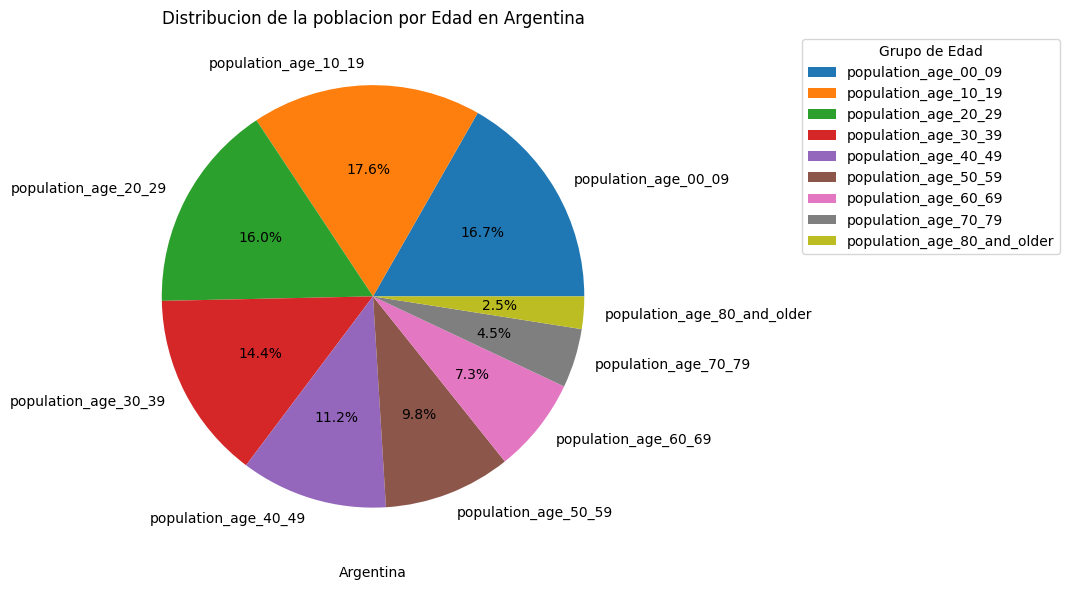

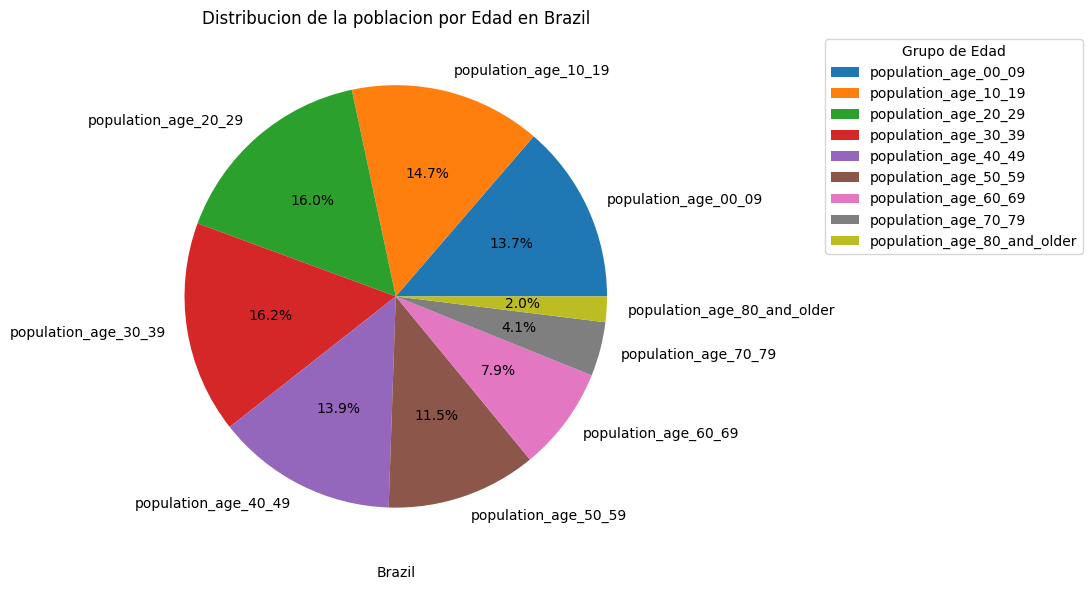

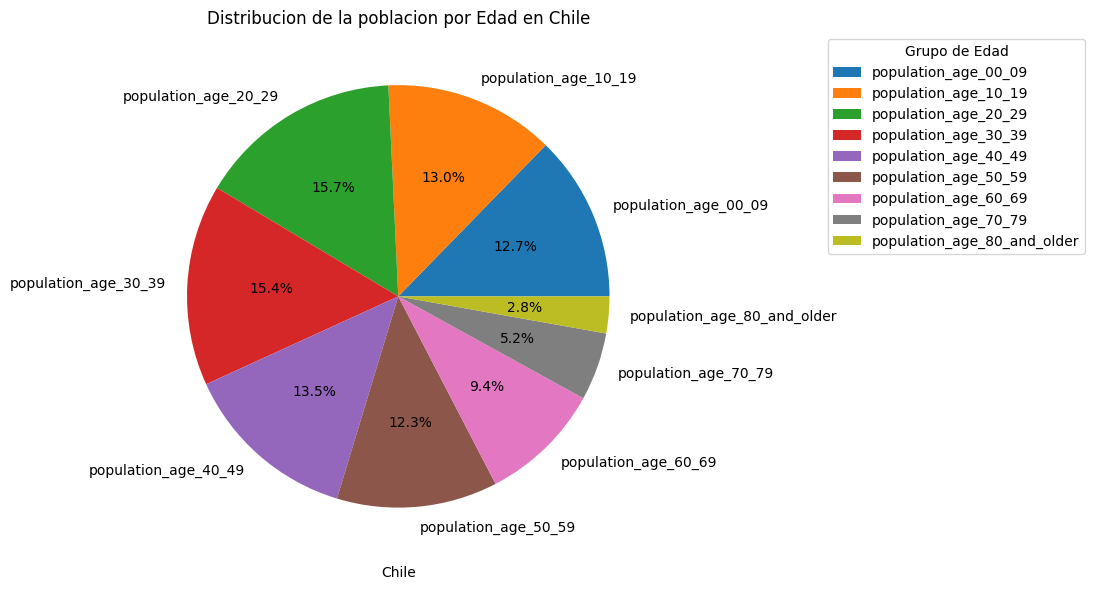

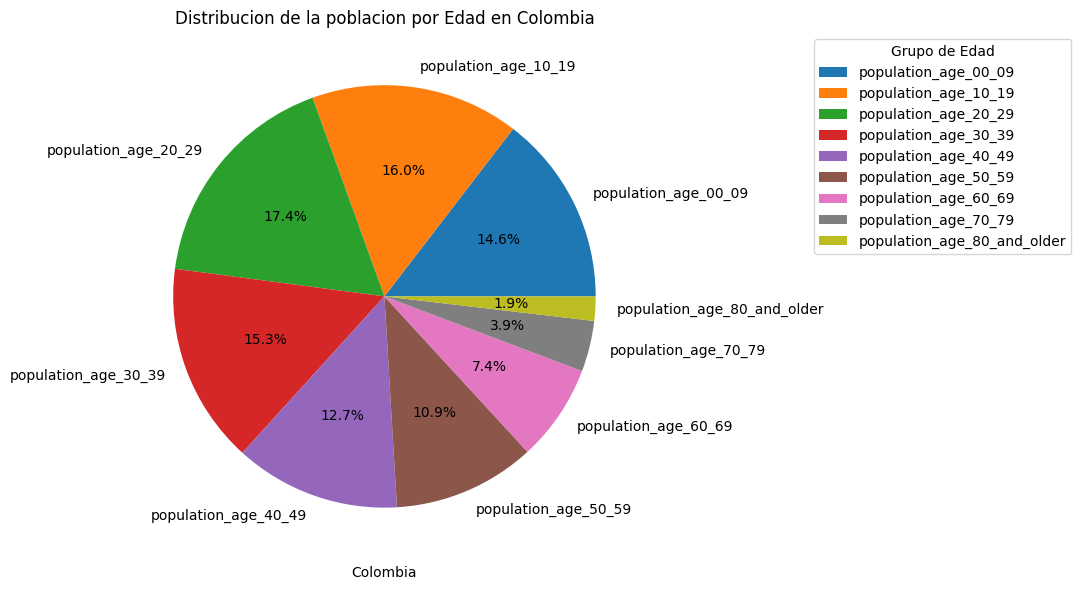

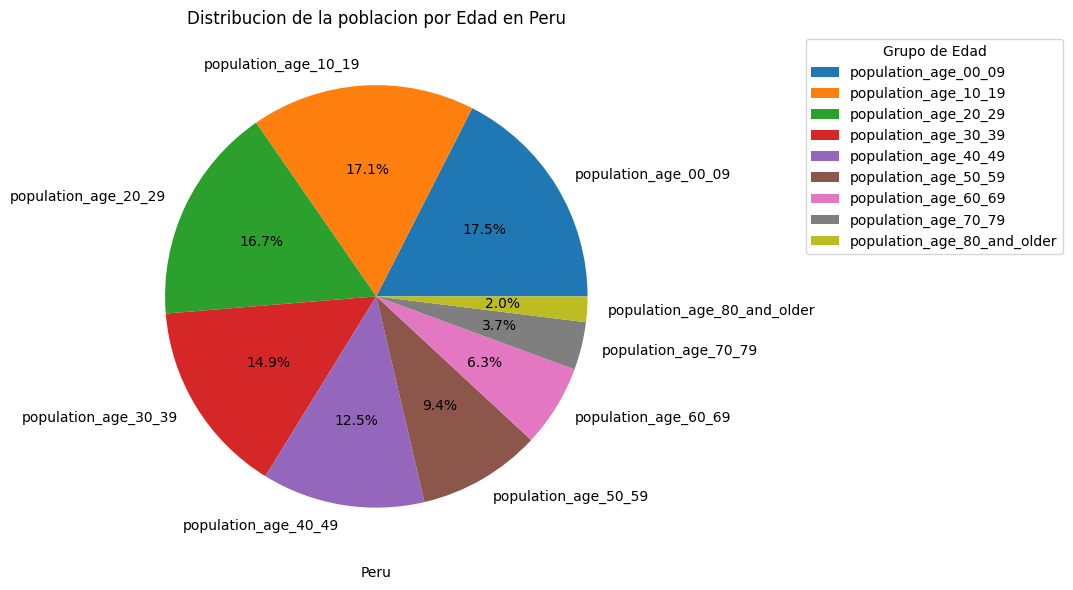

In [55]:
#Densidad de poblacion por grupos de edad 
mortalidadMasAltaPorPaís = dataPaisesLatinoamerica.groupby("country_name")["deceased_percentage"].max().sort_values(ascending = False).head(5).index
gruposPorEdad = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
distribucionPorEdad = dataPaisesLatinoamerica[dataPaisesLatinoamerica["country_name"].isin(mortalidadMasAltaPorPaís)].groupby("country_name")[gruposPorEdad].mean()
paises = distribucionPorEdad.index.unique()


for pais in paises:
    plt.figure(figsize= (12, 6))
    plt.pie(
        distribucionPorEdad.loc[pais].values,
        labels = distribucionPorEdad.loc[pais].index,
        autopct = "%1.1f%%"
    )

    #distribucionPorEdad.plo(kind= "pie", stacked=true,figsize=(12, 8) )
    plt.xlabel(f"{pais}")
    plt.title(f"Distribucion de la poblacion por Edad en {pais}")
    plt.legend(bbox_to_anchor = (1.3, 1), loc = "upper left", title = "Grupo de Edad")
    plt.tight_layout()
    plt.show()

Comparacion de estrategias de vacunación

In [56]:
dataPaisesLatinoamerica.groupby('country_name')['cumulative_vaccine_doses_administered'].max()

country_name
Argentina   109204825.00
Brazil      347868481.00
Chile        62204235.00
Colombia     87566541.00
Mexico      209673612.00
Peru         83624934.00
Name: cumulative_vaccine_doses_administered, dtype: float64

In [57]:
dataPaisesLatinoamerica.groupby('country_name')['population'].mean()

country_name
Argentina    44938712.00
Brazil      212559409.00
Chile        17574003.00
Colombia     50882884.00
Mexico      110991953.00
Peru         29381884.00
Name: population, dtype: float64

In [58]:
dataPaisesLatinoamerica.groupby('country_name')['cumulative_vaccine_doses_administered'].max() / dataPaisesLatinoamerica.groupby('country_name')['population'].mean()

country_name
Argentina   2.43
Brazil      1.64
Chile       3.54
Colombia    1.72
Mexico      1.89
Peru        2.85
dtype: float64

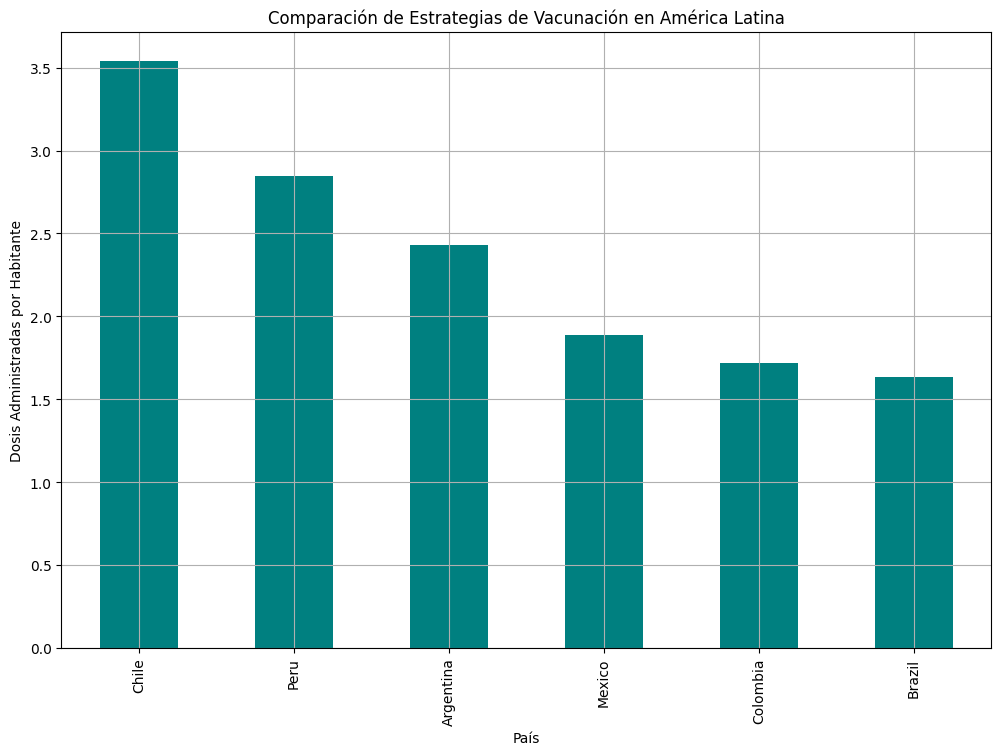

In [59]:
estrategiaVacunacion = dataPaisesLatinoamerica.groupby('country_name')['cumulative_vaccine_doses_administered'].max() / dataPaisesLatinoamerica.groupby('country_name')['population'].mean()
estrategiaVacunacion.sort_values(ascending = False).plot(kind = 'bar', figsize = (12, 8), color = 'teal', grid = True)

plt.xlabel('País')
plt.ylabel('Dosis Administradas por Habitante')
plt.title('Comparación de Estrategias de Vacunación en América Latina')
plt.show()

In [60]:
dataPaisesLatinoamerica.columns

Index(['location_key', 'country_code', 'country_name', 'new_confirmed',
       'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_vaccine_doses_administered', 'population',
       'population_male', 'population_female', 'population_rural',
       'population_urban', 'population_density', 'human_development_index',
       'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd',
       'latitude', 'longitude', 'area_sq_km', 'smoking_prevalence',
       'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000',
       'physicians_per_1000', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 'population_largest_city',
       'area_rural_sq_km', 

In [61]:
topPaises = dataPaisesLatinoamerica.groupby('country_name')['deceased_percentage'].max().nlargest(3).index

In [62]:
# 5 paises con menor cantidad de muertes
ultimosPaises = dataPaisesLatinoamerica.groupby('country_name')['deceased_percentage'].max().nsmallest(3).index
ultimosPaises

Index(['Mexico', 'Argentina', 'Colombia'], dtype='object', name='country_name')

In [63]:
# 5 paises con menor cantidad de muertes
todosPaises = dataPaisesLatinoamerica.groupby('country_name')['deceased_percentage'].max().sort_values(ascending=False)
todosPaises

country_name
Peru        0.01
Chile       0.01
Brazil      0.00
Colombia    0.00
Argentina   0.00
Mexico      0.00
Name: deceased_percentage, dtype: float64

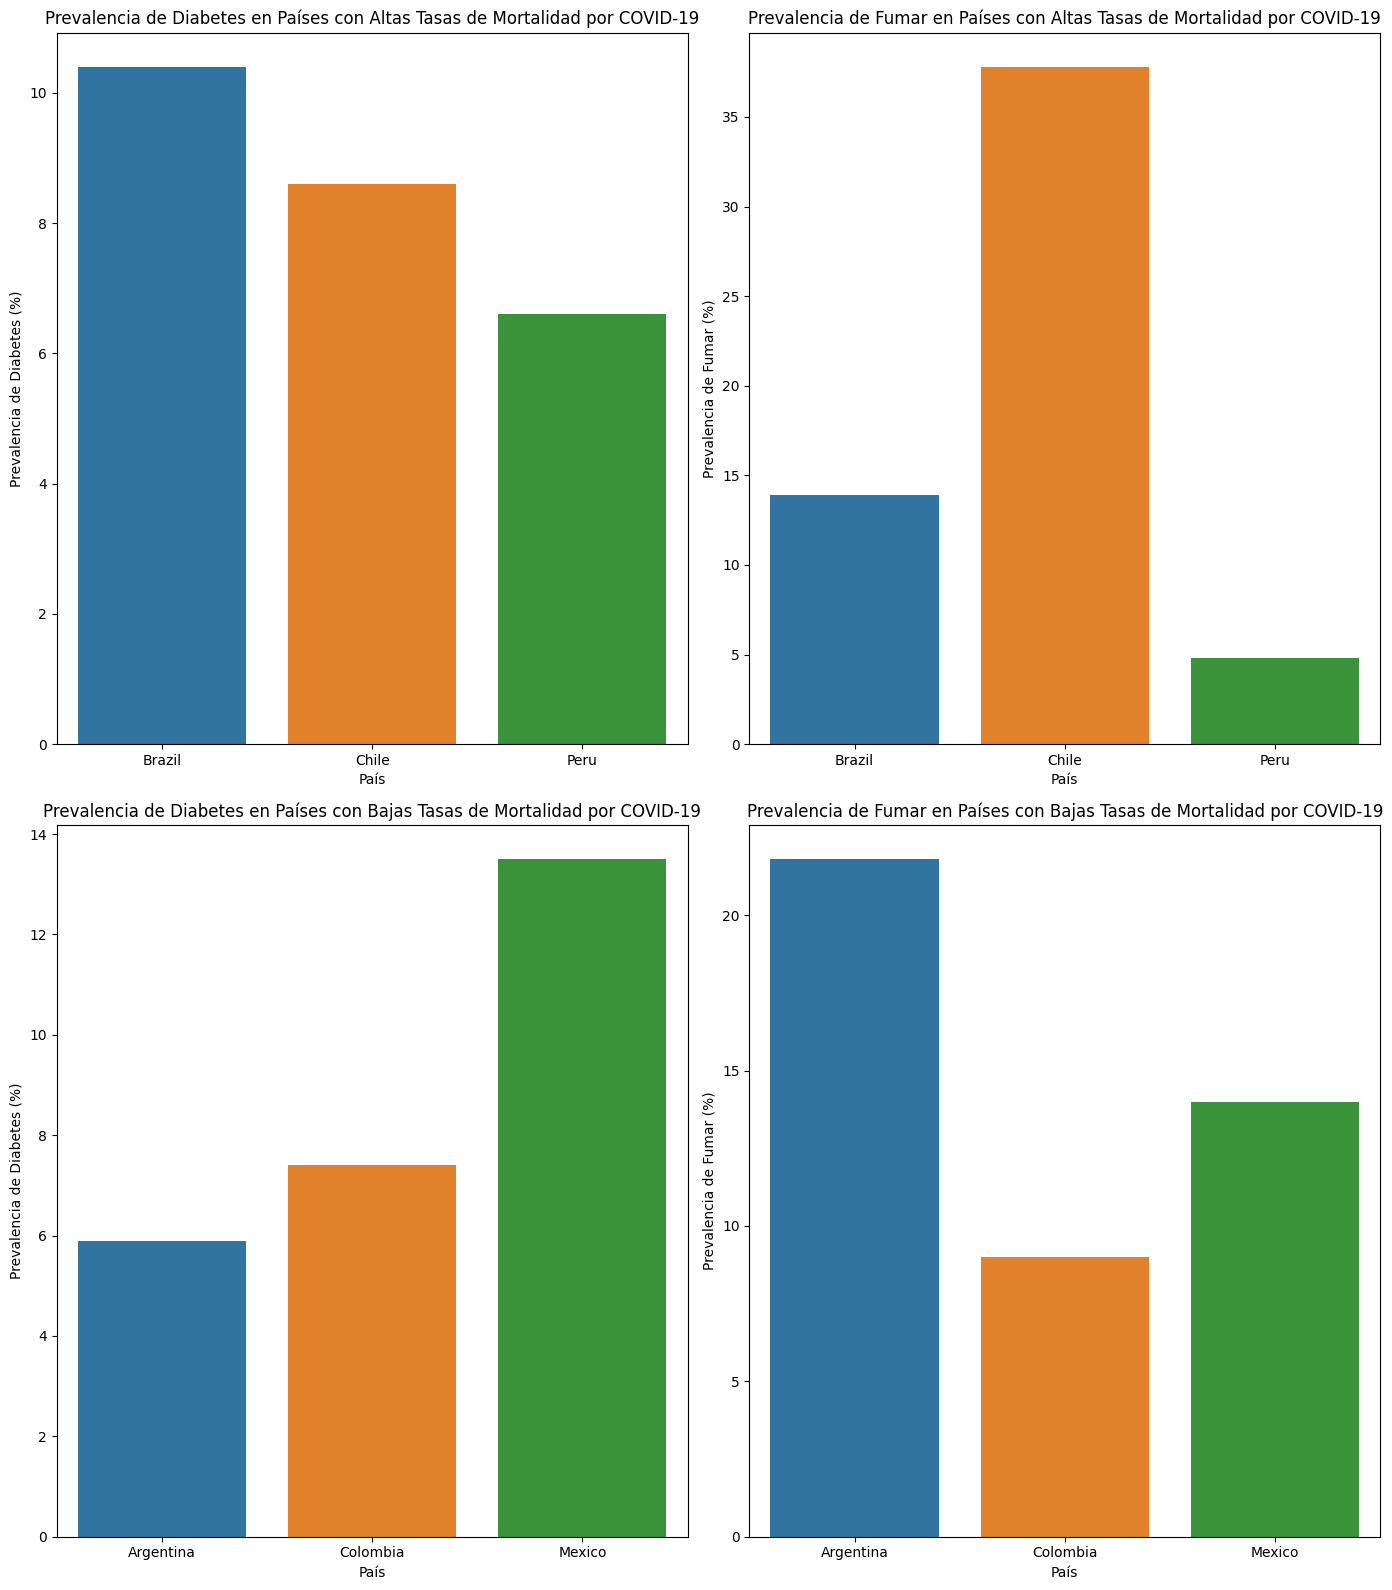

In [64]:
# Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad.

# 5 paises con mayor cantidad de muertes
topPaises = dataPaisesLatinoamerica.groupby('country_name')['deceased_percentage'].max().nlargest(3).index

 # 5 paises con menor cantidad de muertes
ultimosPaises = dataPaisesLatinoamerica.groupby('country_name')['deceased_percentage'].max().nsmallest(3).index

infoCondicionesPaisesTop = dataPaisesLatinoamerica[dataPaisesLatinoamerica['country_name'].isin(topPaises)]
infoCondicionesPaisesUltimos = dataPaisesLatinoamerica[dataPaisesLatinoamerica['country_name'].isin(ultimosPaises)]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(
    ncols = 2,
    nrows = 2,
    figsize = (14, 16)
)

# Prevalencia de diabetes en top
sns.barplot(data = infoCondicionesPaisesTop, x = 'country_name', y = 'diabetes_prevalence', hue = 'country_name', ax = ax1)
ax1.set_xlabel('País')
ax1.set_ylabel('Prevalencia de Diabetes (%)')
ax1.set_title('Prevalencia de Diabetes en Países con Altas Tasas de Mortalidad por COVID-19')

# Prevalencia de fumar en top
sns.barplot(data = infoCondicionesPaisesTop, x = 'country_name', y = 'smoking_prevalence', hue = 'country_name', ax = ax2)
ax2.set_xlabel('País')
ax2.set_ylabel('Prevalencia de Fumar (%)')
ax2.set_title('Prevalencia de Fumar en Países con Altas Tasas de Mortalidad por COVID-19')

# Prevalencia de diabetes en top
sns.barplot(data = infoCondicionesPaisesUltimos, x = 'country_name', y = 'diabetes_prevalence', hue = 'country_name', ax = ax3)
ax3.set_xlabel('País')
ax3.set_ylabel('Prevalencia de Diabetes (%)')
ax3.set_title('Prevalencia de Diabetes en Países con Bajas Tasas de Mortalidad por COVID-19')

# Prevalencia de fumar en top
sns.barplot(data = infoCondicionesPaisesUltimos, x = 'country_name', y = 'smoking_prevalence', hue = 'country_name', ax = ax4)
ax4.set_xlabel('País')
ax4.set_ylabel('Prevalencia de Fumar (%)')
ax4.set_title('Prevalencia de Fumar en Países con Bajas Tasas de Mortalidad por COVID-19')

plt.tight_layout()

plt.show()

In [65]:
# Otro indice de fatalidad posible. Muertos sobre contagiados
dataPaisesLatinoamerica['case_fatality_rate'] = dataPaisesLatinoamerica['cumulative_deceased'] / dataPaisesLatinoamerica['cumulative_confirmed']
iniceFatalidad = dataPaisesLatinoamerica.groupby('country_name')['case_fatality_rate'].last().sort_values()
iniceFatalidad

country_name
Argentina   0.02
Brazil      0.02
Chile       0.02
Colombia    0.02
Mexico      0.02
Peru        0.02
Name: case_fatality_rate, dtype: float64

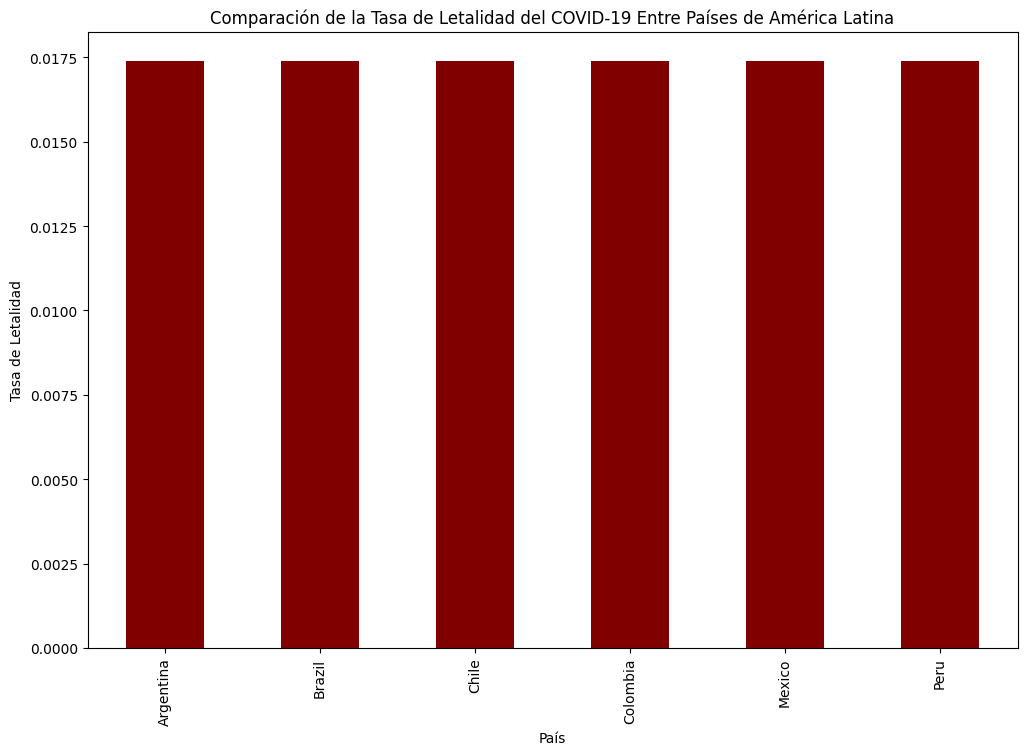

In [66]:
#  Fatalidad por pais

dataPaisesLatinoamerica['case_fatality_rate'] = dataPaisesLatinoamerica['cumulative_deceased'] / dataPaisesLatinoamerica['cumulative_confirmed']
indicesFatalidad = dataPaisesLatinoamerica.groupby('country_name')['case_fatality_rate'].last().sort_values()

plt.figure(figsize = (12, 8))
indicesFatalidad.plot(kind = 'bar', color = 'maroon')
plt.xlabel('País')
plt.ylabel('Tasa de Letalidad')
plt.title('Comparación de la Tasa de Letalidad del COVID-19 Entre Países de América Latina')
plt.show()

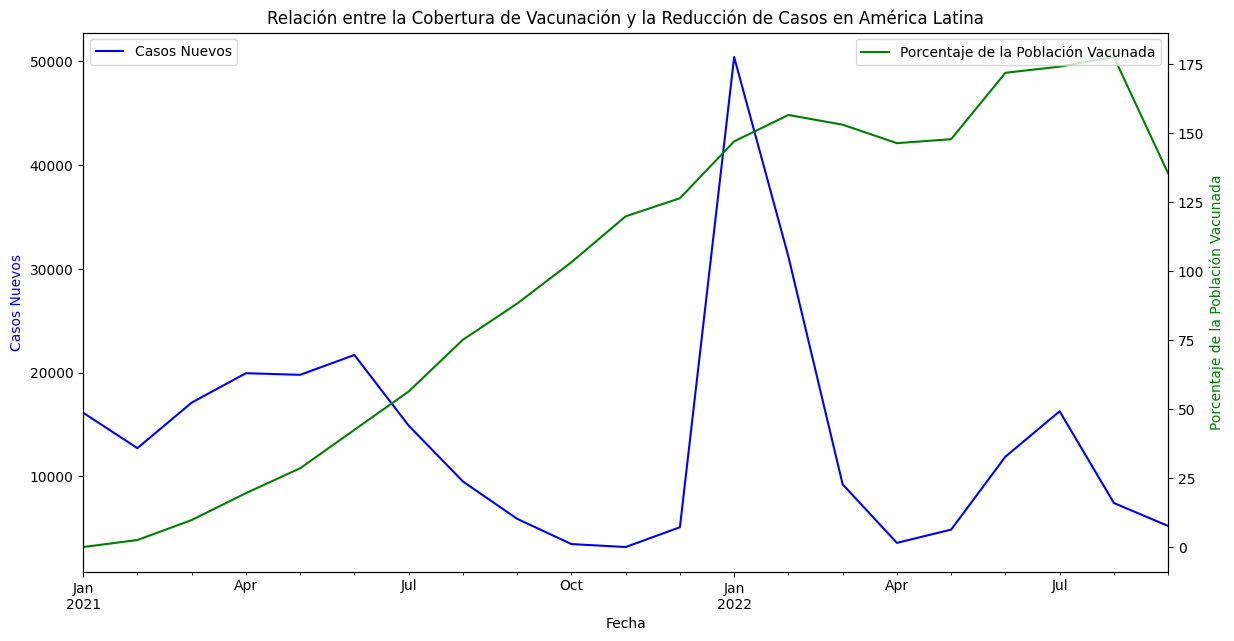

In [67]:
# Como evoluciona la vacunación en América Latina y la reducción de casos de COVID-19

plt.figure(figsize = (14, 7))
ax1 = plt.gca()
ax2 = ax1.twinx()

#crea percentajes de vacunacion
dataPaisesLatinoamerica['percentage_vaccinated'] = dataPaisesLatinoamerica['cumulative_vaccine_doses_administered'] / dataPaisesLatinoamerica['population'] * 100

# Gráfico mis dos lineplots
dataPaisesLatinoamerica.resample('ME').mean(numeric_only = True)['new_confirmed'].plot(ax = ax1, color = 'blue', label = 'Casos Nuevos')
dataPaisesLatinoamerica.resample('ME').mean(numeric_only = True)['percentage_vaccinated'].plot(ax = ax2, color = 'green', label = 'Porcentaje de la Población Vacunada')


ax1.set_xlabel('Fecha')
ax1.set_ylabel('Casos Nuevos', color = 'blue')
ax2.set_ylabel('Porcentaje de la Población Vacunada', color = 'green')
ax1.set_title('Relación entre la Cobertura de Vacunación y la Reducción de Casos en América Latina')
ax1.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')
plt.show()

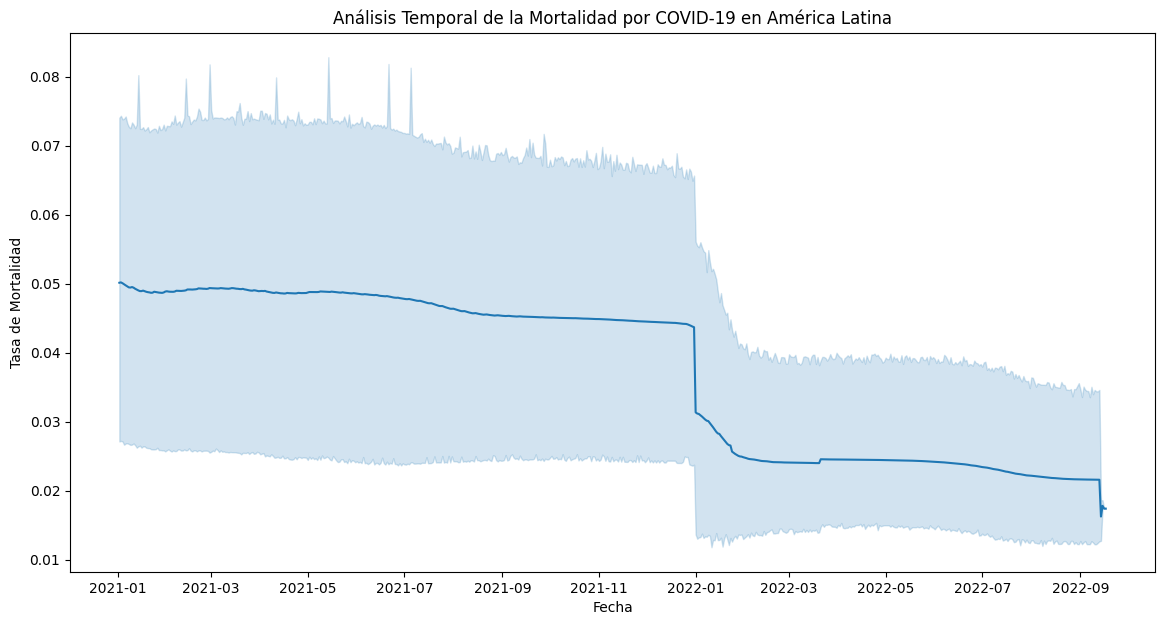

In [ ]:
# cómo evolucionó la mortalidad
dataPaisesLatinoamerica['mortality_rate'] = dataPaisesLatinoamerica['cumulative_deceased'] / dataPaisesLatinoamerica['cumulative_confirmed']

plt.figure(figsize = (14, 7))
sns.lineplot(
    data = dataPaisesLatinoamerica,
    x = 'date',
    y = 'mortality_rate',
    estimator = 'mean'
)
plt.title('Análisis Temporal de la Mortalidad por COVID-19 en América Latina')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Mortalidad')
plt.show()

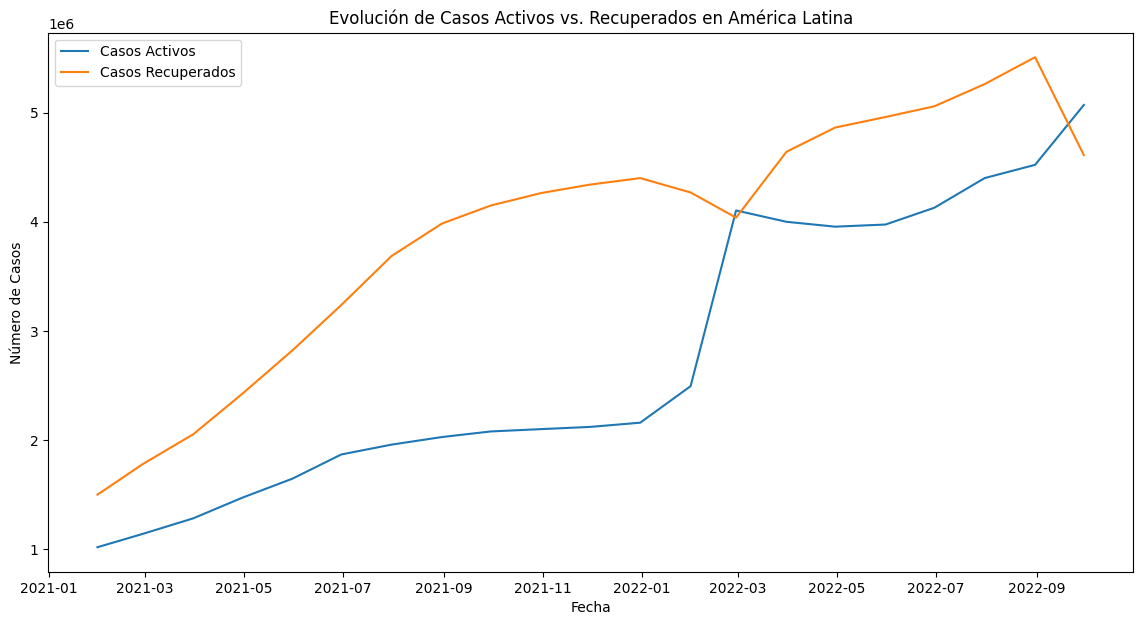

In [ ]:
# Como evolucionan los casos activos y recuperados en América Latina
## Creo la columna active cases
dataPaisesLatinoamerica['active_cases'] = dataPaisesLatinoamerica['cumulative_confirmed'] - dataPaisesLatinoamerica['cumulative_deceased'] - dataPaisesLatinoamerica['cumulative_recovered']

# Grafico dos lineas sobre el mismo eje:
plt.figure(figsize = (14, 7))
sns.lineplot(data = dataPaisesLatinoamerica.resample('ME').mean(numeric_only = True), x = 'date', y = 'active_cases', label = 'Casos Activos')
sns.lineplot(data = dataPaisesLatinoamerica.resample('ME').mean(numeric_only = True), x = 'date', y = 'cumulative_recovered', label = 'Casos Recuperados')

plt.xlabel('Fecha')
plt.ylabel('Número de Casos')
plt.title('Evolución de Casos Activos vs. Recuperados en América Latina')
plt.legend()
plt.show()

In [71]:
dataPaisesLatinoamericaSinNulos = dataPaisesLatinoamerica.copy()
dataPaisesLatinoamericaSinNulos["active_cases"] = dataPaisesLatinoamericaSinNulos["active_cases"].fillna(0)
dataPaisesLatinoamericaSinNulos["cumulative_recovered"] = dataPaisesLatinoamericaSinNulos["cumulative_recovered"].fillna(0)
dataPaisesLatinoamericaSinNulos["cumulative_deceased"] = dataPaisesLatinoamericaSinNulos["cumulative_deceased"].fillna(0)
situacionActual = dataPaisesLatinoamericaSinNulos.groupby('country_name')[['active_cases', 'cumulative_recovered', 'cumulative_deceased']].max().sort_values(by = "active_cases")
situacionActual

active_cases  cumulative_recovered  cumulative_deceased
country_name                                                         
Chile           5973862.60                  0.00            105716.12
Mexico          5973862.60                  0.00            304025.00
Peru            5973862.60                  0.00            216173.00
Colombia        6162609.00            5441021.00            155770.00
Argentina       9567933.00                  0.00            129830.00
Brazil         33819307.00           33706231.00            685203.00

In [72]:
# Debo usar max() porque last no registra el acumulado de recovered

situacionActual = dataPaisesLatinoamericaSinNulos.groupby('country_name')[['active_cases', 'cumulative_recovered', 'cumulative_deceased']].max().sort_values(by="active_cases")
situacionActual

active_cases  cumulative_recovered  cumulative_deceased
country_name                                                         
Chile           5973862.60                  0.00            105716.12
Mexico          5973862.60                  0.00            304025.00
Peru            5973862.60                  0.00            216173.00
Colombia        6162609.00            5441021.00            155770.00
Argentina       9567933.00                  0.00            129830.00
Brazil         33819307.00           33706231.00            685203.00

In [73]:
dataPaisesLatinoamericaSinNulos[['country_name','active_cases', 'cumulative_recovered', 'cumulative_deceased']].loc[
    (dataPaisesLatinoamericaSinNulos.index >= dataPaisesLatinoamericaSinNulos.index.max())
]

country_name  active_cases  cumulative_recovered  \
date                                                          
2022-09-17    Argentina    5973862.60                  0.00   
2022-09-17       Brazil    5973862.60                  0.00   
2022-09-17        Chile    5973862.60                  0.00   
2022-09-17     Colombia    5973862.60                  0.00   
2022-09-17       Mexico    5973862.60                  0.00   
2022-09-17         Peru    5973862.60                  0.00   

            cumulative_deceased  
date                             
2022-09-17            105716.12  
2022-09-17            105716.12  
2022-09-17            105716.12  
2022-09-17            105716.12  
2022-09-17            105716.12  
2022-09-17            105716.12

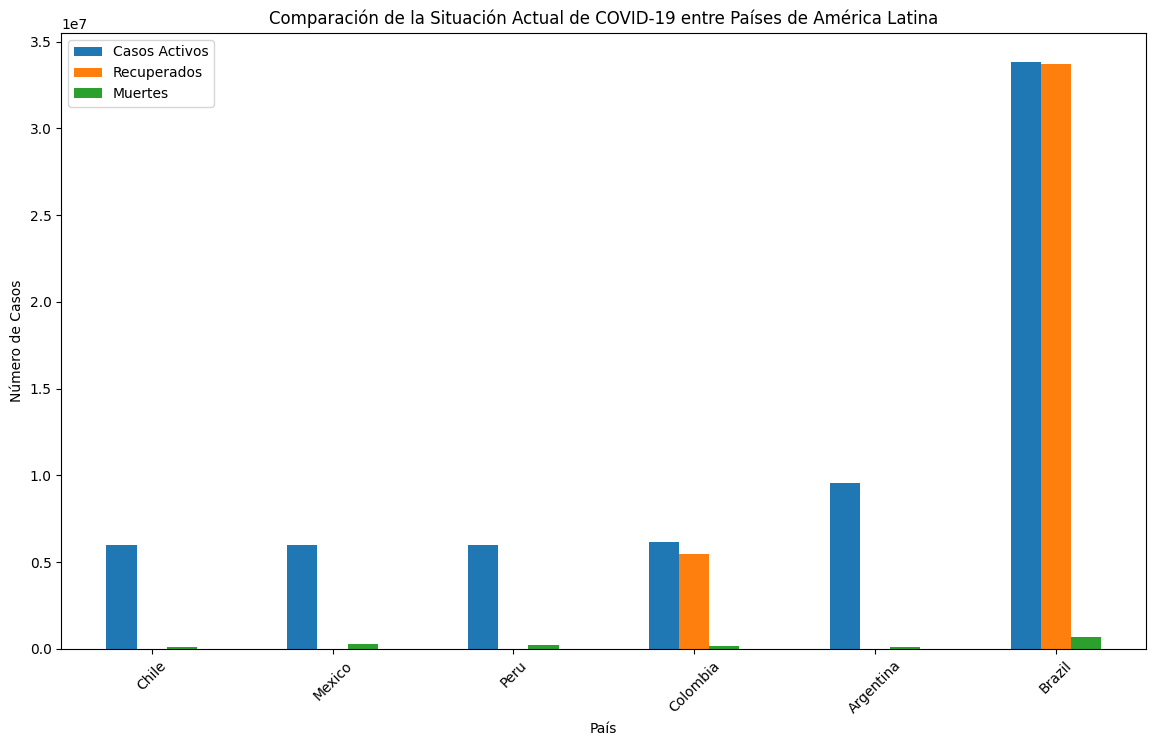

In [ ]:
# No se tienen dato pero hay datos de recuperados y muertes en algunos paises
situacionActual = dataPaisesLatinoamericaSinNulos.groupby('country_name')[['active_cases', 'cumulative_recovered', 'cumulative_deceased']].max().sort_values(by = "active_cases")
situacionActual.plot(kind = 'bar', stacked = False, figsize = (14, 8))
plt.title('Comparación de la Situación Actual de COVID-19 entre Países de América Latina')
plt.xlabel('País')
plt.ylabel('Número de Casos')
plt.legend(['Casos Activos', 'Recuperados', 'Muertes'])
plt.xticks(rotation = 45)
plt.show()

In [77]:
dataPaisesLatinoamerica = dataPaisesLatinoamerica.reset_index()
dataPaisesLatinoamerica.to_csv("DatosFiltradosFinal.csv", index = False)

### Data frame listo para importar en PowerBi

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataFrame = pd.read_csv("C:\Data analytics\HENRY\MD4\Proyecto Integrador/DatosFiltradosFinal.csv", sep = ",")
print(dataFrame)

### EXTRA CREDIT

In [42]:
import folium
from folium.plugins import HeatMap

In [36]:
# mapa para ver la distribución de casos confirmado, muertes, vacuna y recuperados

# Seleccionamos las columnas que vamos a utilizar
columnas = ['latitude', 'longitude', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_vaccine_doses_administered', 'cumulative_recovered']
dataMapa = dataPaisesLatinoamerica[columnas].dropna()

# Creamos un mapa centrado en América Latina
map = folium.Map(location = [-14.235004, -51.92528], zoom_start = 3)

# Creamos un mapa de calor para los casos confirmados
mapaCalorCasosConfirmados = HeatMap(data = dataMapa[['latitude', 'longitude', 'cumulative_confirmed']], radius = 15)
map.add_child(mapaCalorCasosConfirmados)

# Creamos un mapa de calor para las muertes
mapaCalorMuertesConfirmadas = HeatMap(data = dataMapa[['latitude', 'longitude', 'cumulative_deceased']], radius = 15)
map.add_child(mapaCalorMuertesConfirmadas)

# Creamos un mapa de calor para las vacunas administradas
mapaCalorVacunados = HeatMap(data = dataMapa[['latitude', 'longitude', 'cumulative_vaccine_doses_administered']], radius = 15)
map.add_child(mapaCalorVacunados)

# Creamos un mapa de calor para los recuperados
mapaCalorRecuperados = HeatMap(data = dataMapa[['latitude', 'longitude', 'cumulative_recovered']], radius = 15)
map.add_child(mapaCalorRecuperados)

map.save('mapa.html')

map

In [ ]:
# mapa para ver la distribución de casos confirmados en latinoamerica por país
import geopandas as gpd

# Path del Geo Dataframe descargado desde: https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_admin_0_countries.zip
path = "ne_110m_admin_0_countries.zip"

# Cargo el dataset con el archivo
mundo = gpd.read_file(path)

# Visualizo las columnas de mi dataframe world
for columna in mundo.columns:
    print(columna)

In [ ]:
mundo.NAME

In [ ]:
# Filtrado de world:
mundo = mundo[(mundo.NAME == "Argentina") | (mundo.NAME == "Chile") | (mundo.NAME == "Colombia") | (mundo.NAME == "Mexico") | (mundo.NAME == "Peru") | (mundo.NAME == "Brazil")]
mundo

In [ ]:
mundo.info()

In [ ]:
mundo = mundo.rename(columns = {"NAME":"country_name"})
mundo["country_name"]

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 10))
mundo.boundary.plot(ax = ax)
mundo.plot(column = 'cumulative_confirmed', ax = ax, legend = True, legend_kwds = {'label': "Cumulative Confirmed Cases", 'orientation': "horizontal", 'shrink': 0.5, 'pad': 0.05, 'aspect': 20})
plt.title('Casos confirmados acumulados de COVID-19 en América Latina')
plt.show()

In [ ]:
# mapa para ver la distribución de vacunados en latinoamerica por país

mundo = mundo.merge(dataPaisesLatinoamerica.groupby('country_name')['cumulative_vaccine_doses_administered'].max().reset_index(), on = "country_name")
fig, ax  =  plt.subplots(1, 1, figsize = (15, 10))
mundo.boundary.plot(ax = ax)
mundo.plot(column = 'cumulative_vaccine_doses_administered', ax = ax, legend = True, legend_kwds = {'label': "Cumulative Vaccine Doses Administered", 'orientation': "horizontal", 'shrink': 0.5, 'pad': 0.05, 'aspect': 20})
plt.title('Dosis de vacunas administradas en América Latina')
plt.show()

In [ ]:
# mapa para ver la distribución muertes en latinoamerica por país

mundo = mundo.merge(data_latinoamerica_paises.groupby('country_name')['cumulative_deceased'].max().reset_index(), on = "country_name")
fig, ax  =  plt.subplots(1, 1, figsize = (15, 10))
mundo.boundary.plot(ax = ax)
mundo.plot(column = 'cumulative_deceased', ax = ax, legend = True, legend_kwds = {'label': "Cumulative Deceased Cases", 'orientation': "horizontal", 'shrink': 0.5, 'pad': 0.05, 'aspect': 20})
plt.title('Casos confirmados acumulados de COVID-19 en América Latina')
plt.show()